<a href="https://colab.research.google.com/github/samagra14/machine-learning-projects/blob/master/CartpoleBegin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
! git clone https://github.com/jakevdp/JSAnimation

Cloning into 'JSAnimation'...
remote: Enumerating objects: 201, done.
remote: Total 201 (delta 0), reused 0 (delta 0), pack-reused 201
Receiving objects: 100% (201/201), 985.55 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [2]:
%cd JSAnimation

/content/JSAnimation


In [3]:
! python setup.py install

running install
running build
running build_py
creating build
creating build/lib
creating build/lib/JSAnimation
copying JSAnimation/__init__.py -> build/lib/JSAnimation
copying JSAnimation/examples.py -> build/lib/JSAnimation
copying JSAnimation/IPython_display.py -> build/lib/JSAnimation
copying JSAnimation/html_writer.py -> build/lib/JSAnimation
creating build/lib/JSAnimation/icons
copying JSAnimation/icons/first.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/prev.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/pause.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/play.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/next.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/last.png -> build/lib/JSAnimation/icons
copying JSAnimation/icons/reverse.png -> build/lib/JSAnimation/icons
running install_lib
creating /usr/local/lib/python3.6/dist-packages/JSAnimation
copying build/lib/JSAnimation/__init__.py -> /usr/local/lib/python

In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))


In [5]:
from pyvirtualdisplay import Display
displayOne = Display(visible=0, size=(400, 300))
displayOne.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [6]:
import gym
env = gym.make('CartPole-v0')
## explore the environment
print(repr(env.action_space))

Discrete(2)


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [7]:
print(repr(env.observation_space))
print(repr(env.observation_space.high))
print(repr(env.observation_space.low))
print(repr(env.observation_space))

Box(4,)
array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)
array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)
Box(4,)


In [0]:
## testing random policies

import numpy as np



# Random parameter search


## generating random params with normal distribution
params = np.random.normal(0.0,1.0,(10000,4))


def policy(param,obs):
  return (1 if np.dot(param,obs) >0 else 0)

In [9]:
maxIndex = 0
maxRew = -1
rewards = []
indices = []

for i,param in enumerate(params):
  obs = env.reset()
  totalrew = 0
  for t in range(500):
    obs,rew,done,_ = env.step(policy(obs,param))
    totalrew +=rew
    if done:
      print("Episode: {} Reward : {}".format(i,totalrew))
      break
  rewards.append(totalrew)
  indices.append(i)
  if totalrew>maxRew:
    maxRew= totalrew
    maxIndex = i
  

Episode: 0 Reward : 176.0
Episode: 1 Reward : 10.0
Episode: 2 Reward : 67.0
Episode: 3 Reward : 10.0
Episode: 4 Reward : 9.0
Episode: 5 Reward : 36.0
Episode: 6 Reward : 18.0
Episode: 7 Reward : 10.0
Episode: 8 Reward : 11.0
Episode: 9 Reward : 10.0
Episode: 10 Reward : 12.0
Episode: 11 Reward : 38.0
Episode: 12 Reward : 10.0
Episode: 13 Reward : 26.0
Episode: 14 Reward : 13.0
Episode: 15 Reward : 64.0
Episode: 16 Reward : 9.0
Episode: 17 Reward : 20.0
Episode: 18 Reward : 9.0
Episode: 19 Reward : 9.0
Episode: 20 Reward : 57.0
Episode: 21 Reward : 9.0
Episode: 22 Reward : 9.0
Episode: 23 Reward : 12.0
Episode: 24 Reward : 146.0
Episode: 25 Reward : 52.0
Episode: 26 Reward : 83.0
Episode: 27 Reward : 200.0
Episode: 28 Reward : 44.0
Episode: 29 Reward : 9.0
Episode: 30 Reward : 29.0
Episode: 31 Reward : 10.0
Episode: 32 Reward : 9.0
Episode: 33 Reward : 44.0
Episode: 34 Reward : 21.0
Episode: 35 Reward : 8.0
Episode: 36 Reward : 37.0
Episode: 37 Reward : 10.0
Episode: 38 Reward : 200.0
E

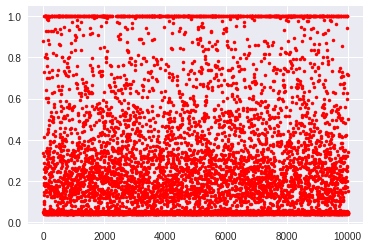

Best policy index 27 and best reward 200.0 


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
rewardsScaled = [x/max(rewards) for x in rewards]
plt.plot(indices,rewardsScaled,'r.')
plt.show()
print("Best policy index {} and best reward {} ".format(maxIndex,maxRew))


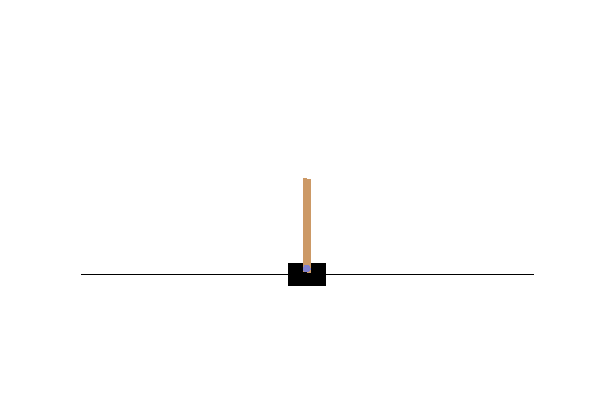
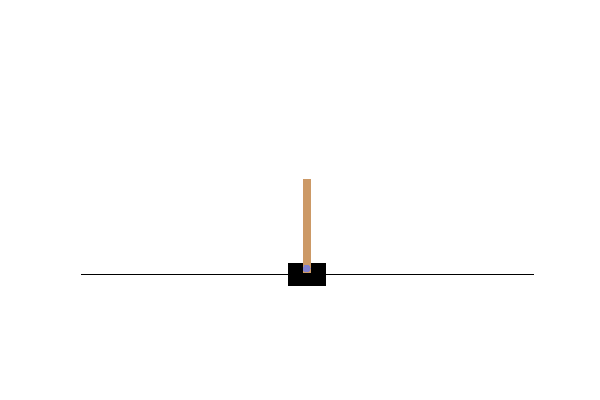
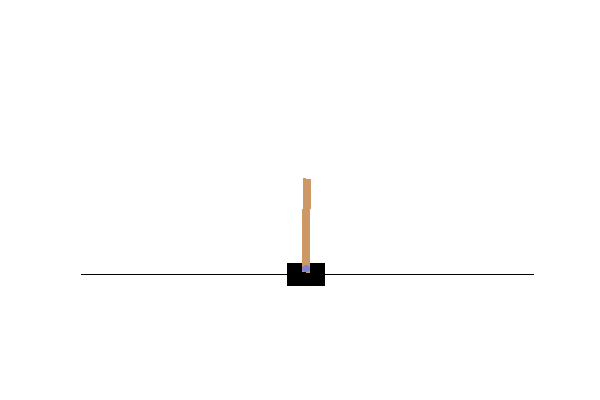
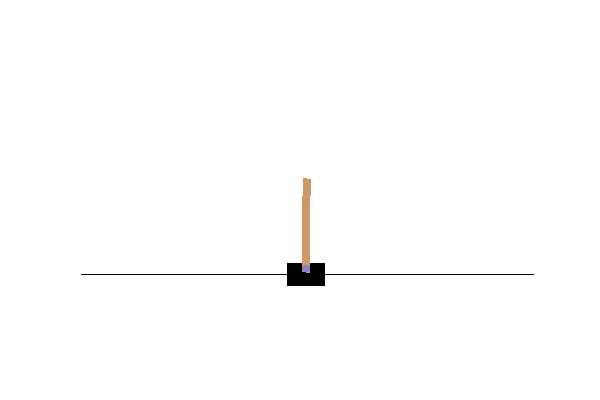
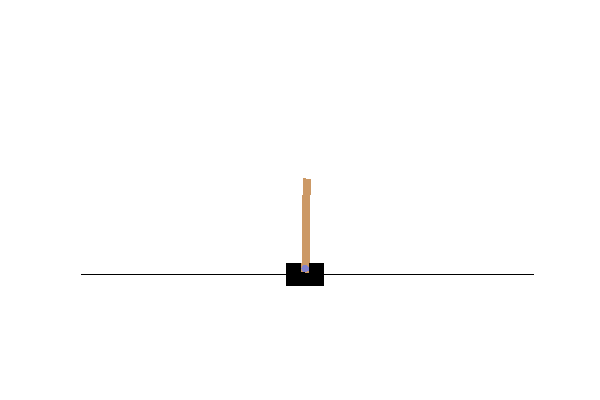
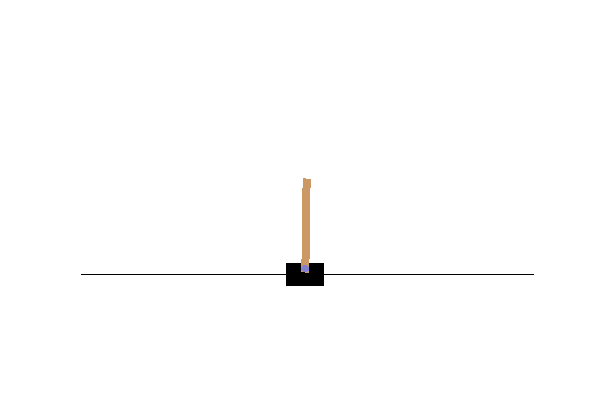
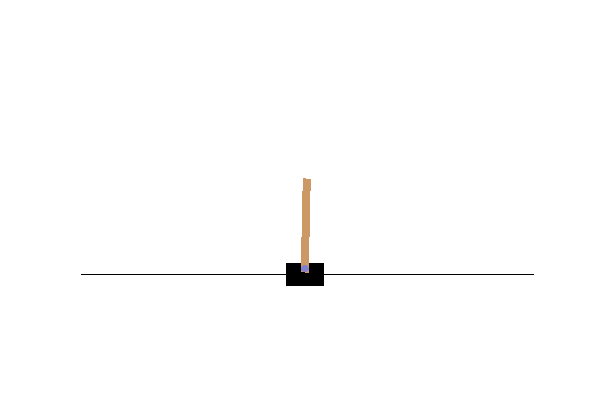
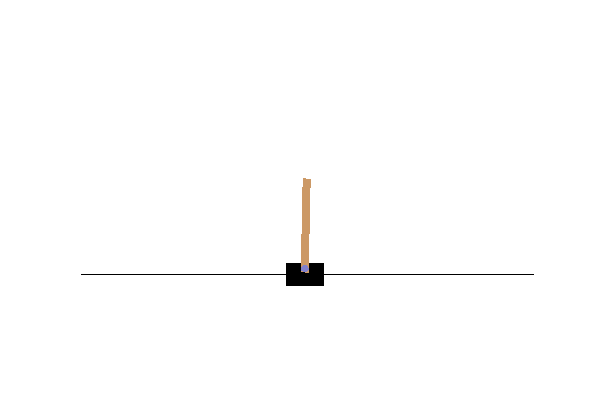
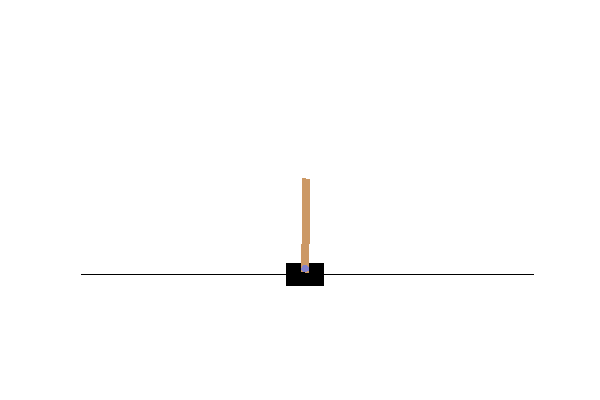
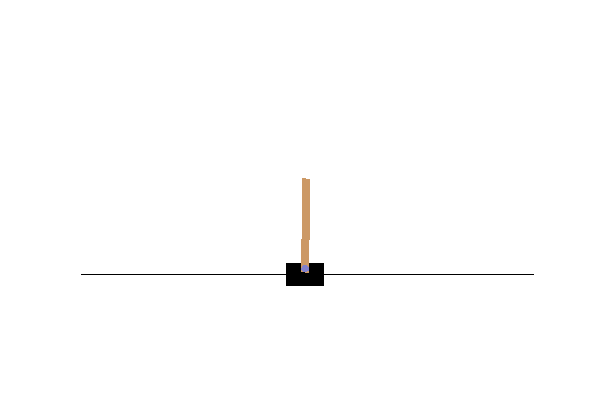
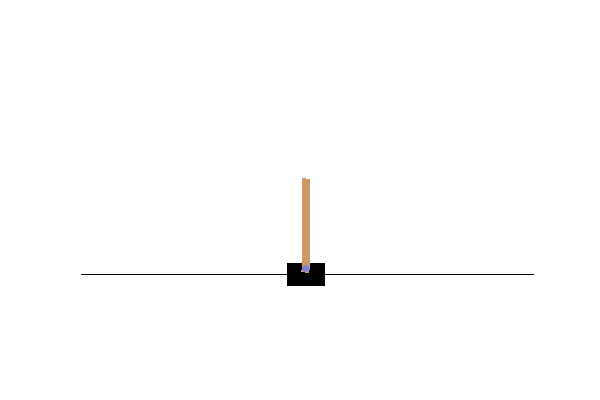
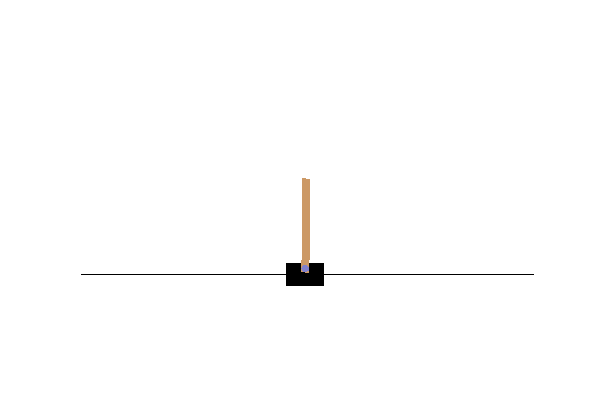
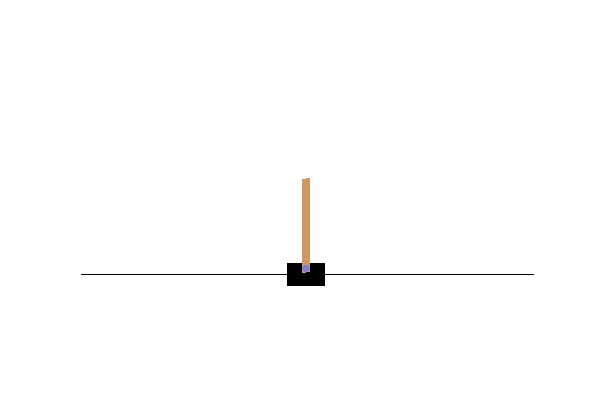
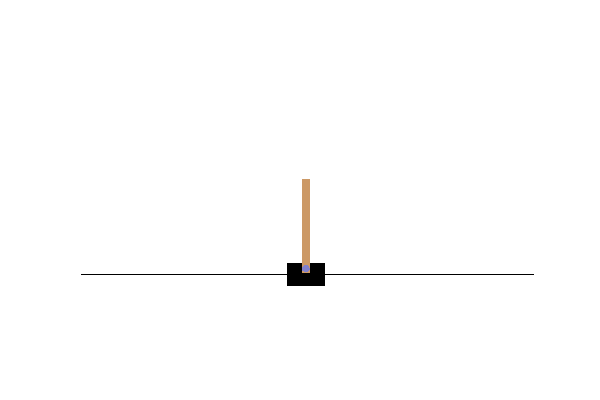
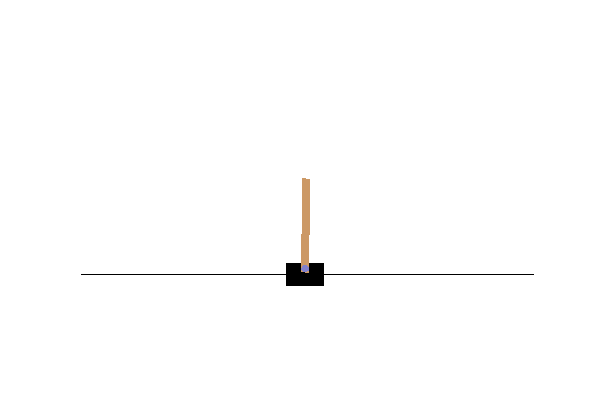
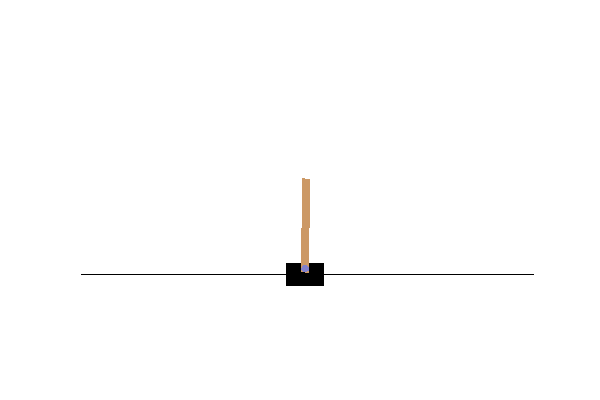
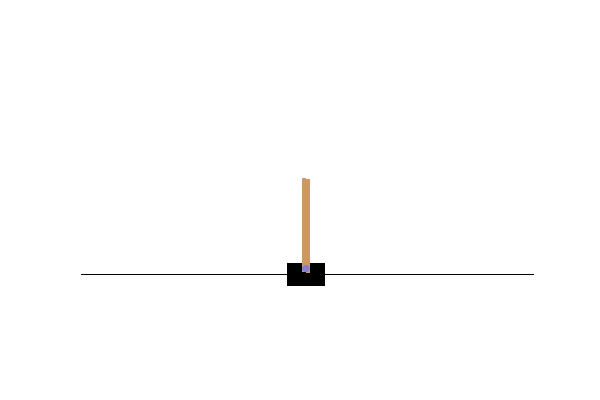
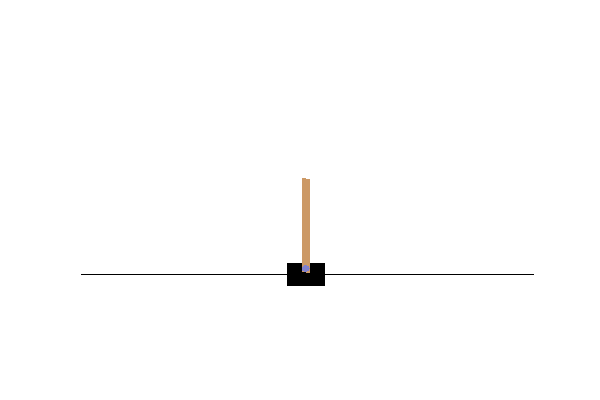
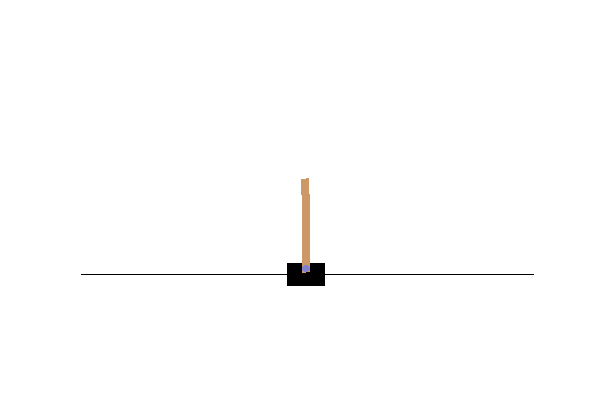
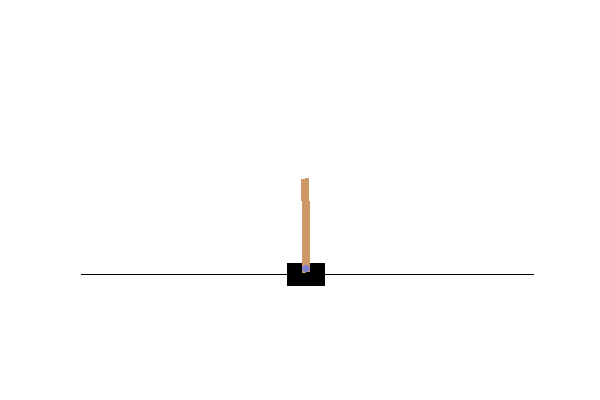
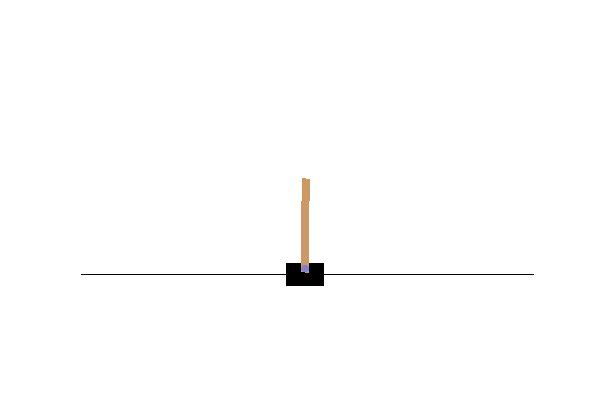
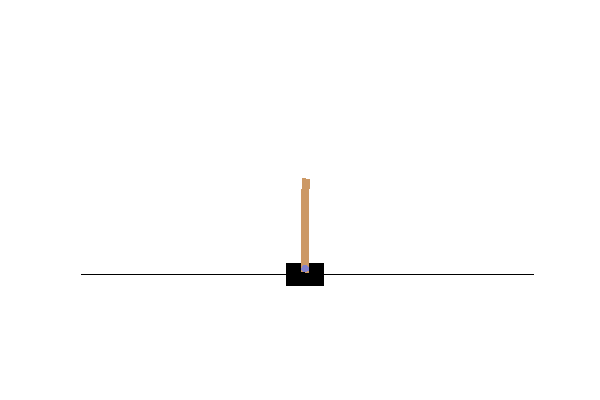
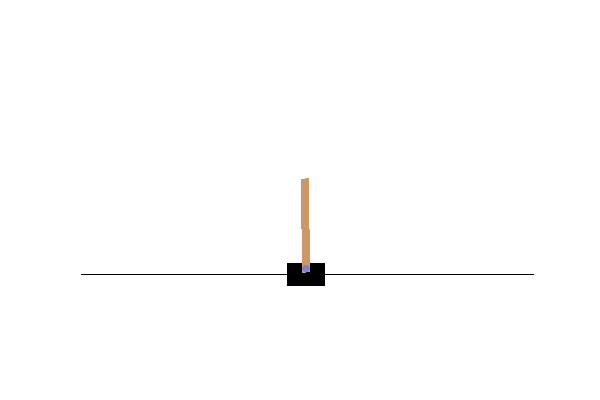
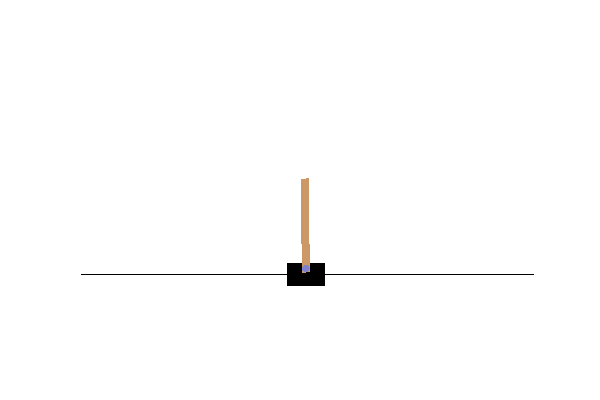
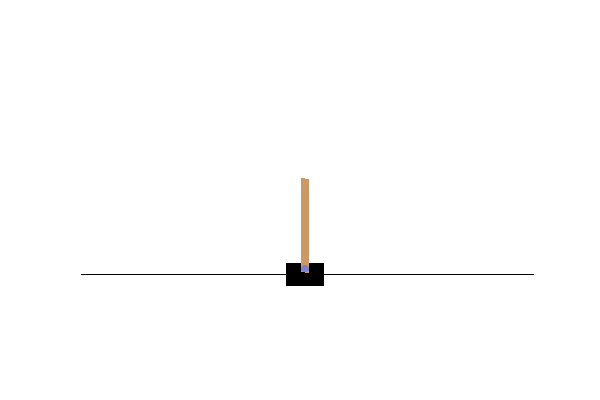
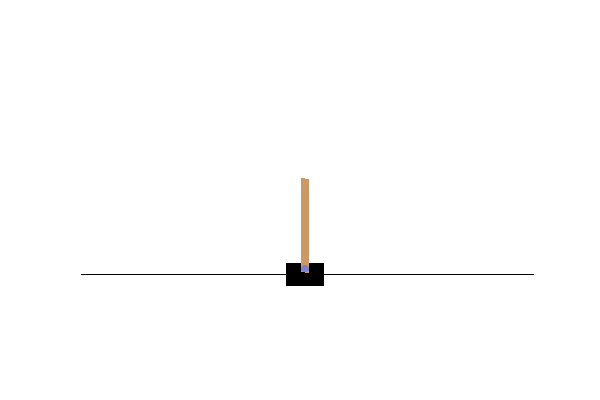
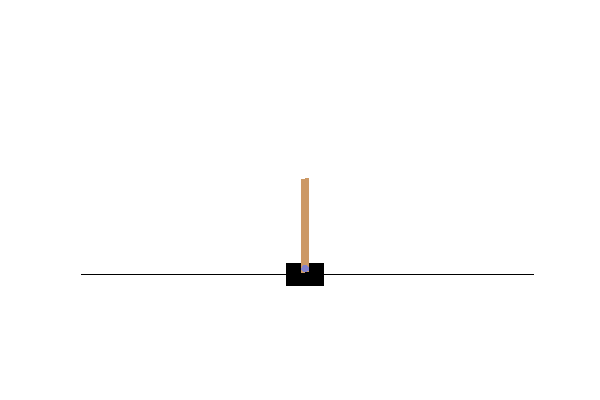
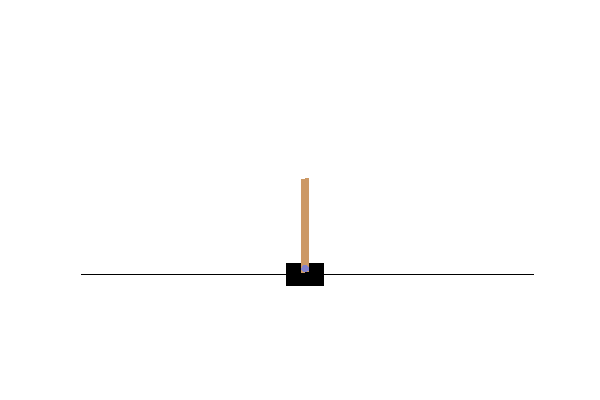
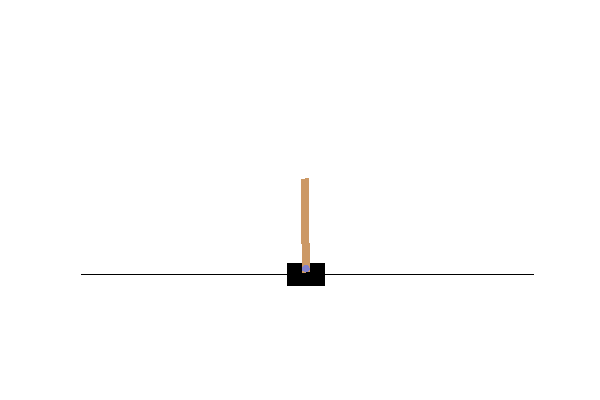
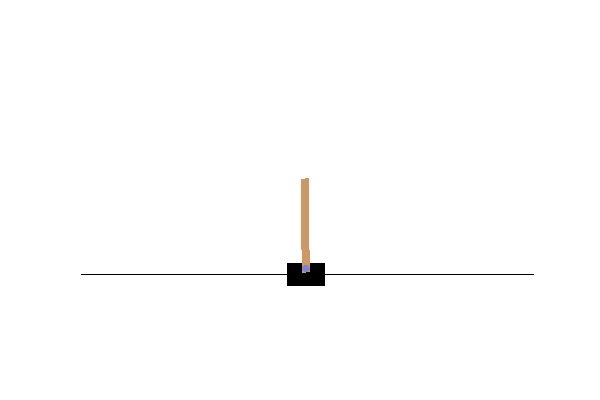
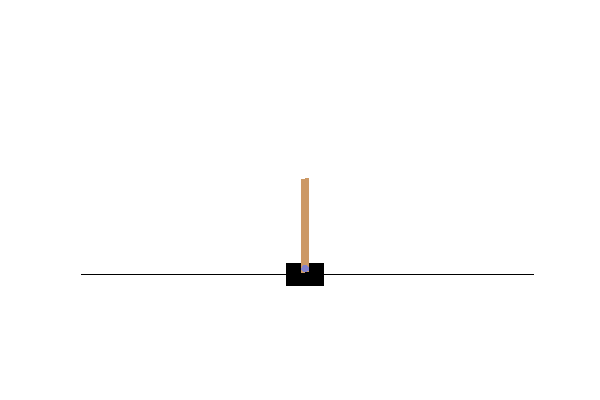
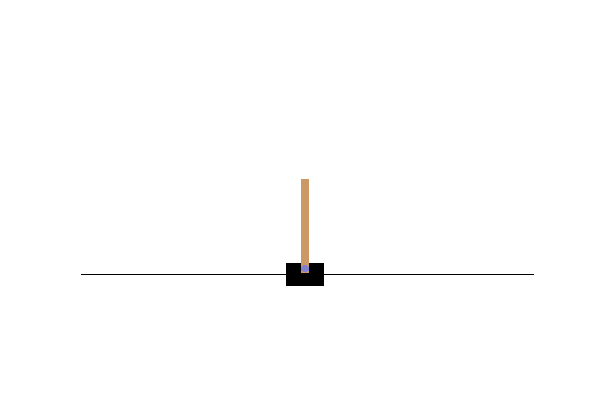
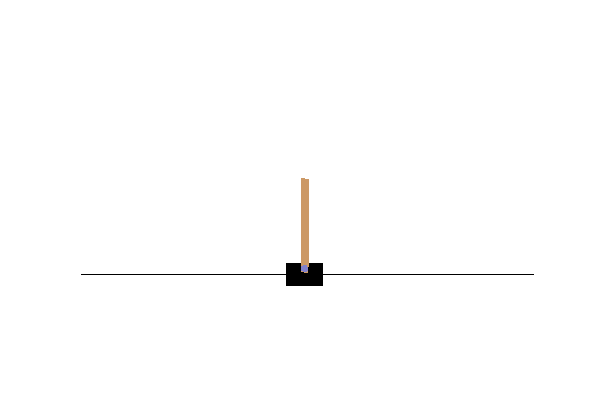
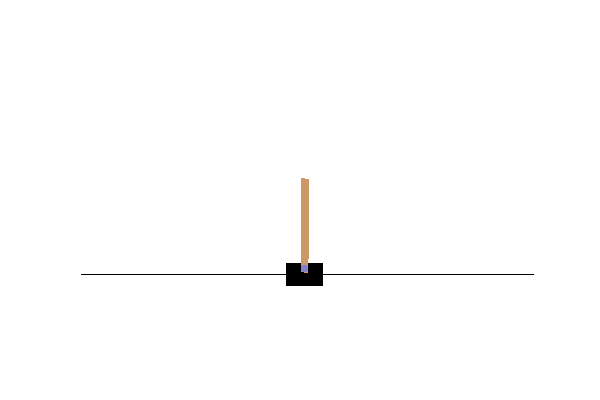
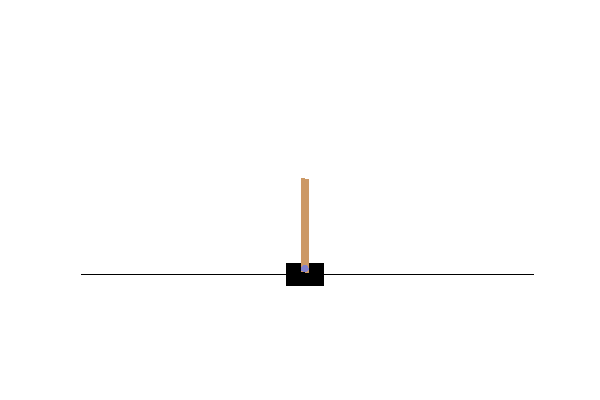
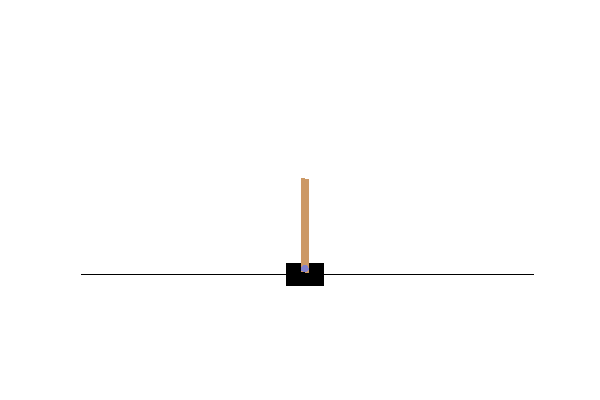
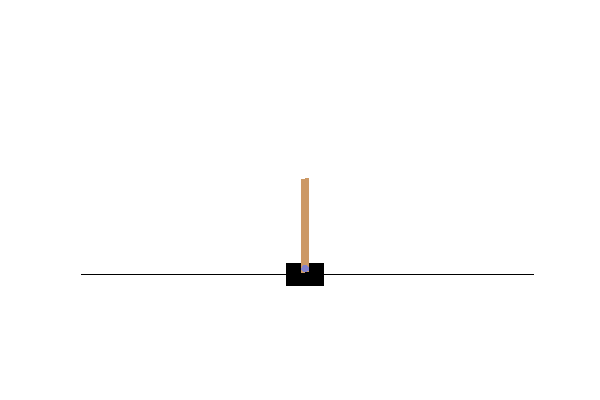
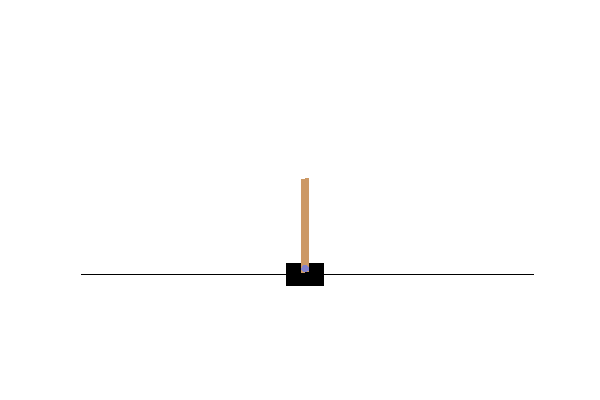
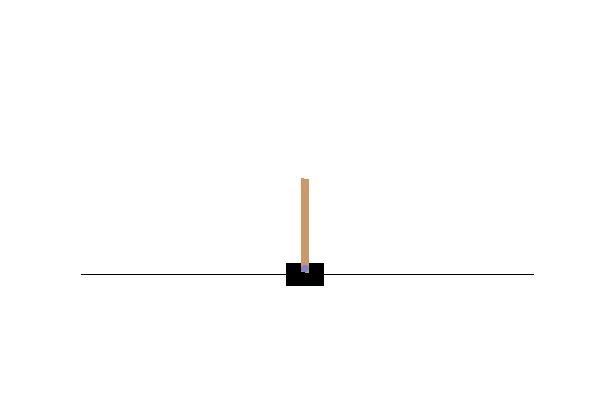
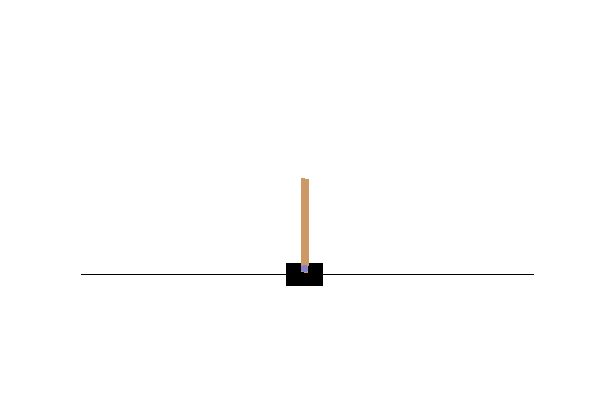
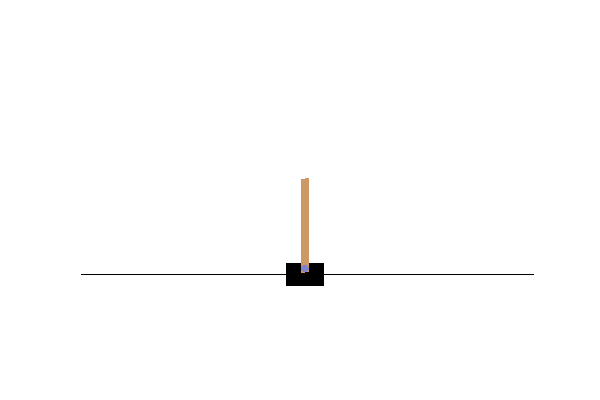
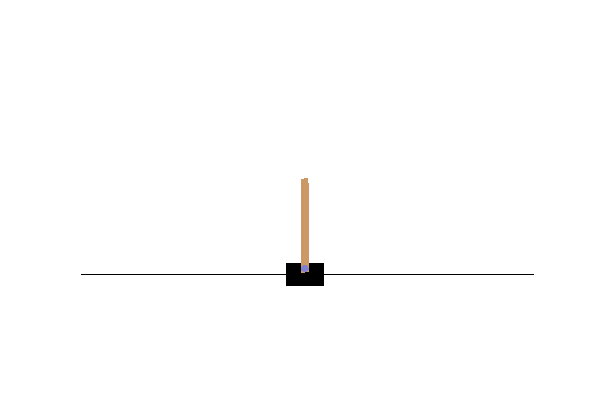
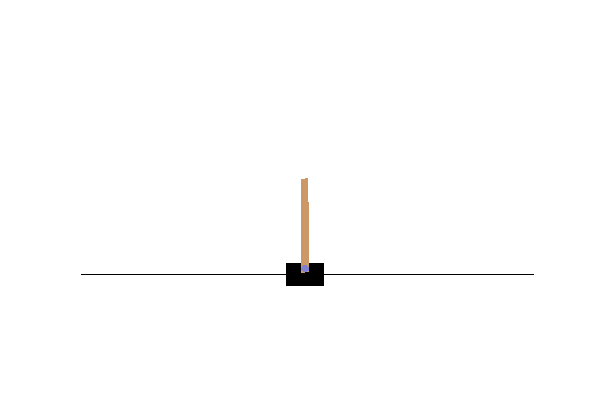
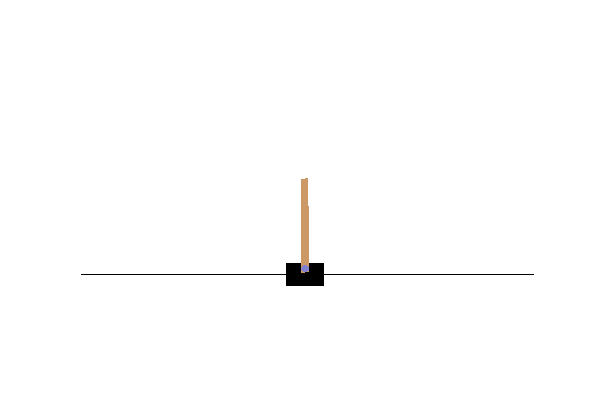
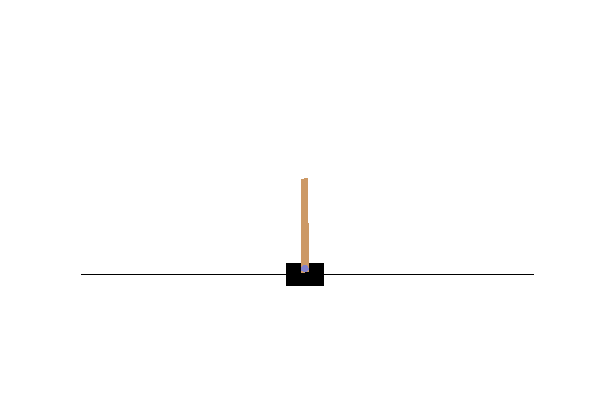
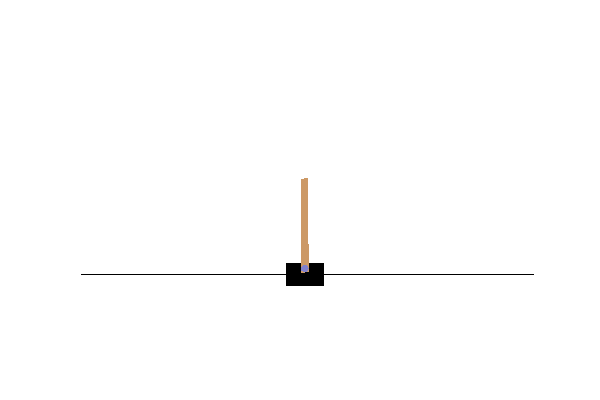
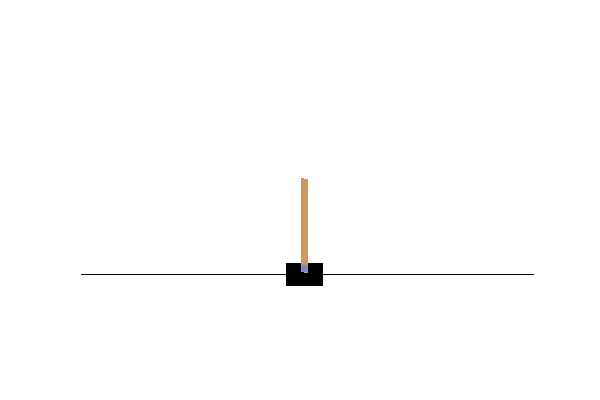
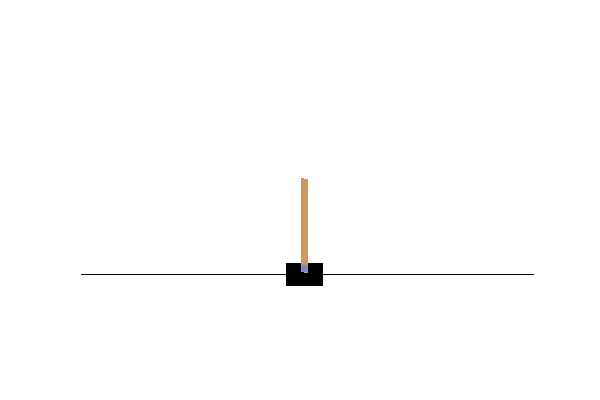
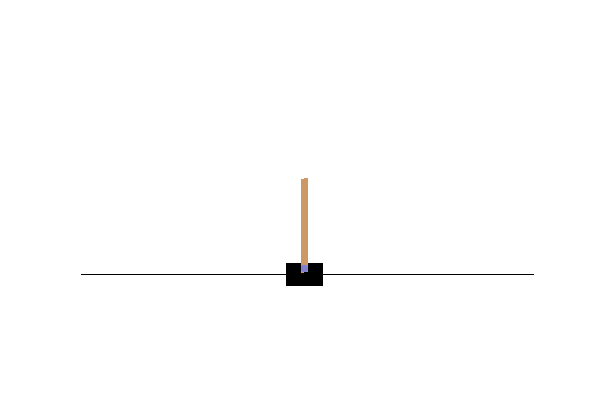
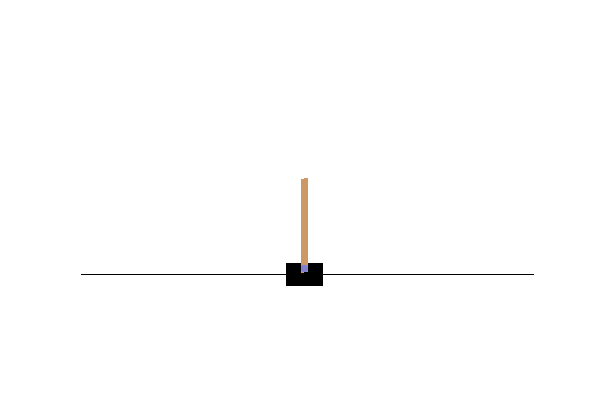
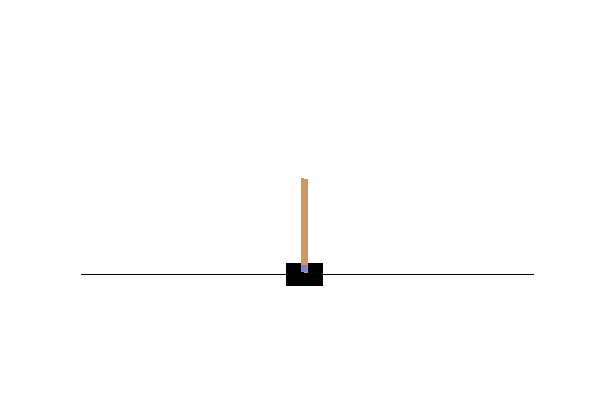
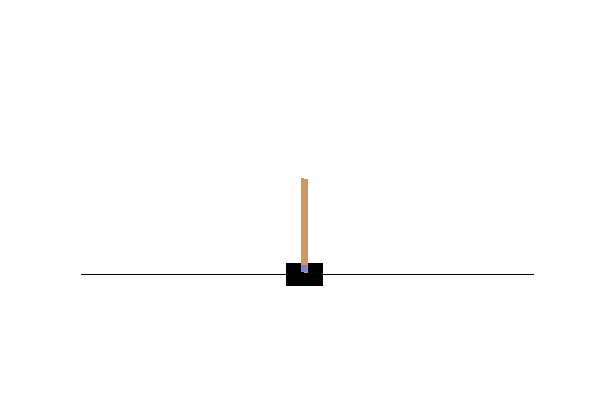
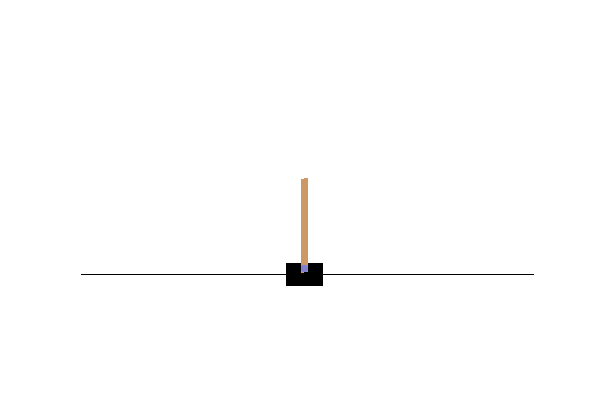
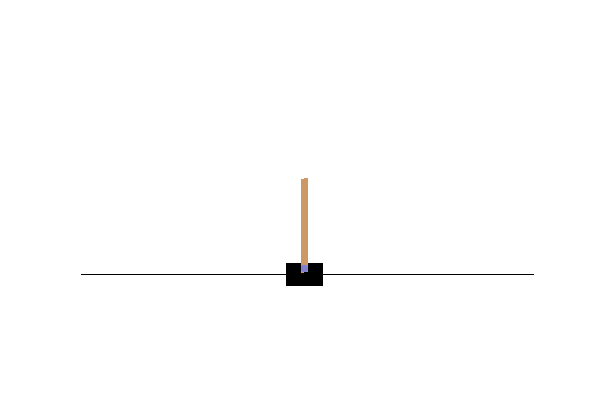
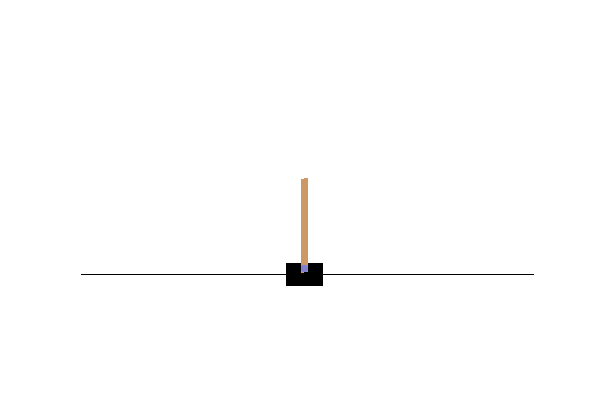
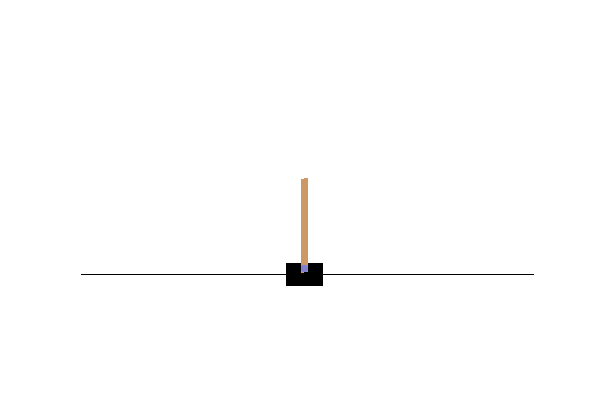
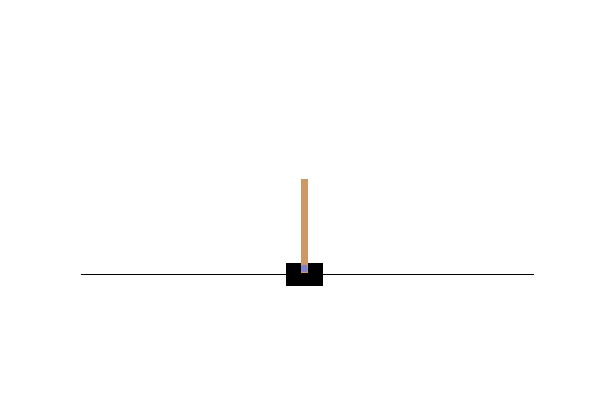
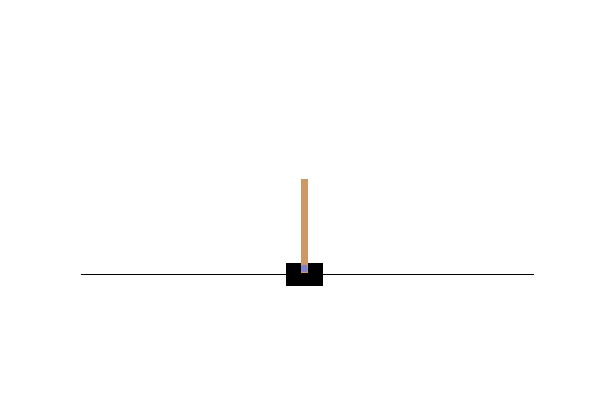
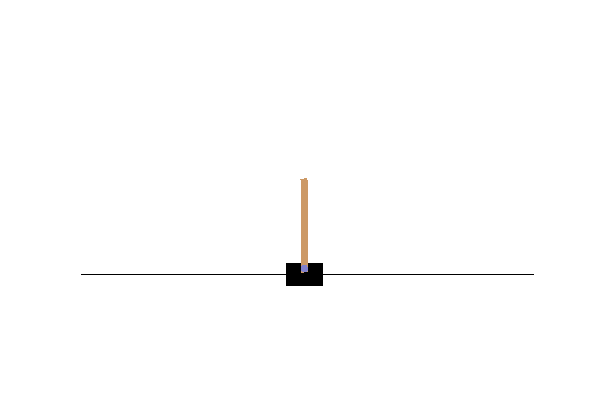
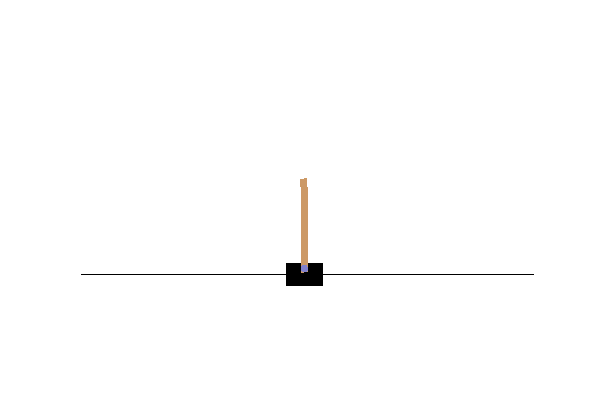
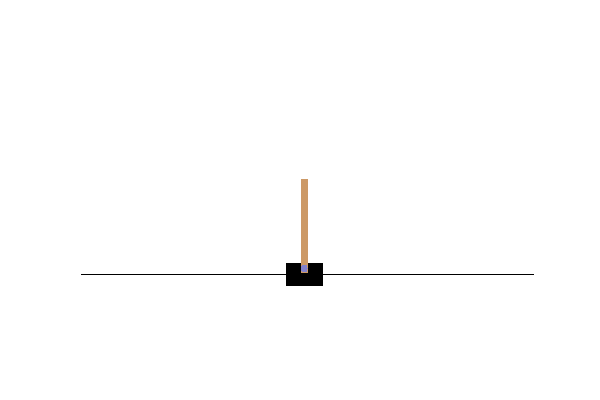
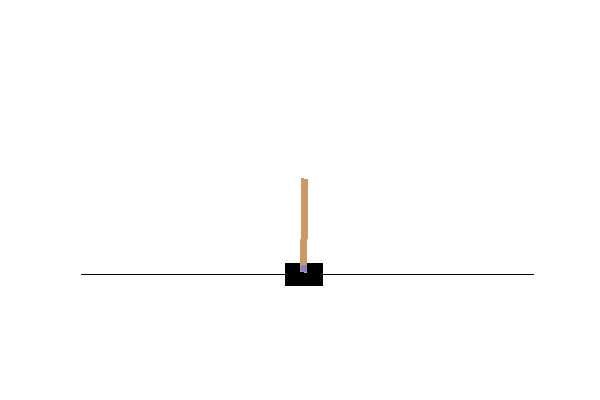
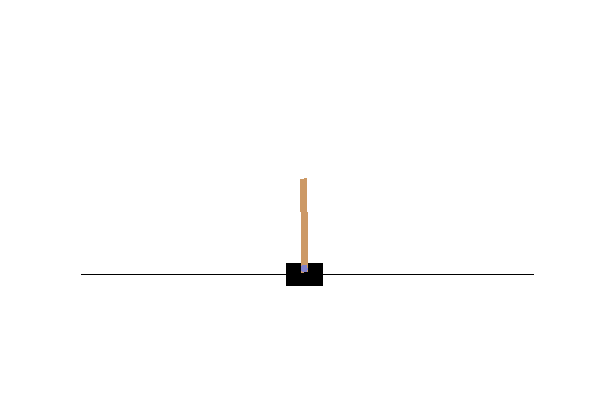
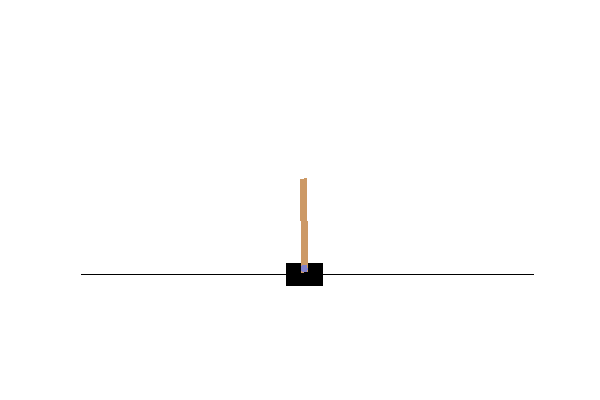
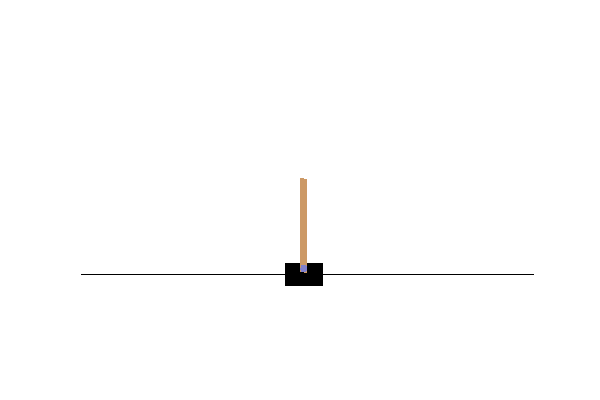
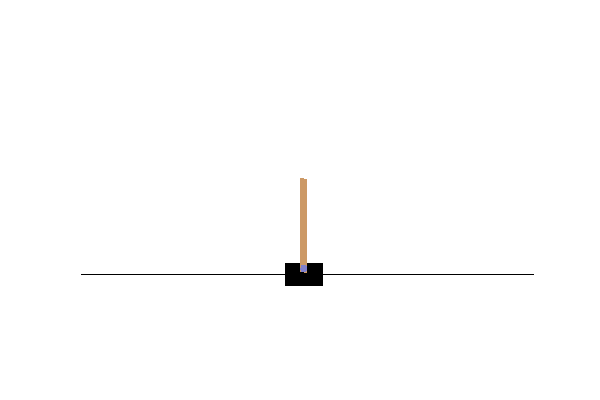
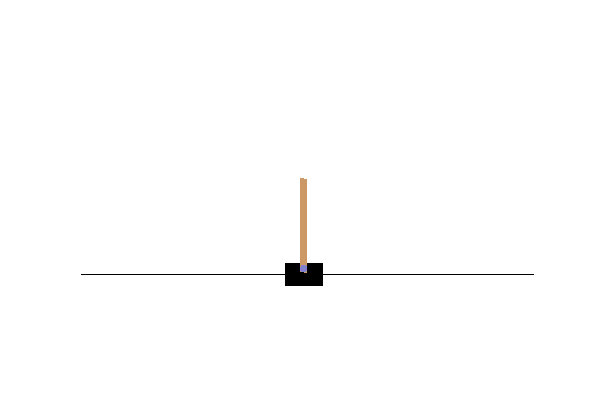
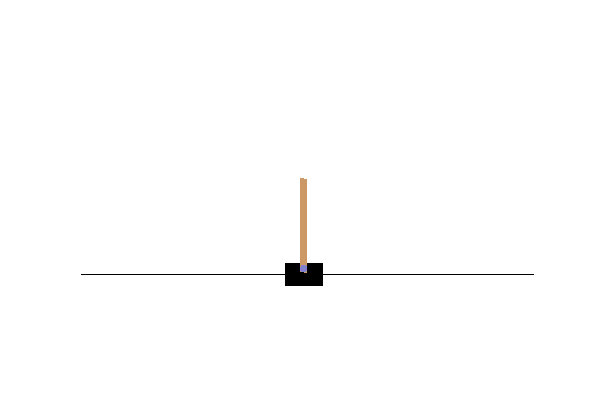
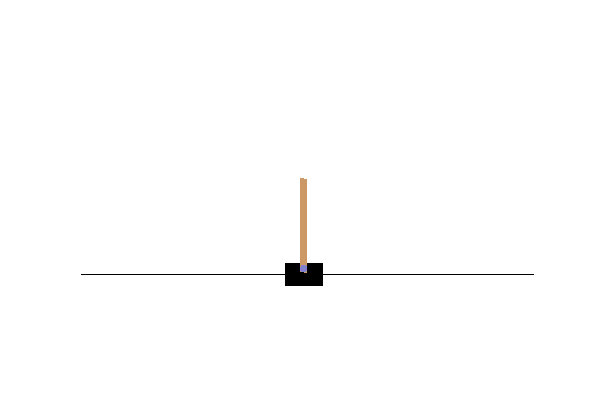
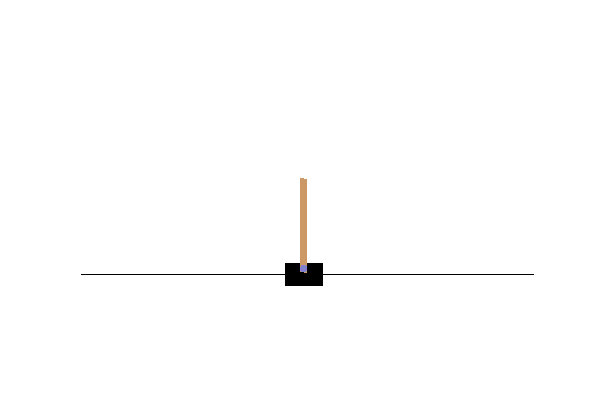
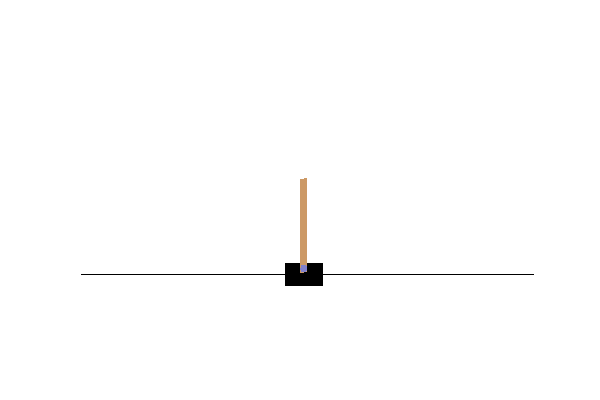
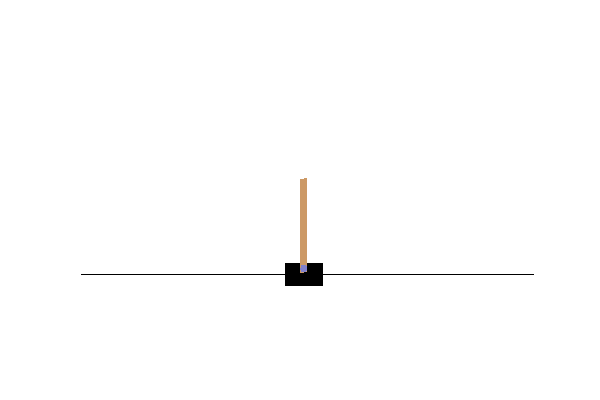
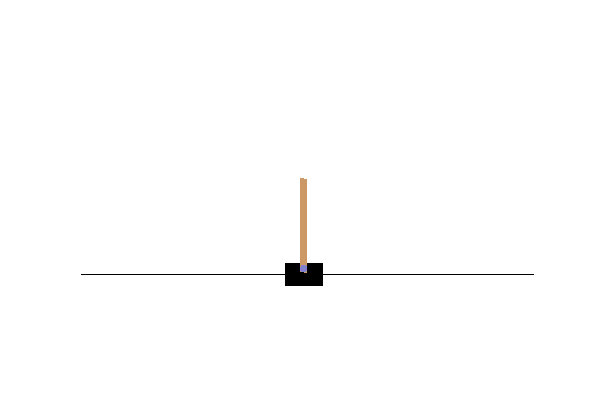
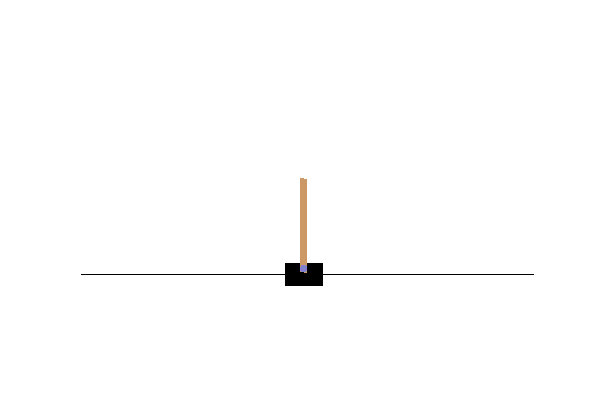
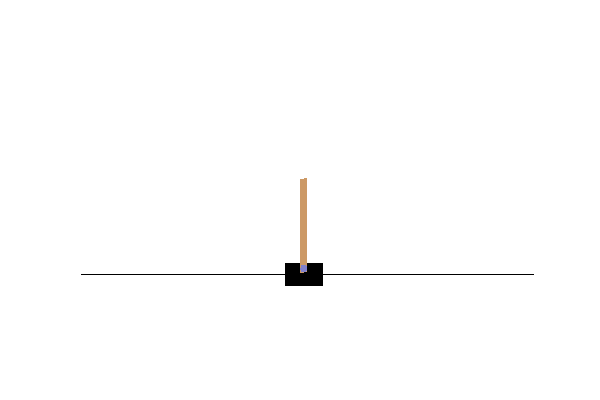
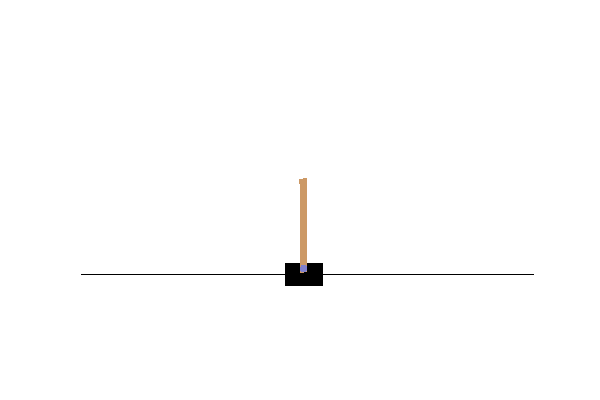
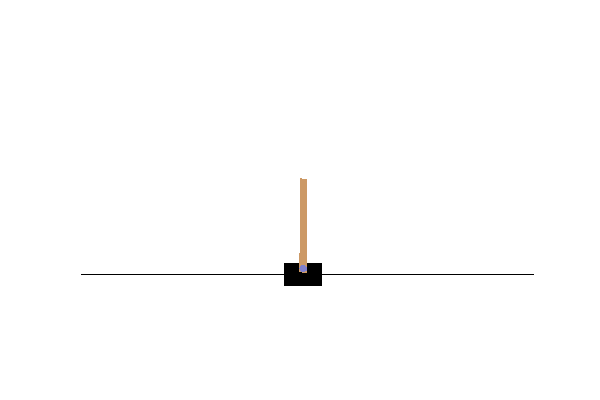
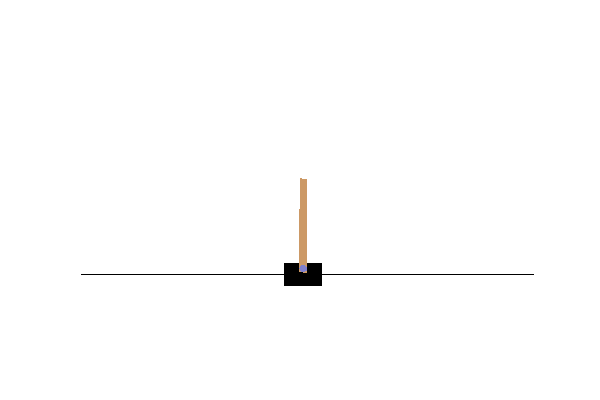
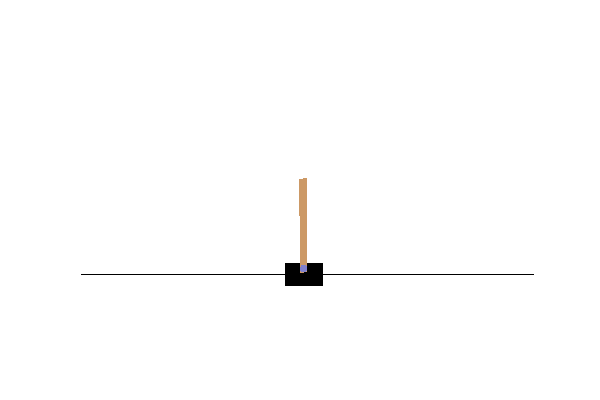
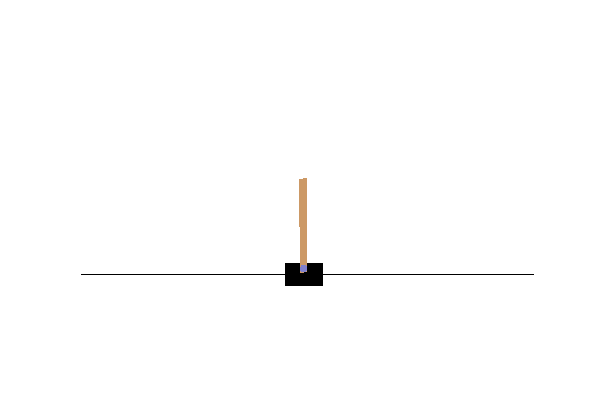
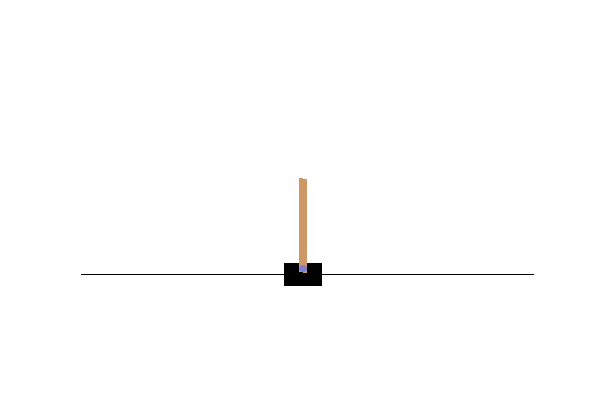
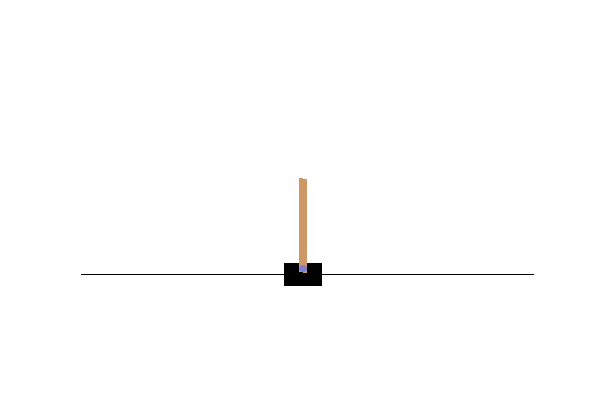
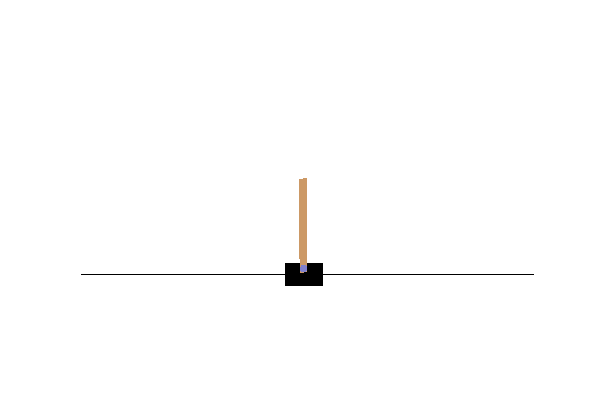
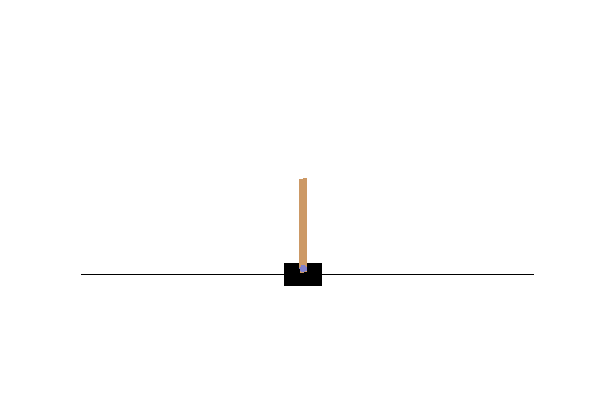
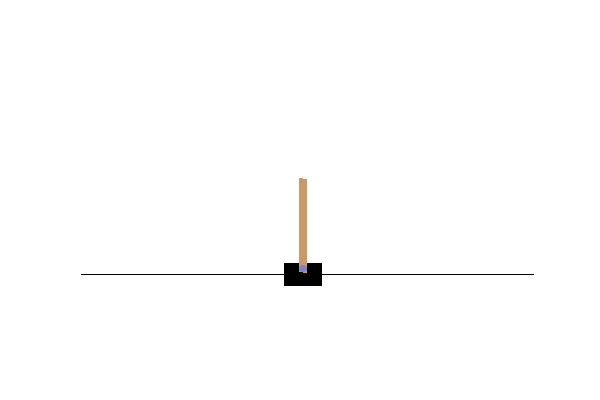
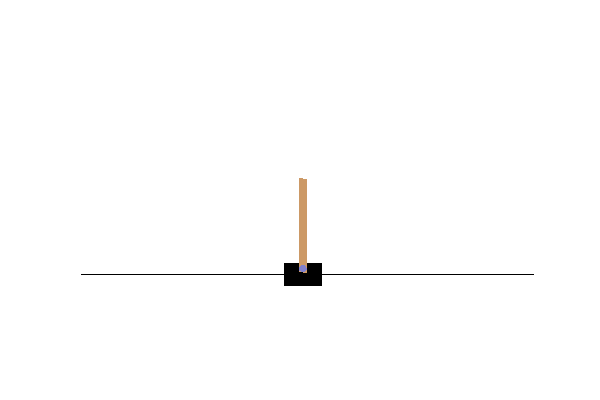
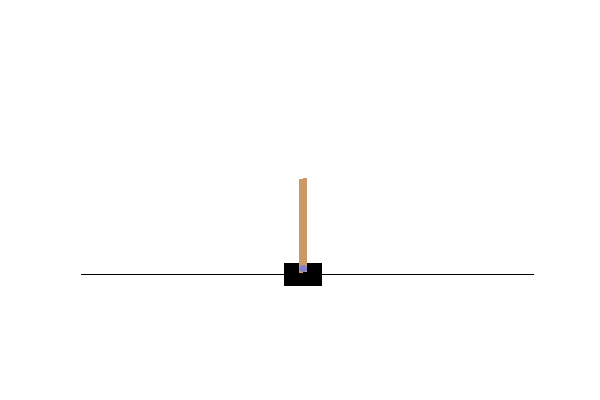
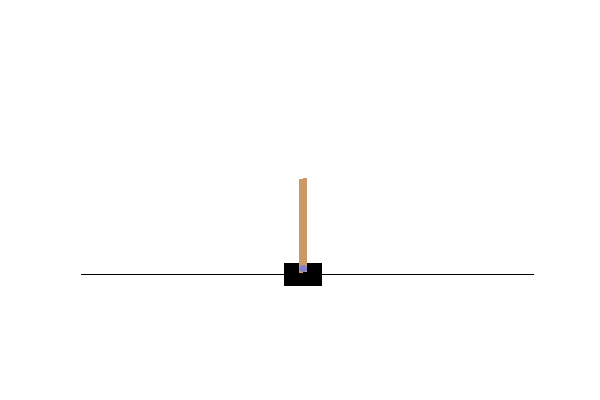
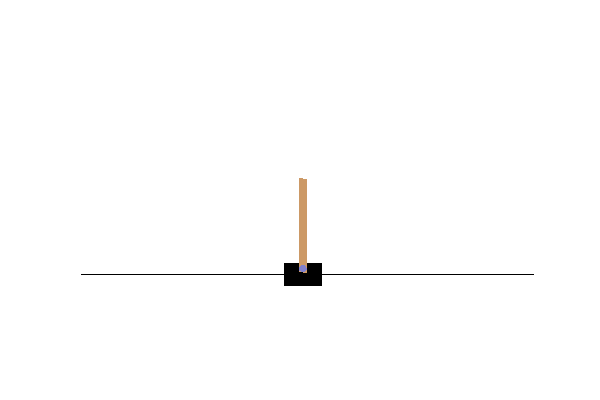
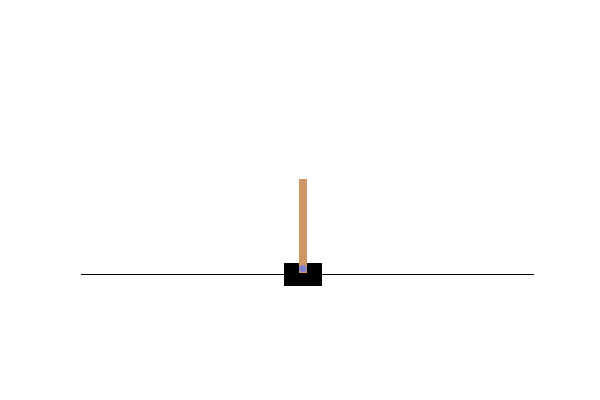
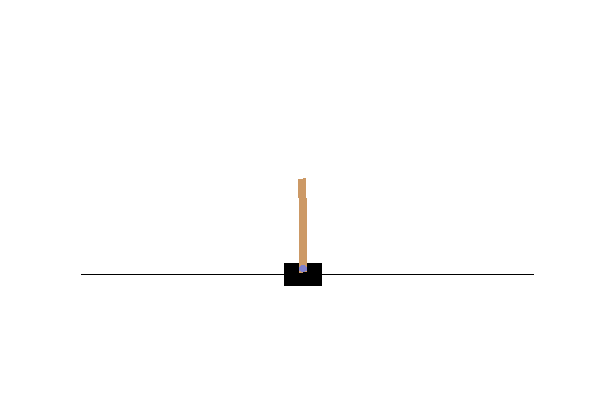
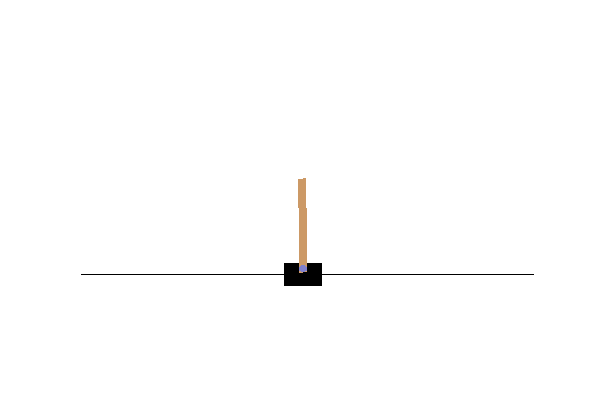
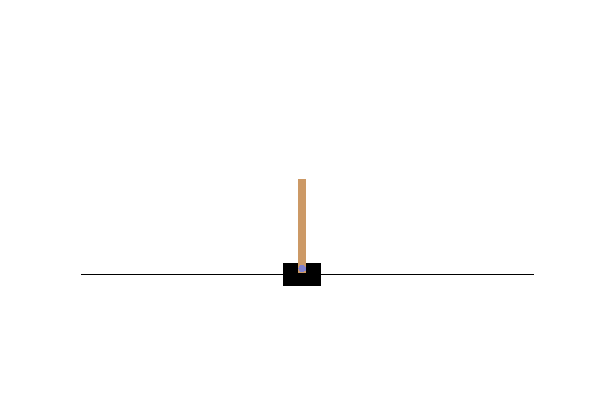
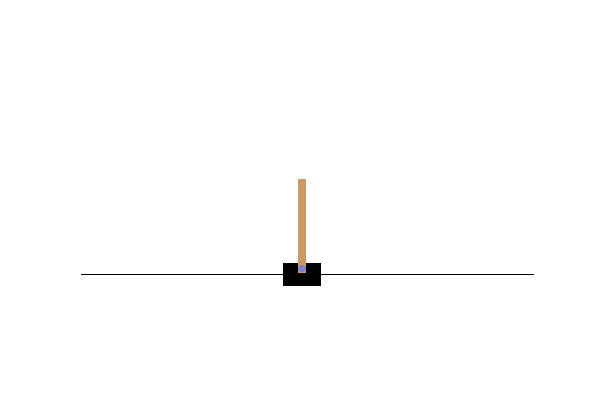
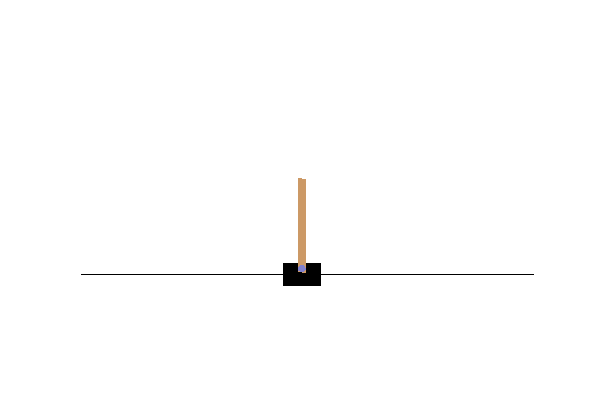
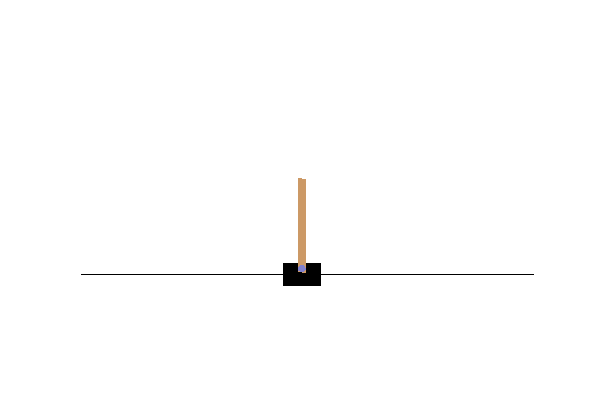
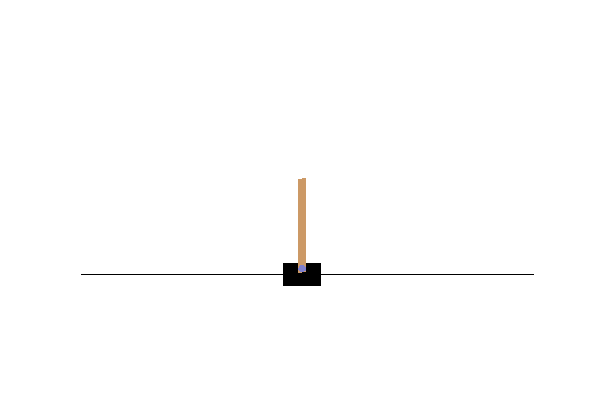
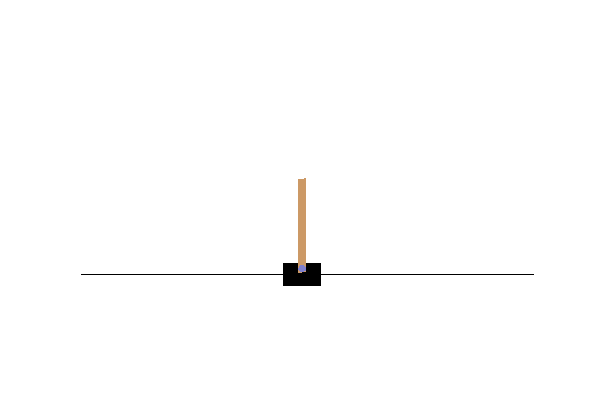
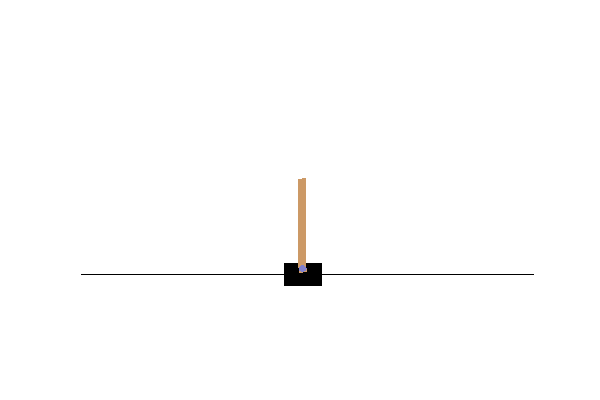
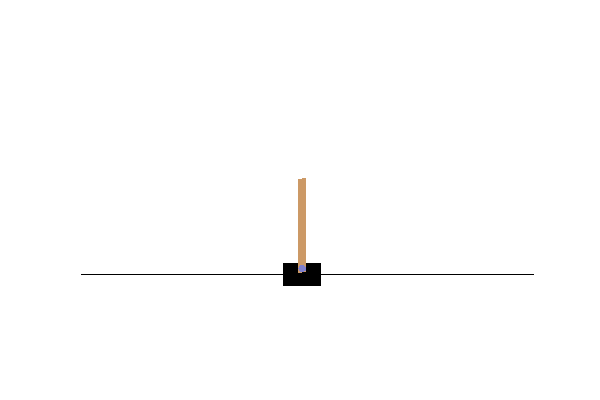
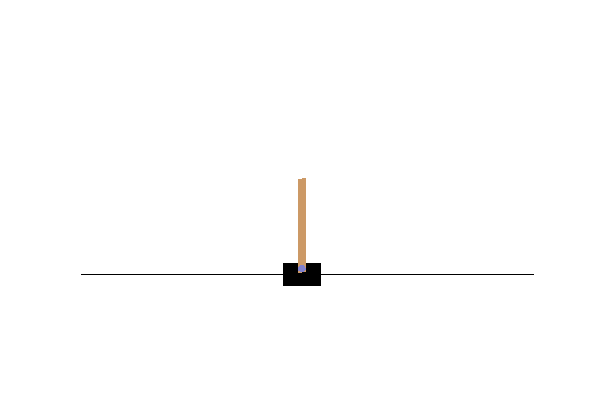
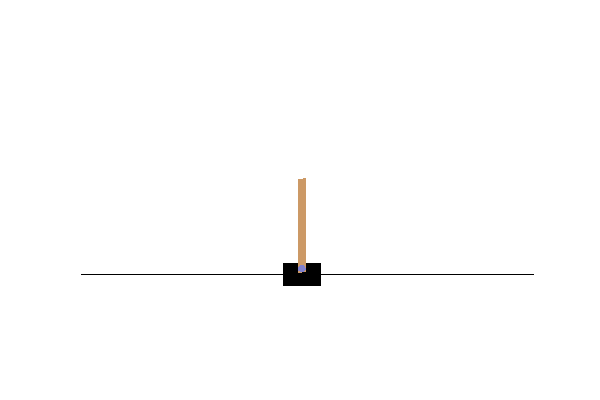
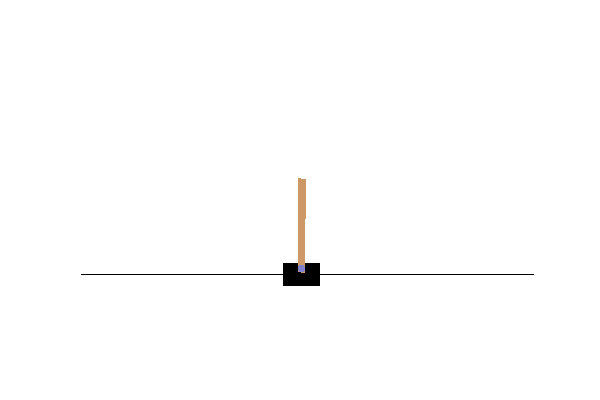
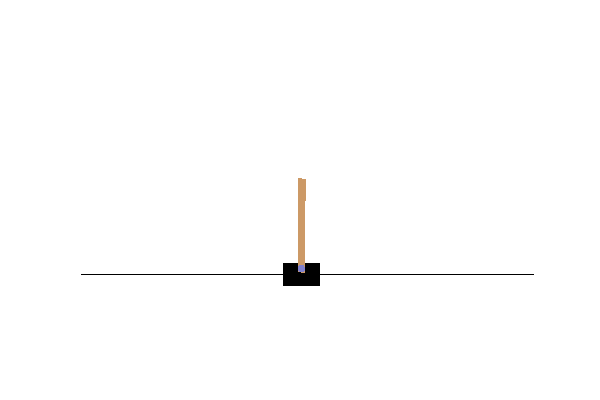
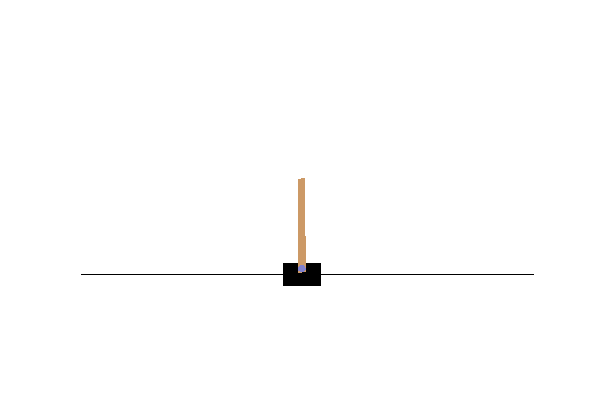
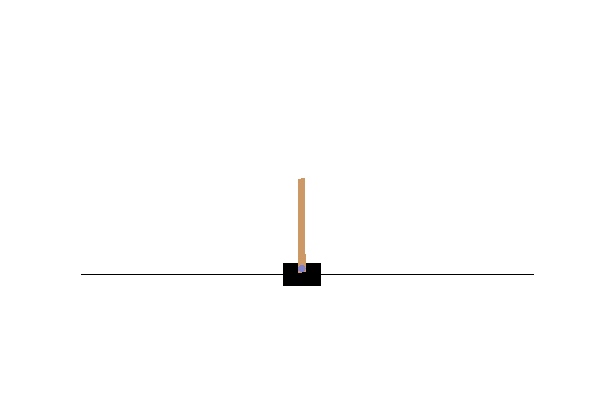
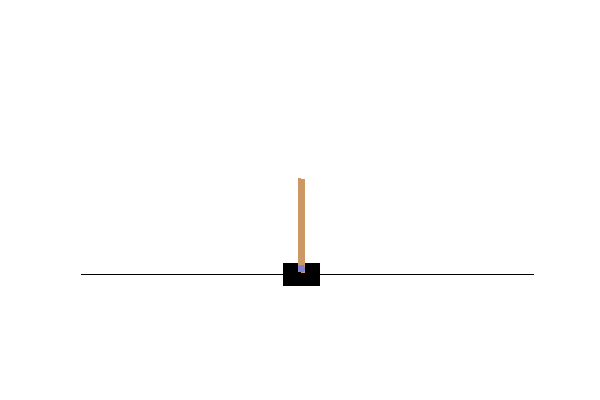
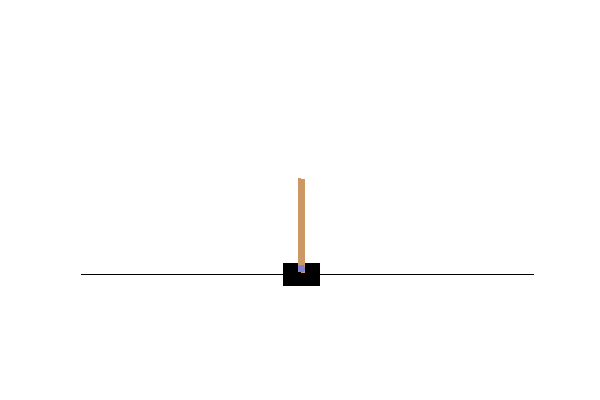
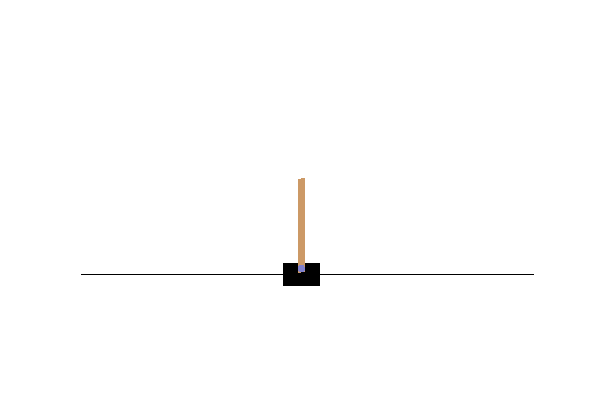
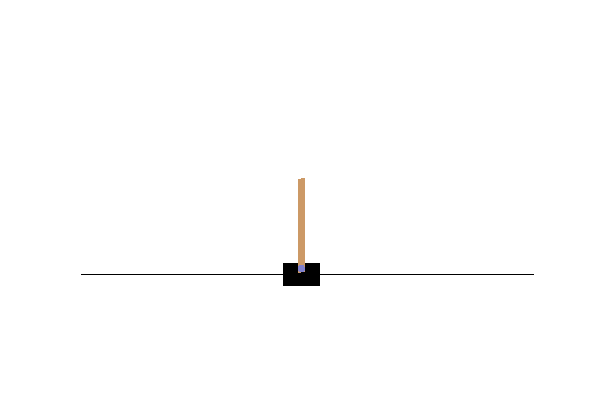
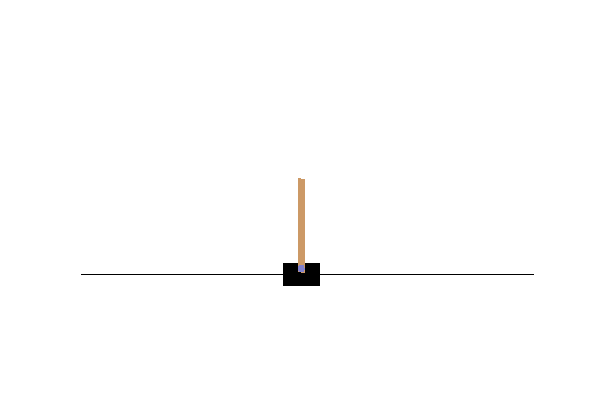
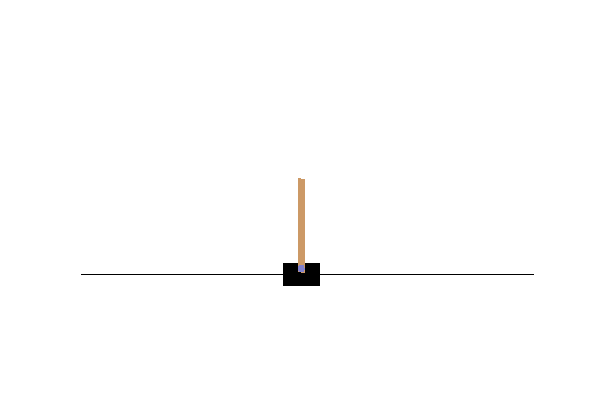
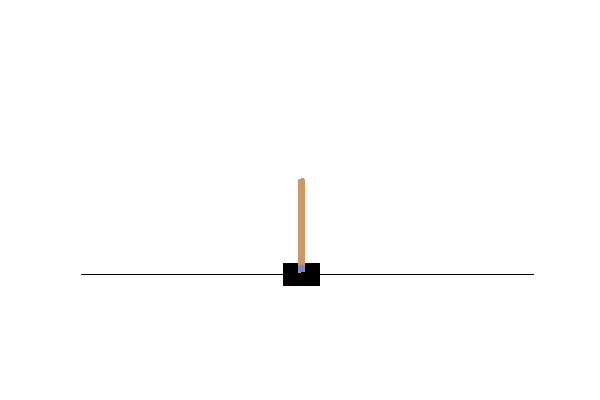
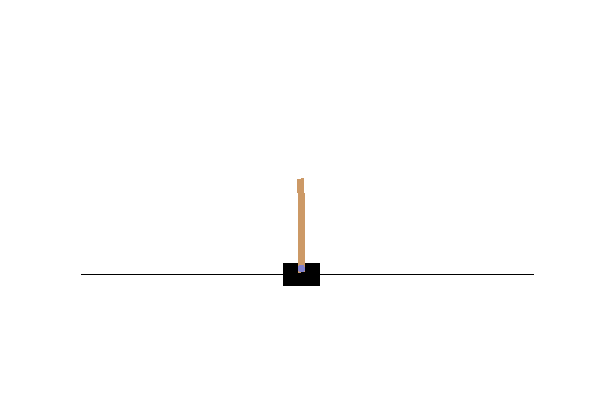
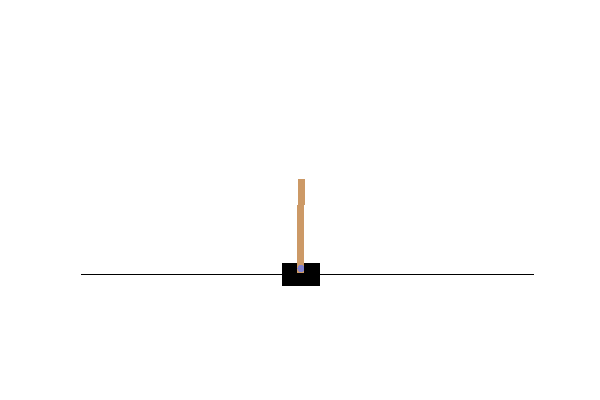
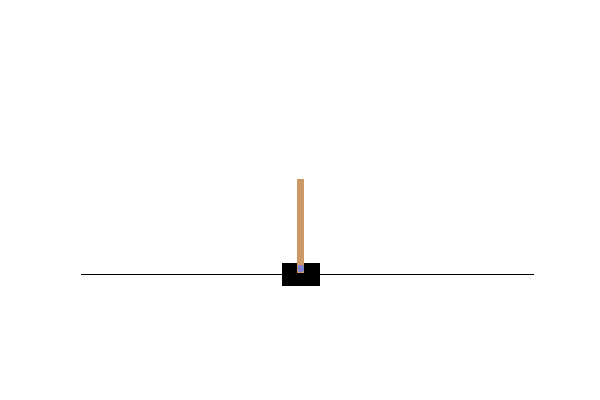
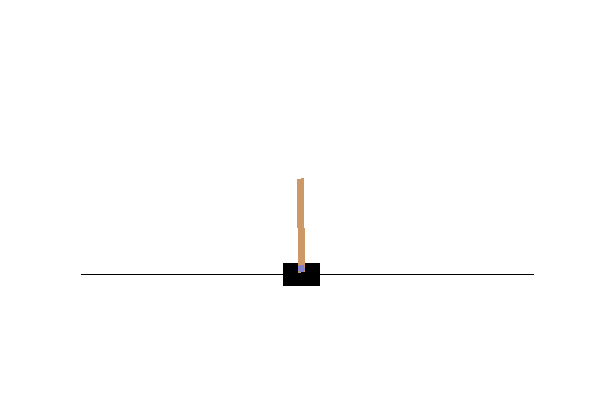
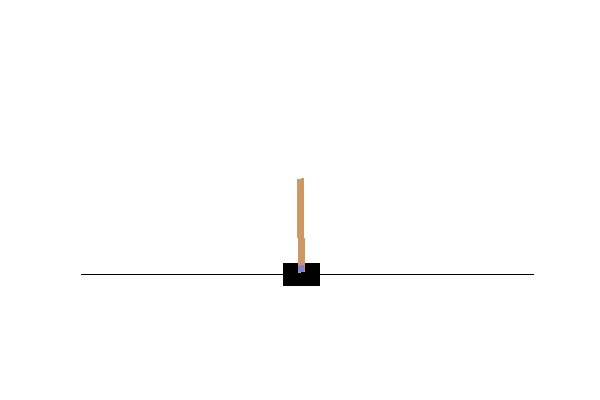
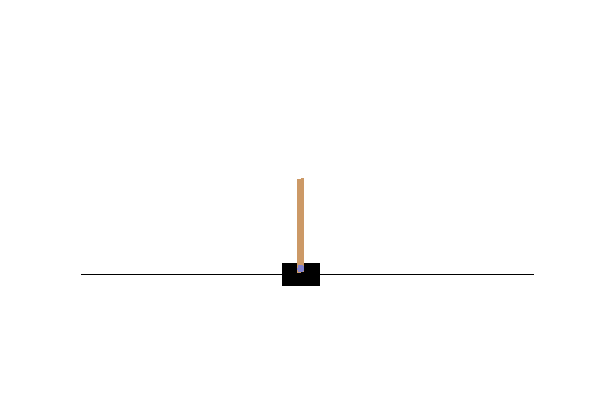
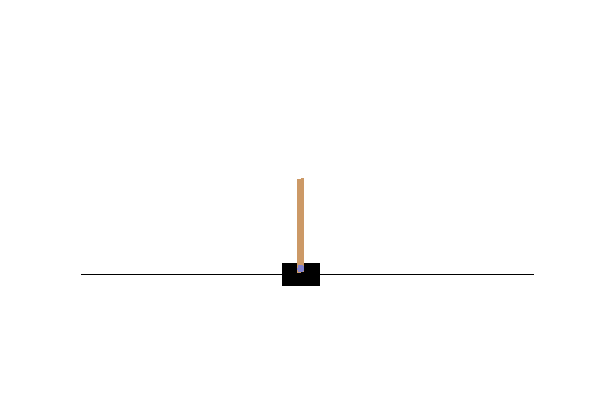
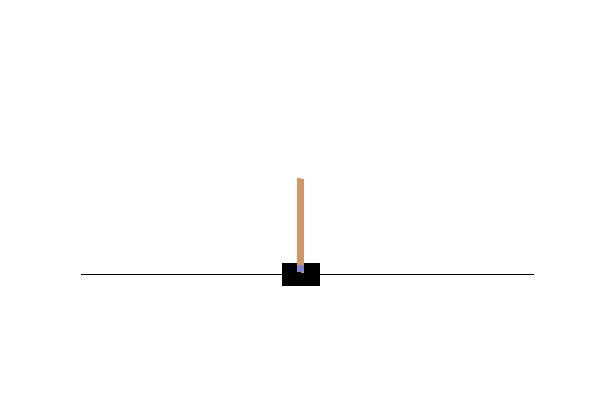
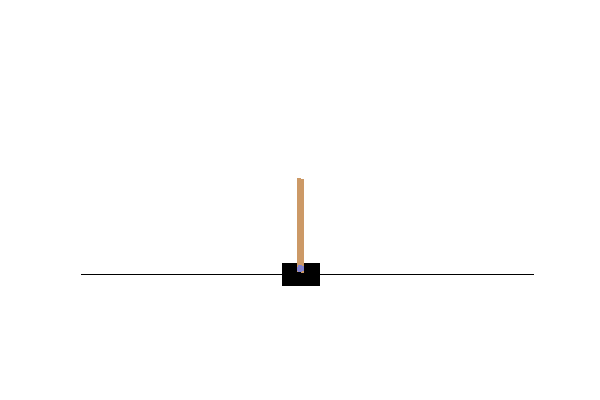
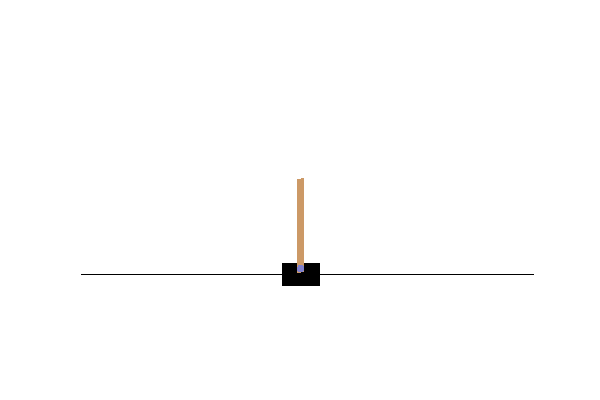
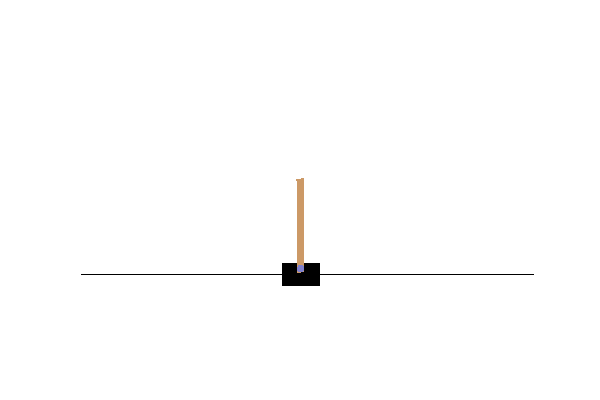
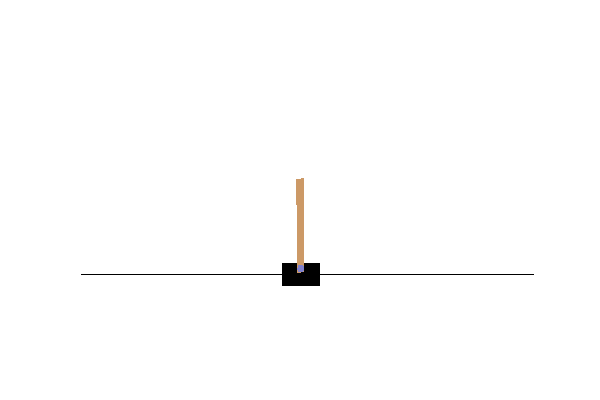
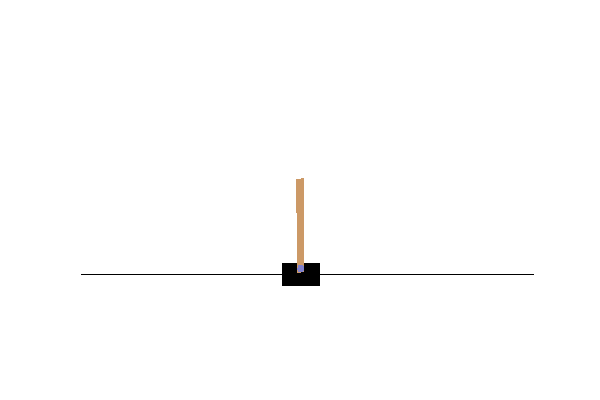
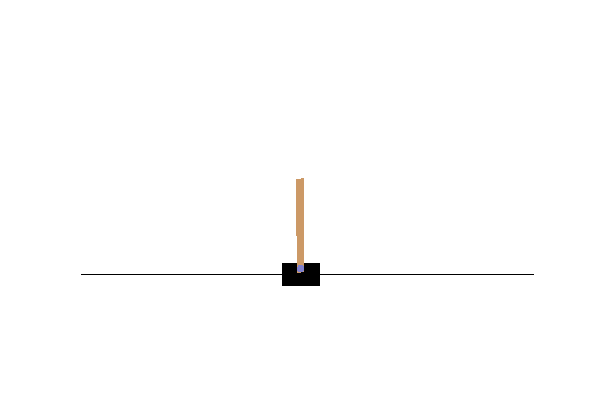
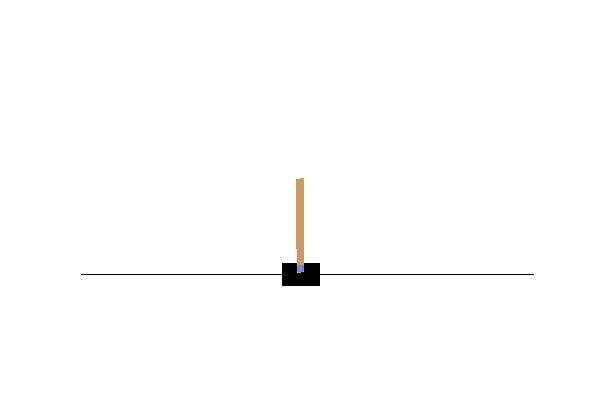
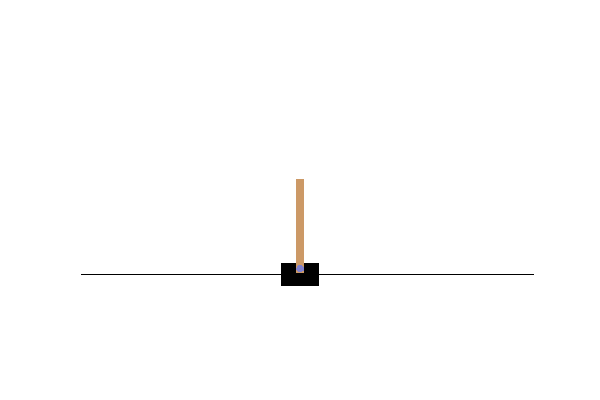
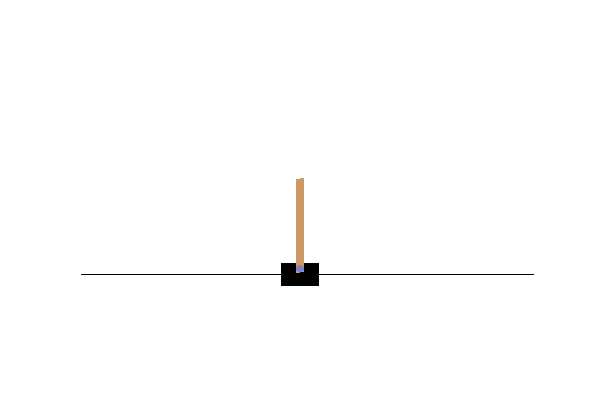
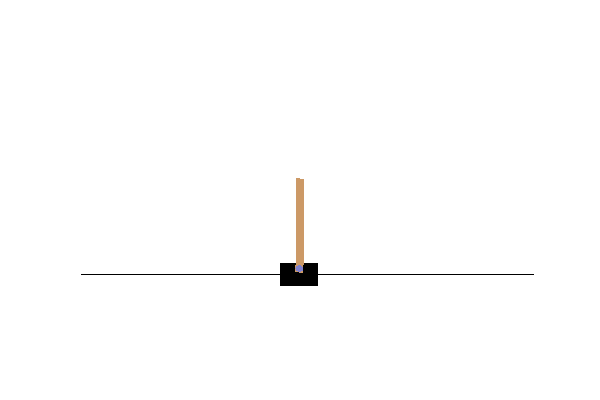
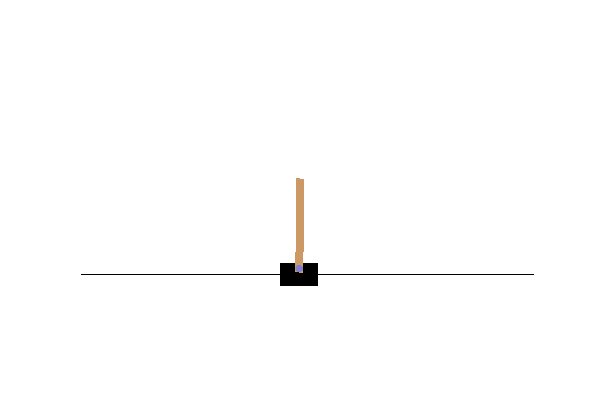
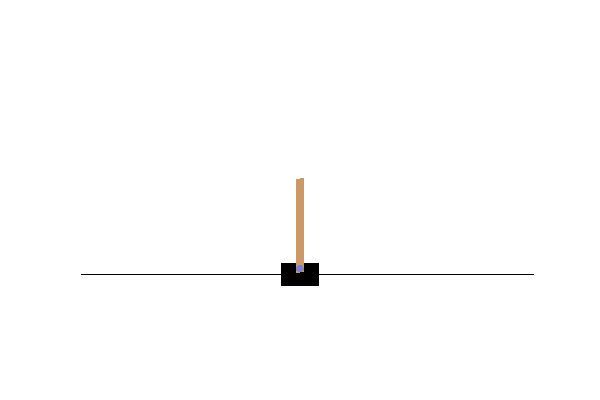
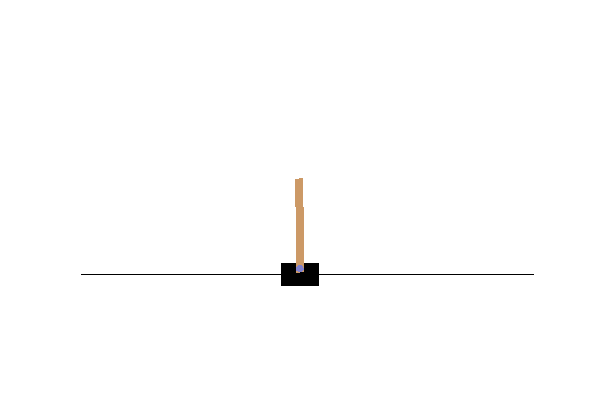
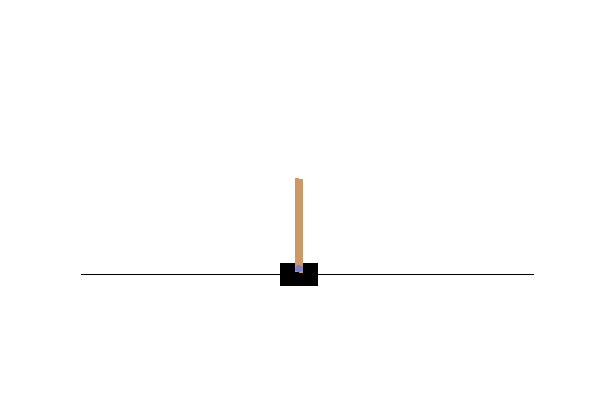
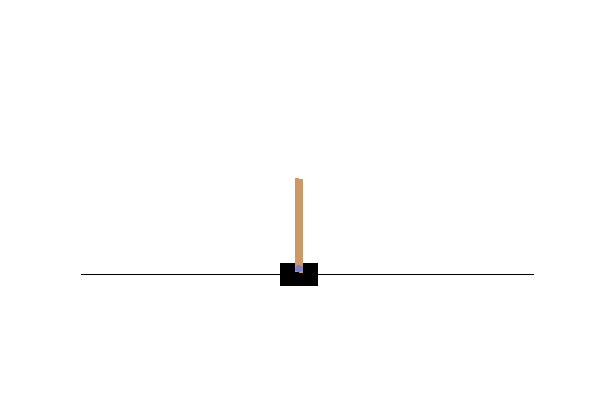
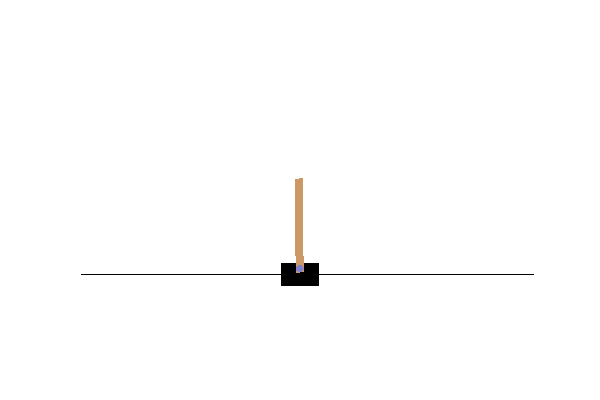
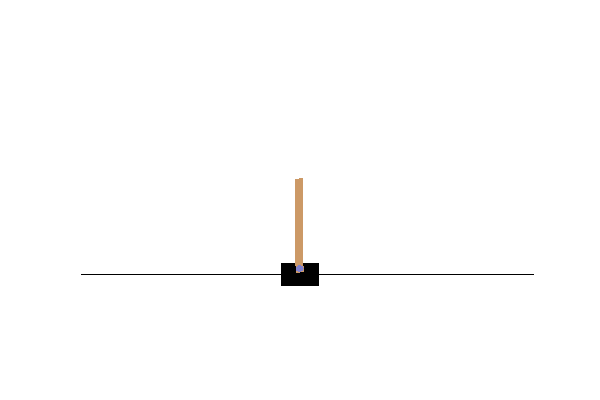
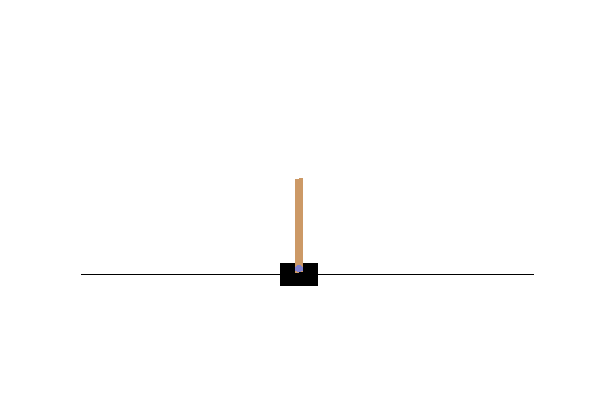
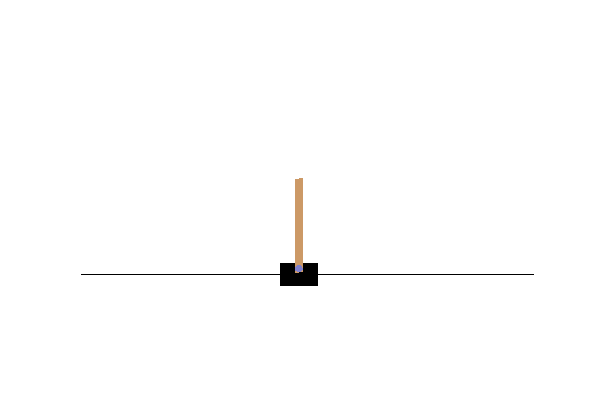
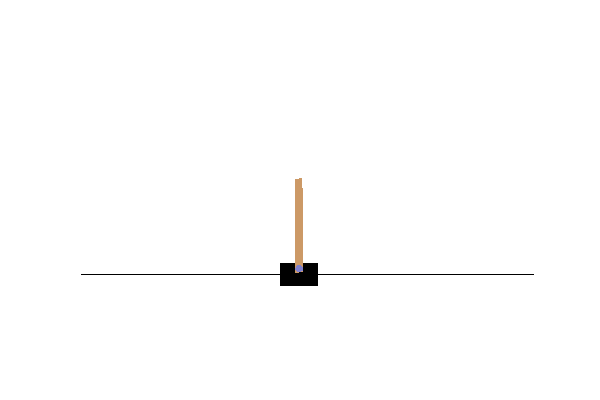
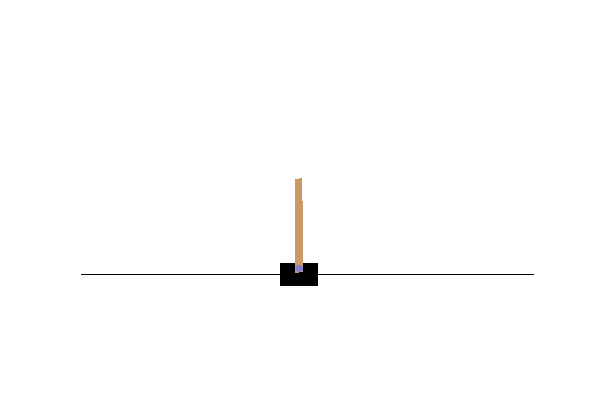
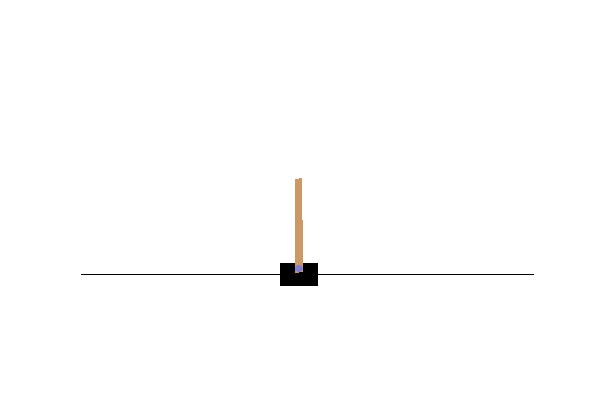
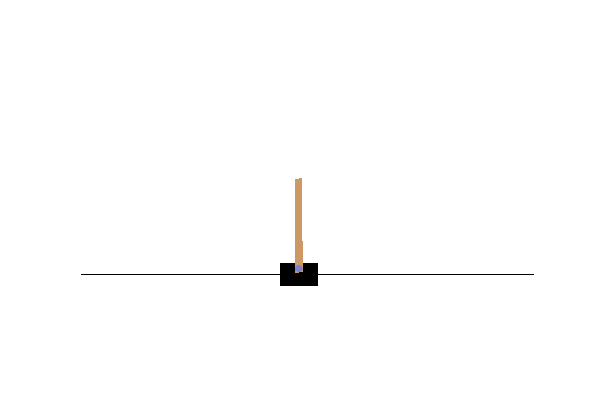
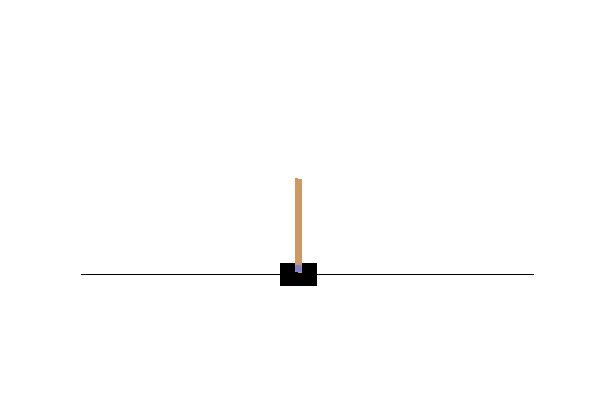
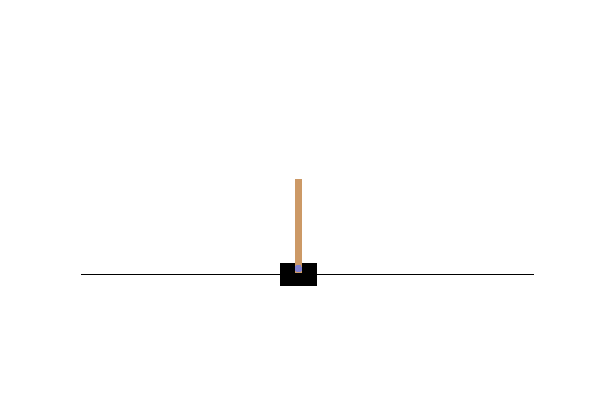
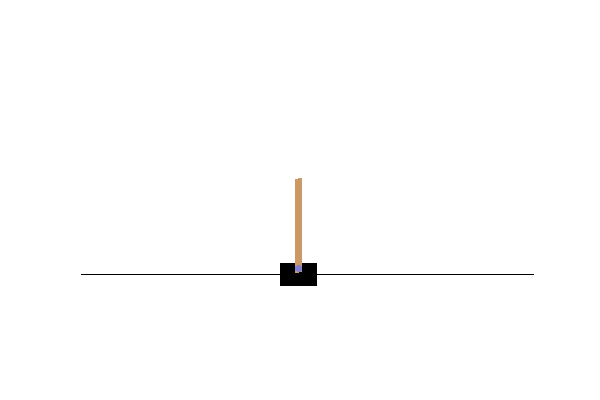
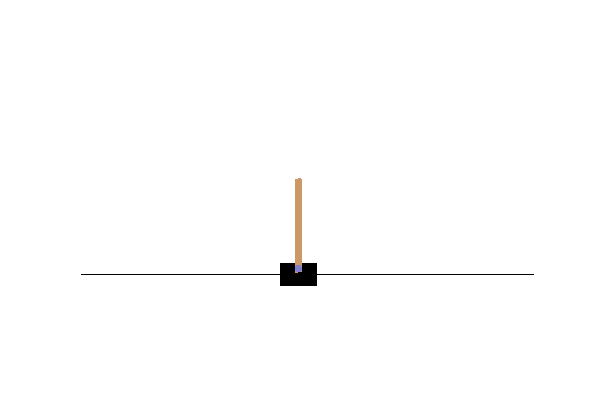
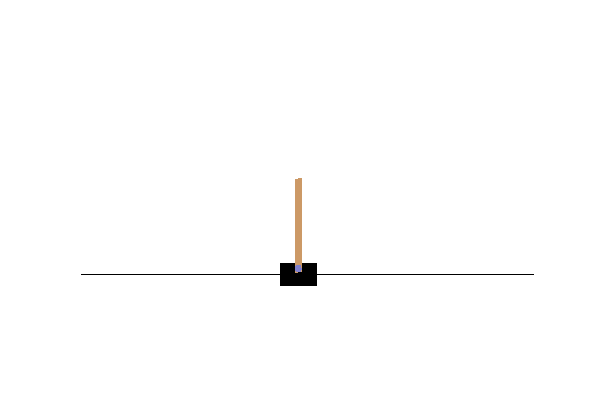
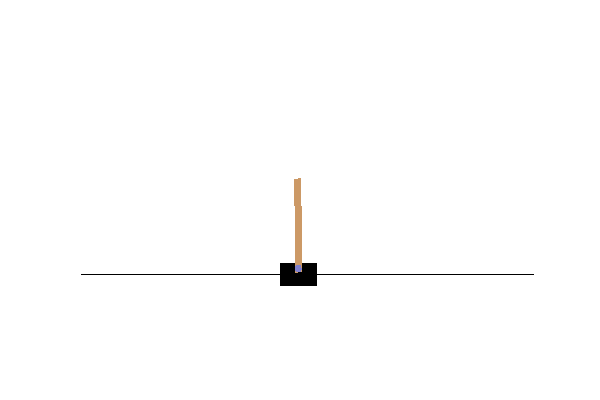
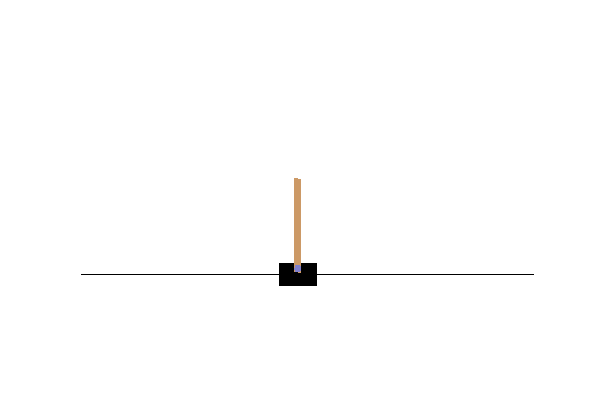
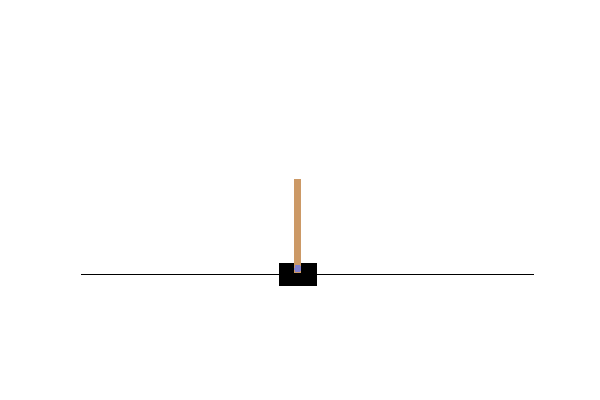
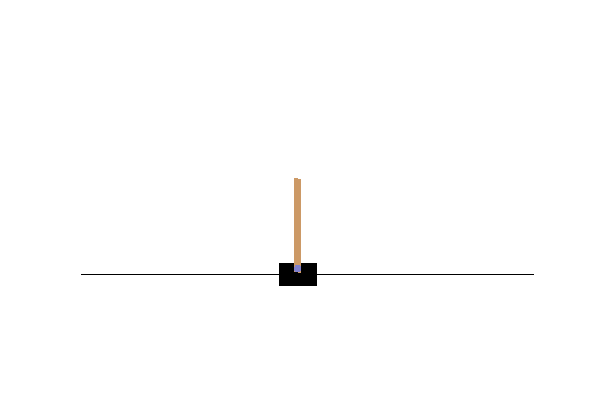
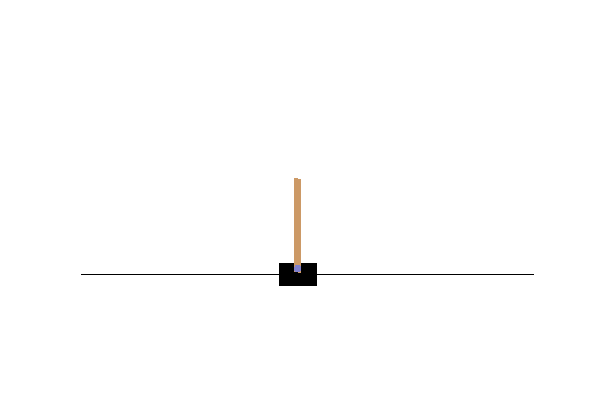
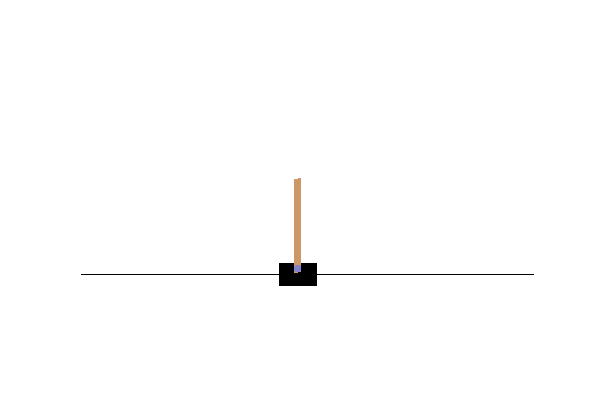
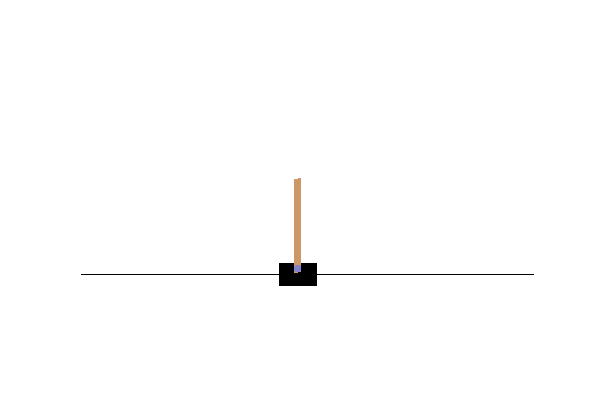
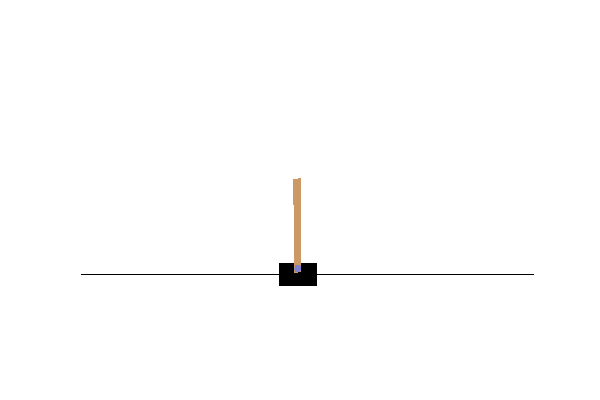
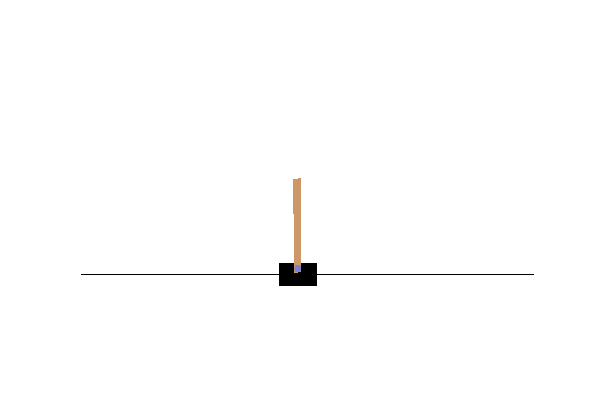
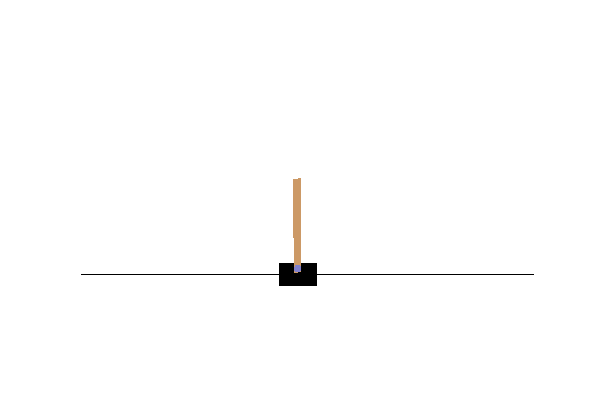
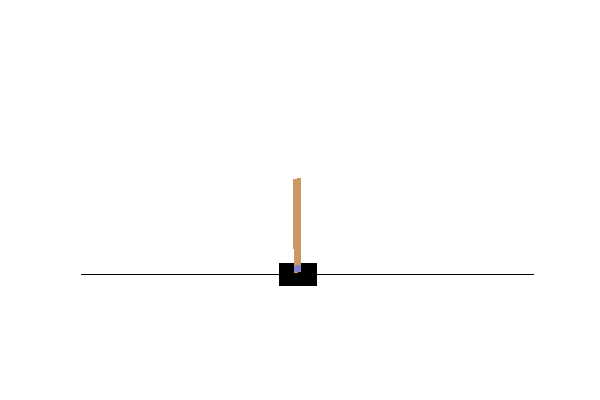
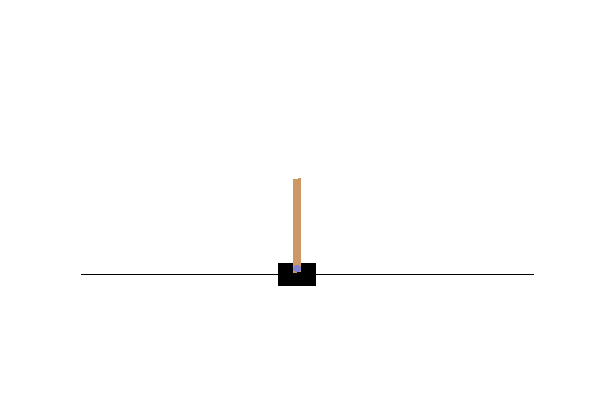
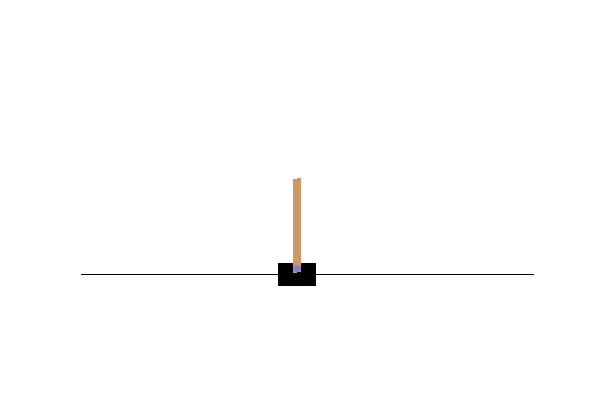
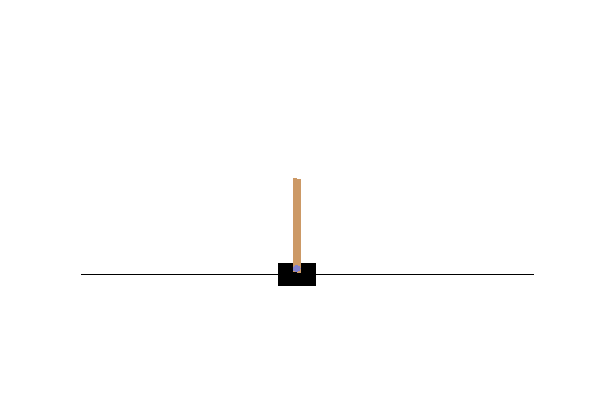
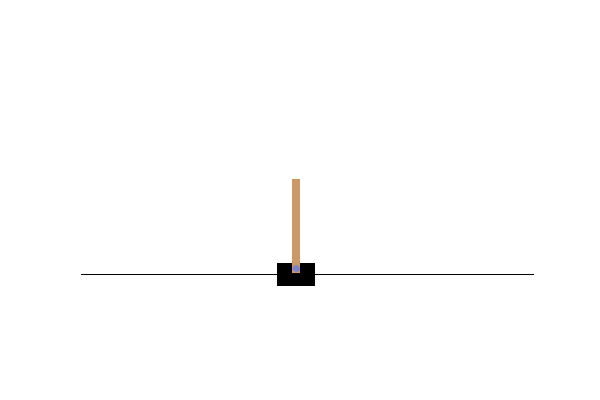
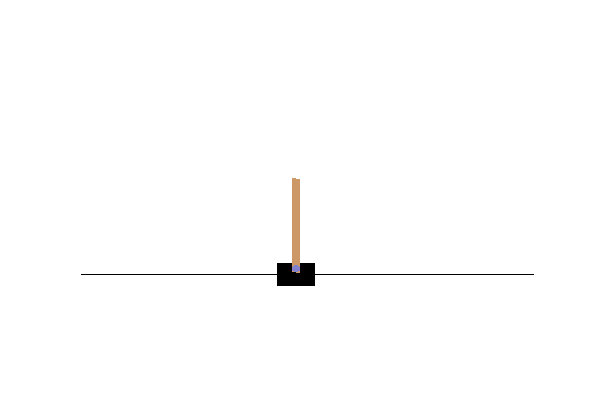
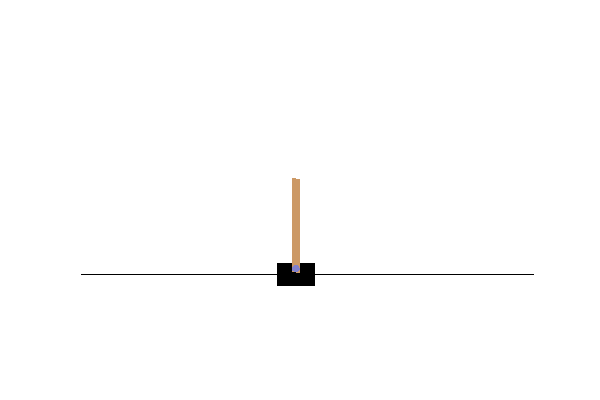
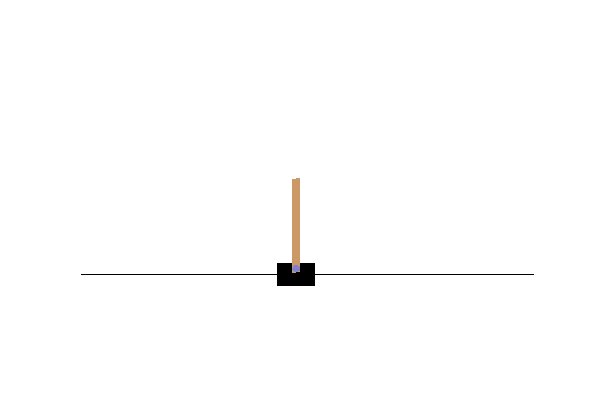
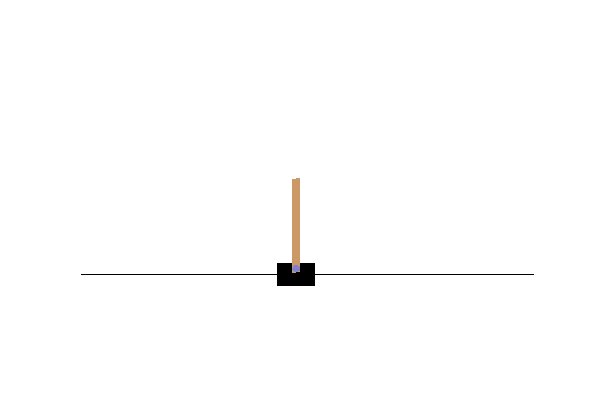
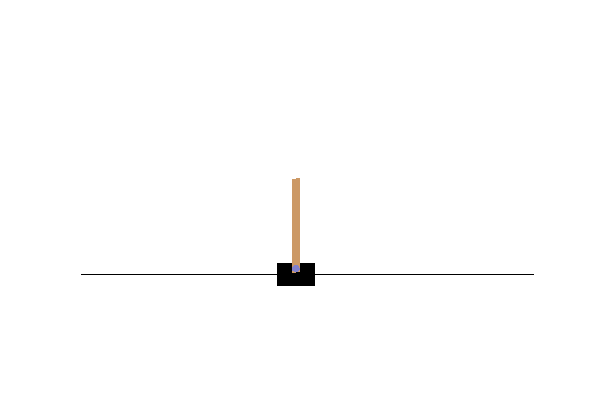
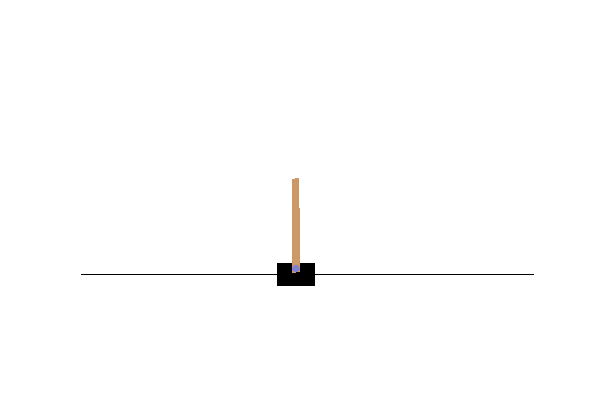
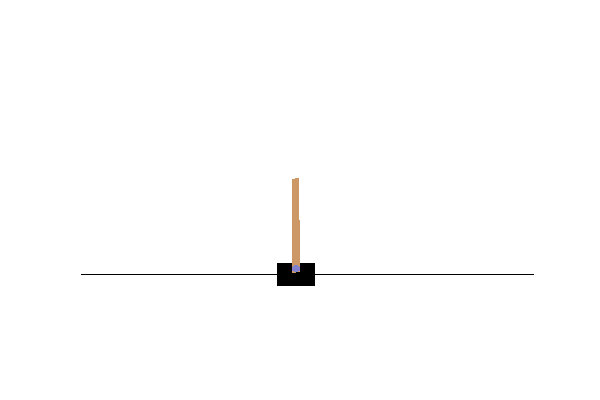
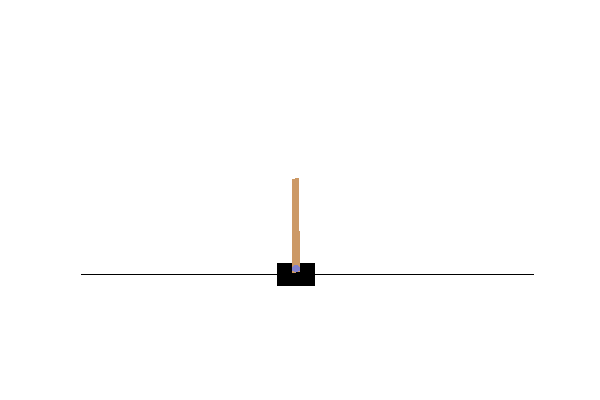
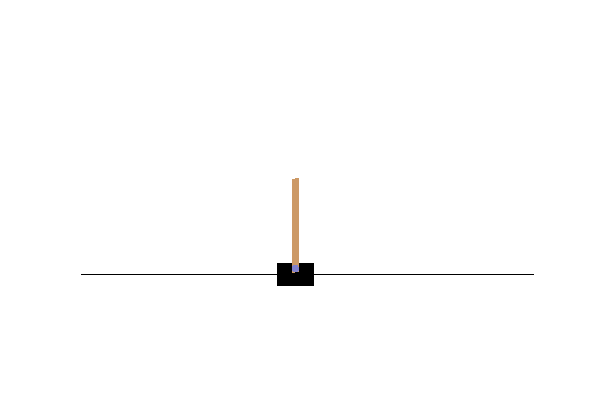
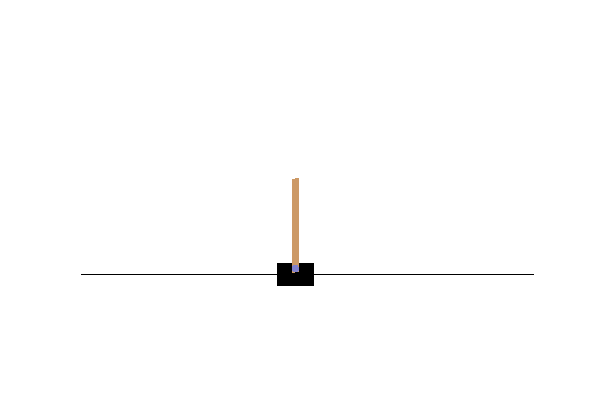
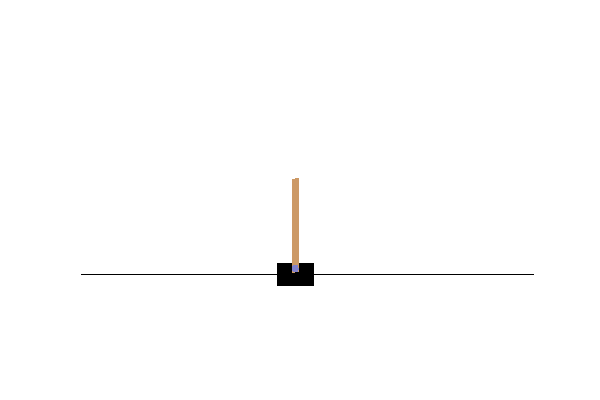
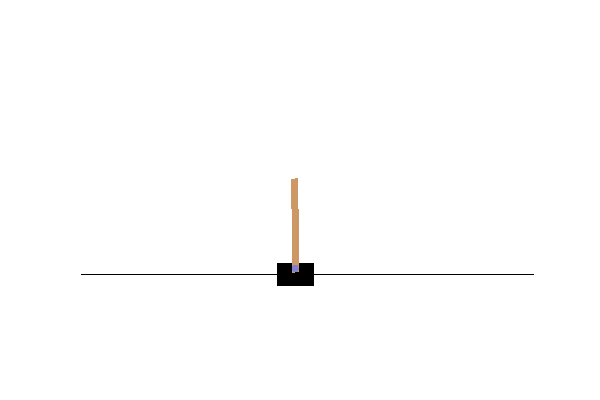
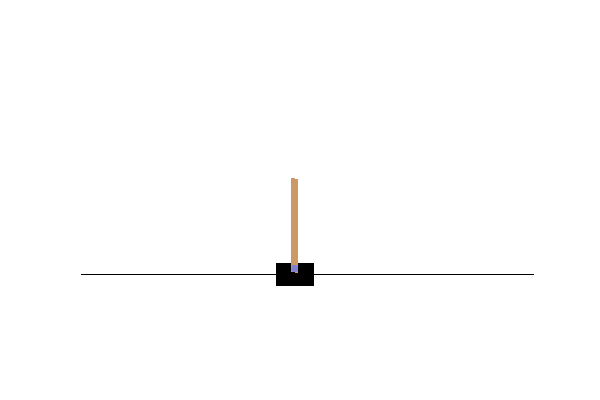
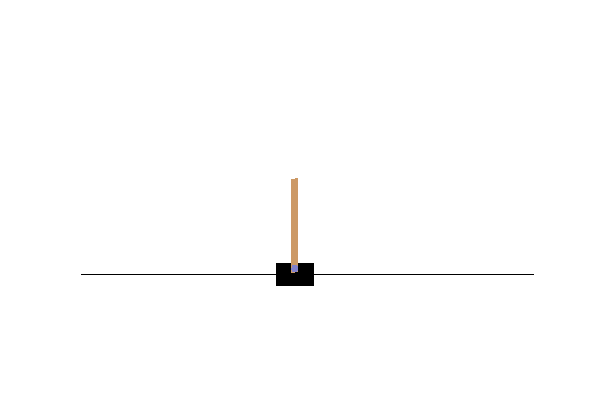
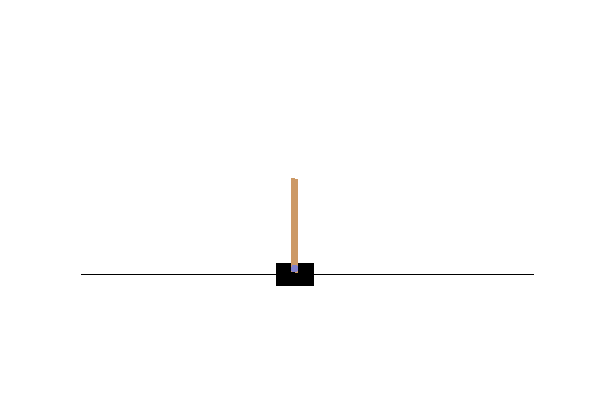
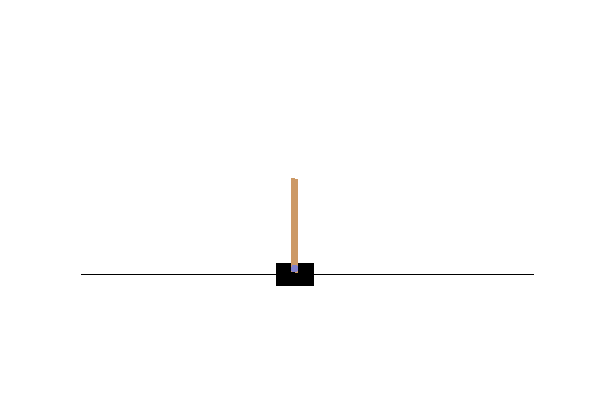
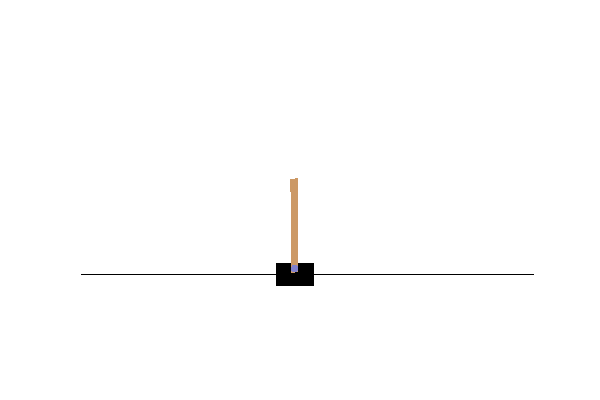
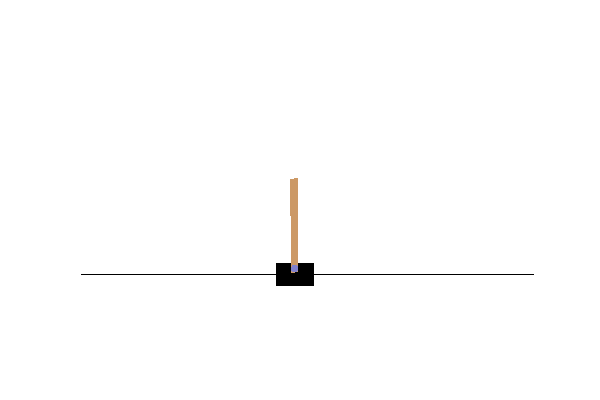
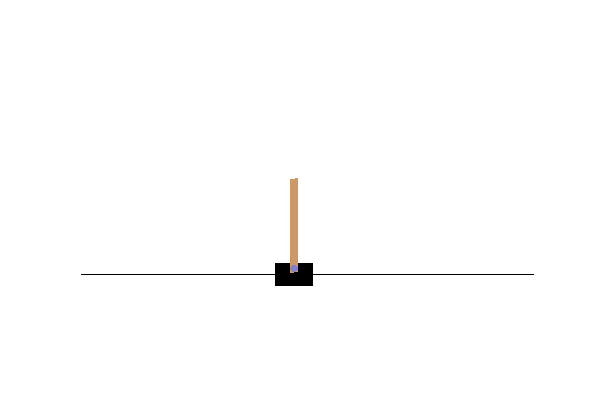
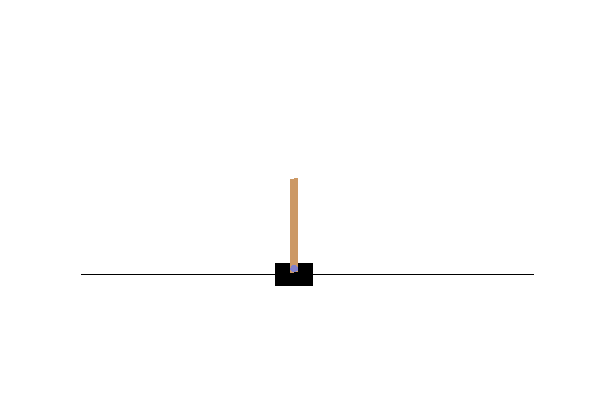
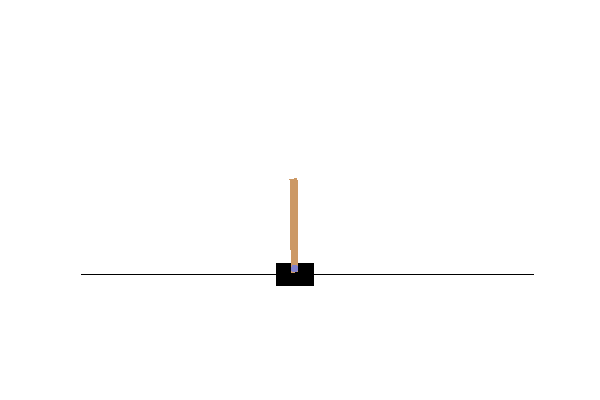
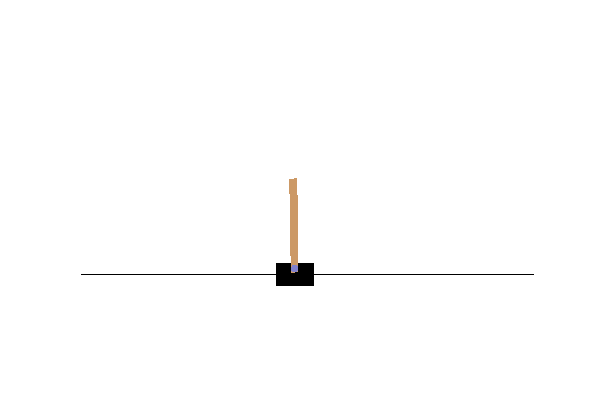
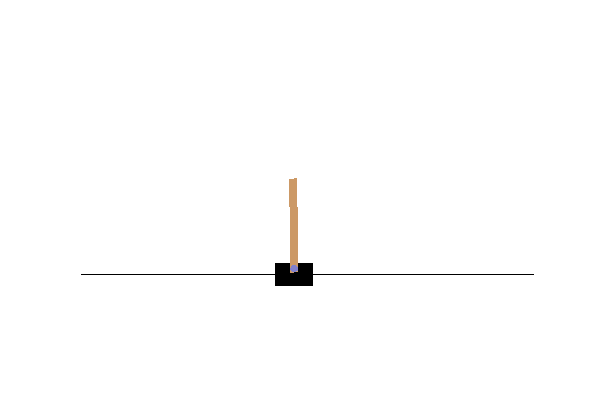
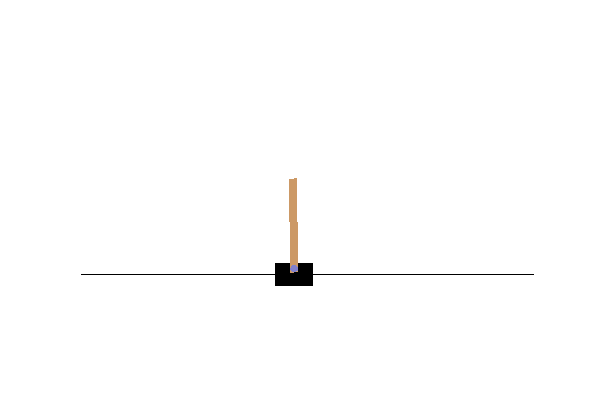
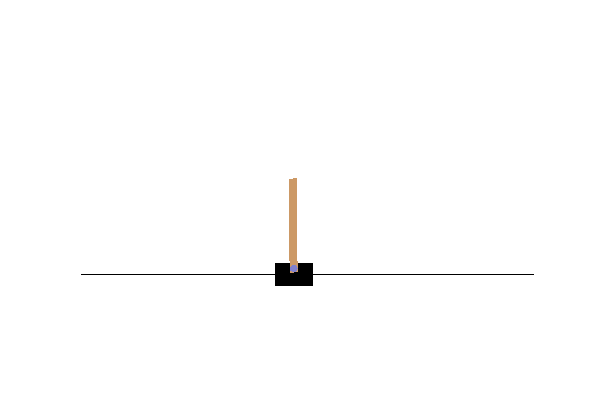
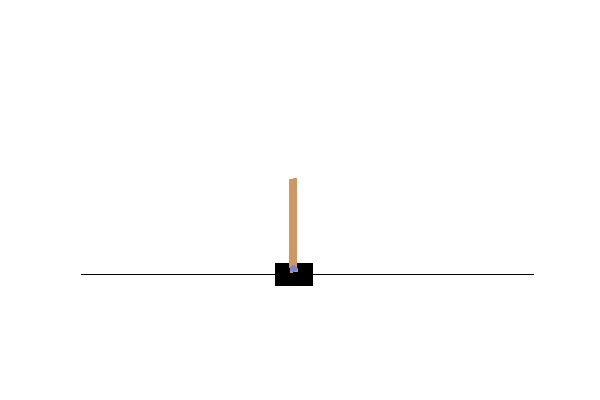
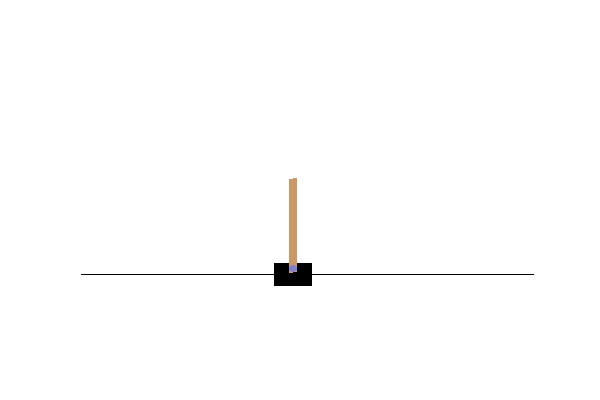
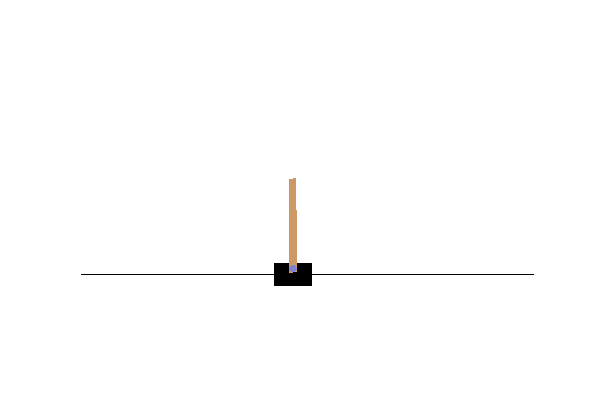
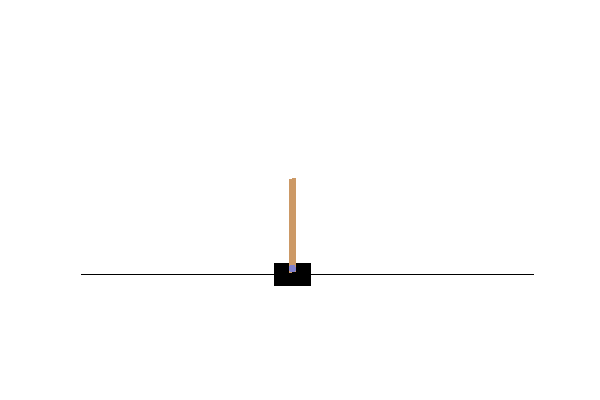
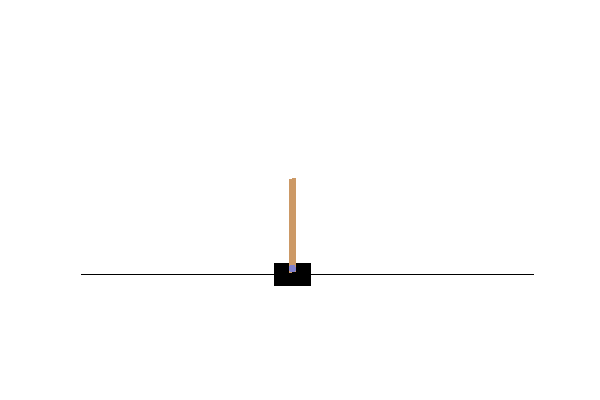
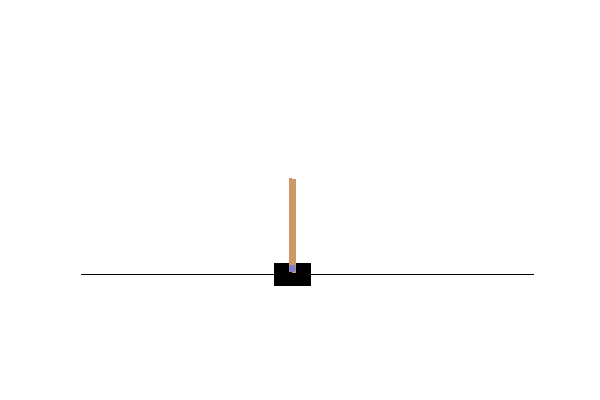
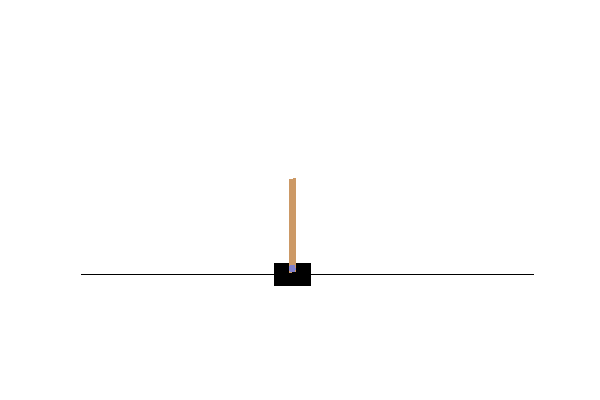
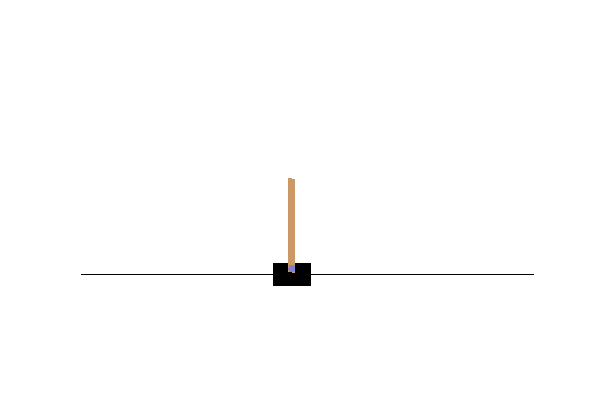
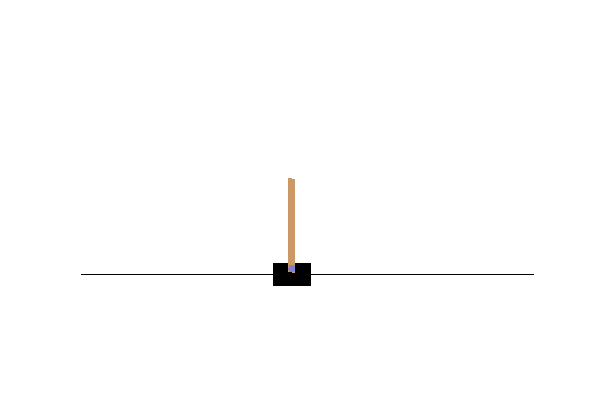
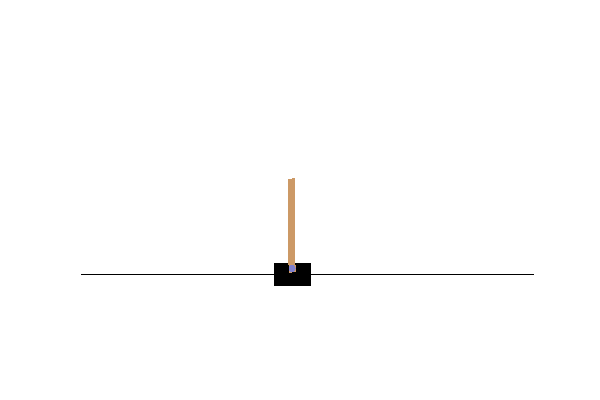
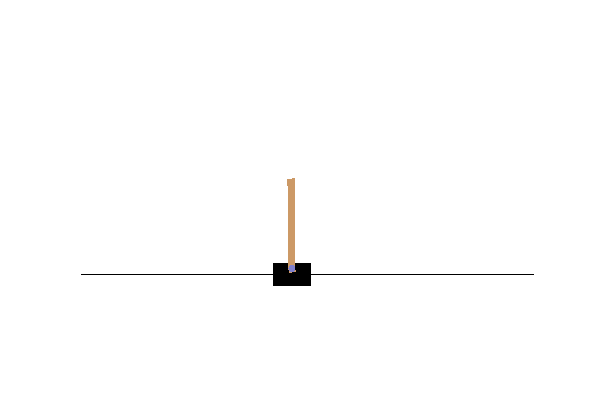

In [11]:
## Best policy gif
frames = []

obs = env.reset()
totalrew = 0
for t in range(500):
  frames.append(env.render(mode = 'rgb_array'))
  obs,rew,done,_ = env.step(policy(obs,params[maxIndex]))
  totalrew +=rew
  if done:
    break
display_frames_as_gif(frames)

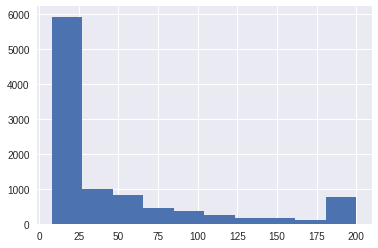

In [12]:
plt.hist(rewards)
plt.show()

In [0]:
# Hill climbing algorithm

def hill_climbing(env,iterations,lr):
  obs_dim = env.observation_space.shape[0]
  params = np.random.normal(0.0,1.0,(obs_dim,))-0.3
  count = 0
  currRew = -1
  rewards = []
  counts = []
  for i in range(iterations):
    vec = np.random.normal(0.0,1.0,(obs_dim,))*lr
    new_param = params+vec
    obs = env.reset()
    episodeRew = 0
    for t in range(500):
      obs,rew,done,_ = env.step(policy(new_param,obs))
      episodeRew+=rew
      if done:
        break
    if episodeRew > currRew :
      rewards.append(episodeRew)
      currRew = episodeRew
      params = new_param
      count+=1
      counts.append(count)
      print("New step. Params : {} Current Reward {}".format(params,currRew))
  return params,counts,rewards

New step. Params : [0.71374742 1.15154637 0.2479686  0.64648071] Current Reward 9.0
New step. Params : [0.74095149 1.07137355 0.26792616 0.66374415] Current Reward 10.0
New step. Params : [0.76796649 1.10730191 0.26962387 0.84194231] Current Reward 35.0
New step. Params : [0.75936745 0.97457621 0.20733753 0.94798984] Current Reward 86.0
New step. Params : [0.89006537 0.78362242 0.21174947 0.98937387] Current Reward 110.0
New step. Params : [0.73362212 0.64592142 0.16130904 1.03248514] Current Reward 115.0
New step. Params : [0.57042093 0.61224137 0.20641293 1.15475244] Current Reward 155.0
New step. Params : [0.53110826 0.57407463 0.40768234 1.12699352] Current Reward 200.0


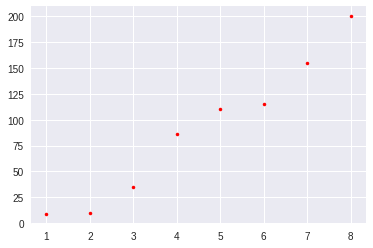

In [20]:
params,counts,rews = hill_climbing(env,10000,0.1)
plt.plot(counts,rews,'r.')
plt.show()

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
[0.53110826 0.57407463 0.40768234 1.12699352] Rewards =  183.0



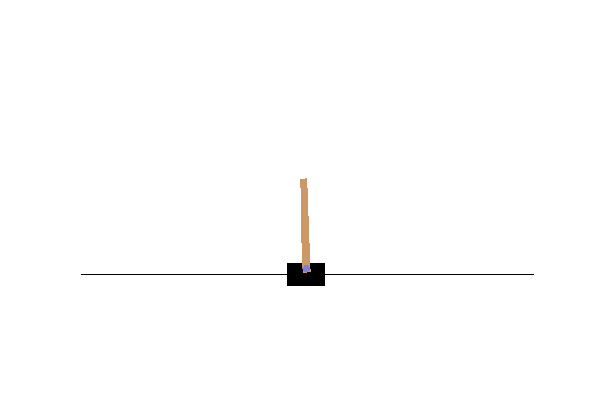
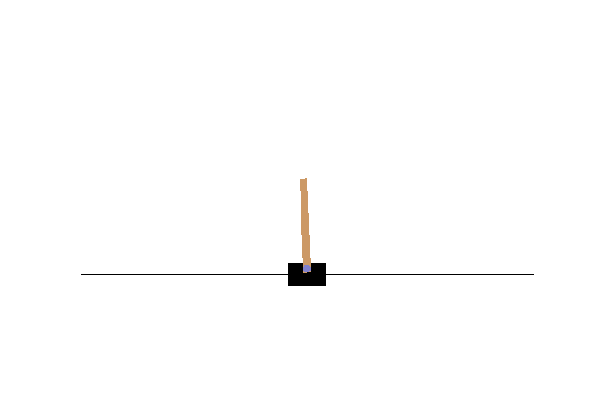
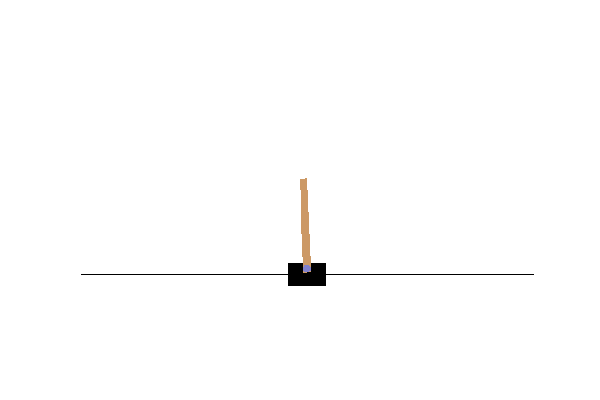
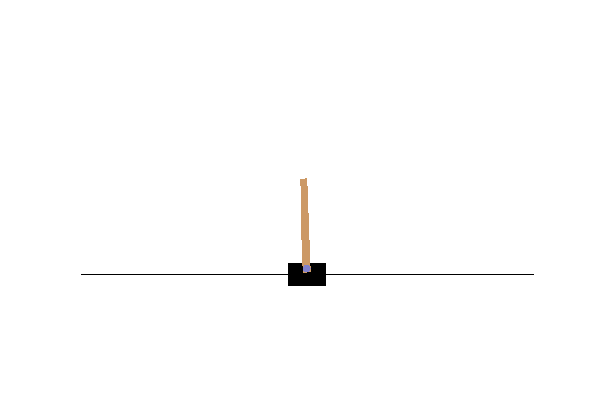
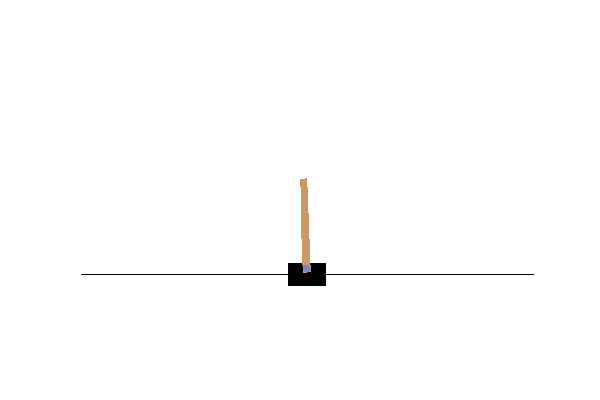
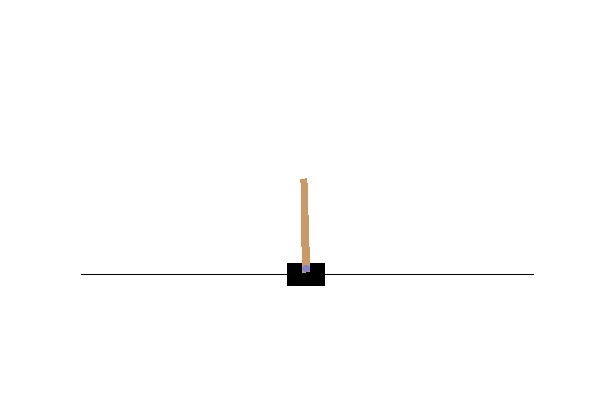
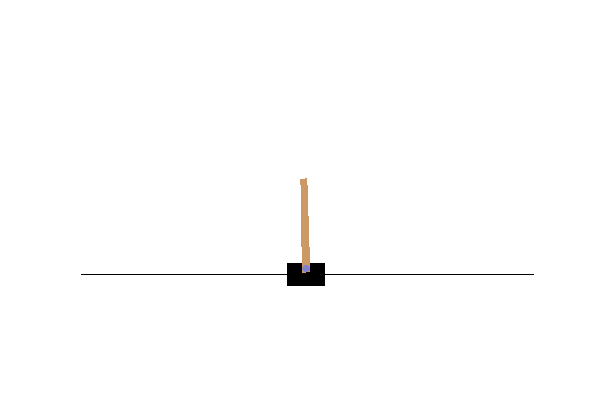
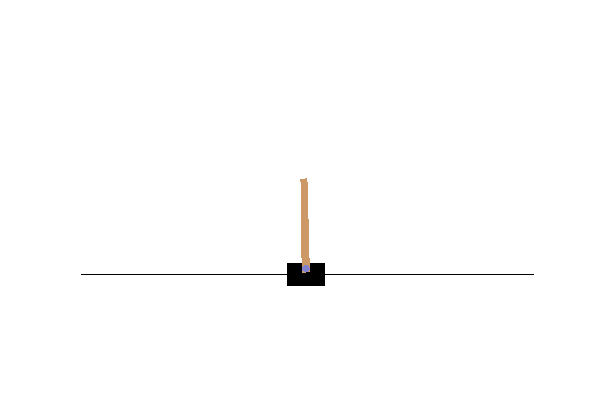
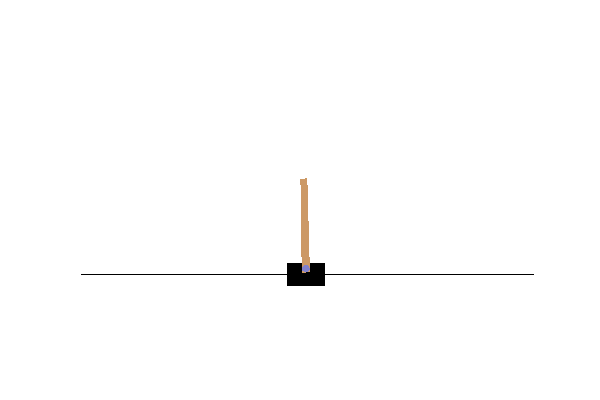
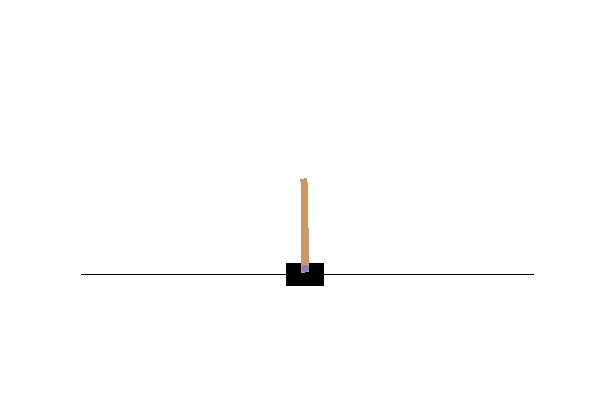
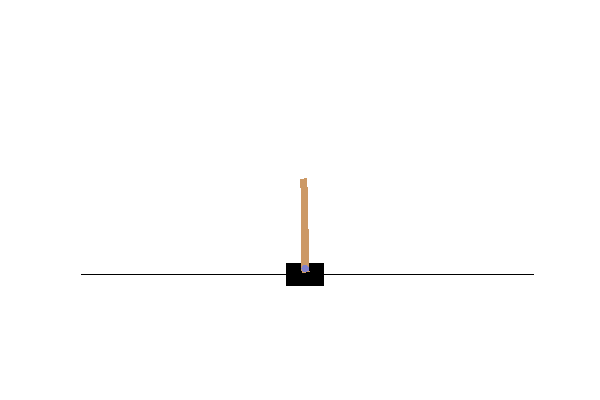
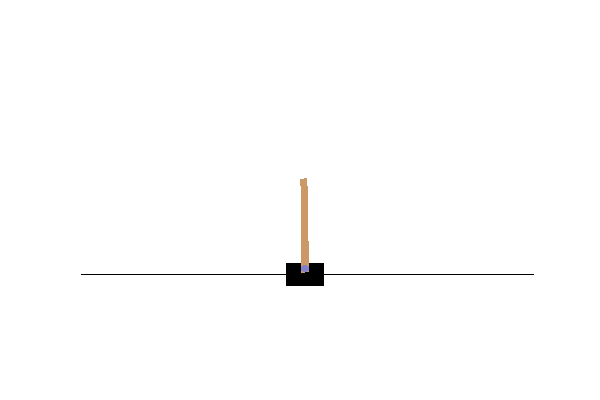
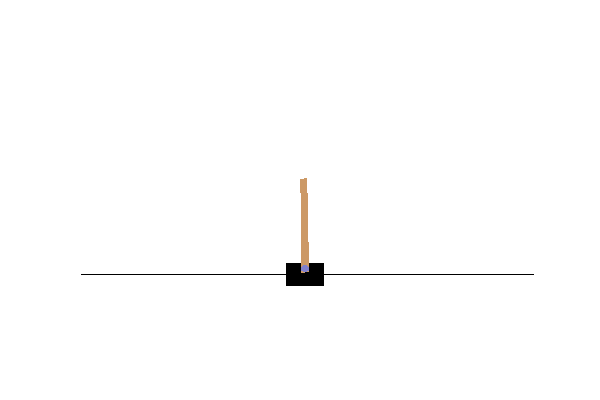
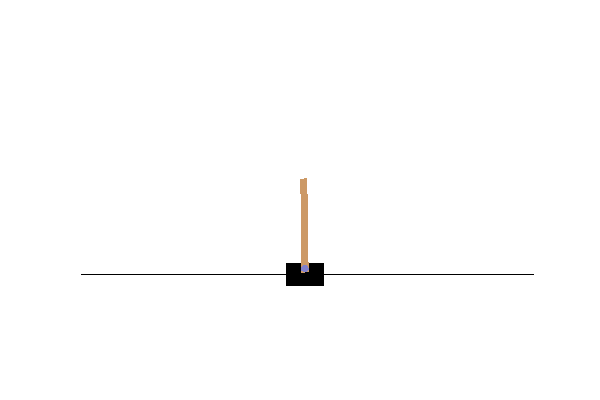
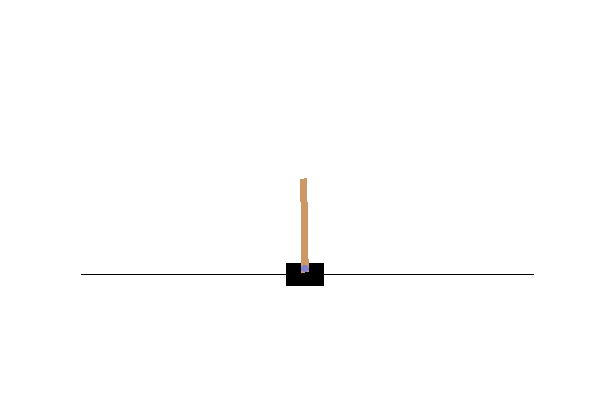
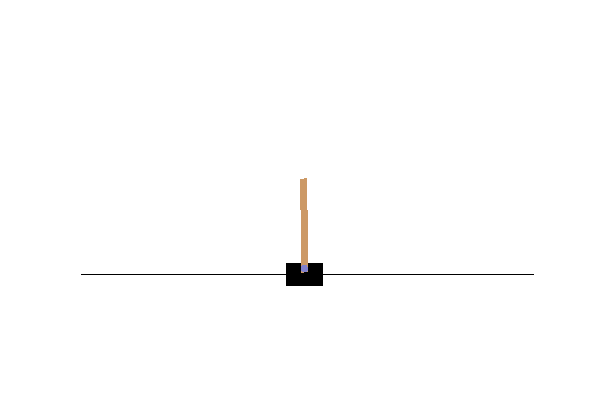
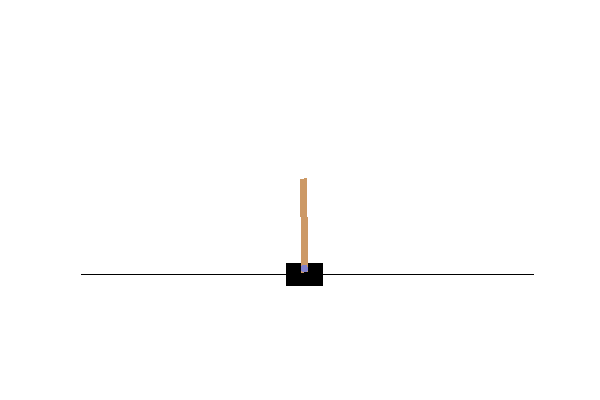
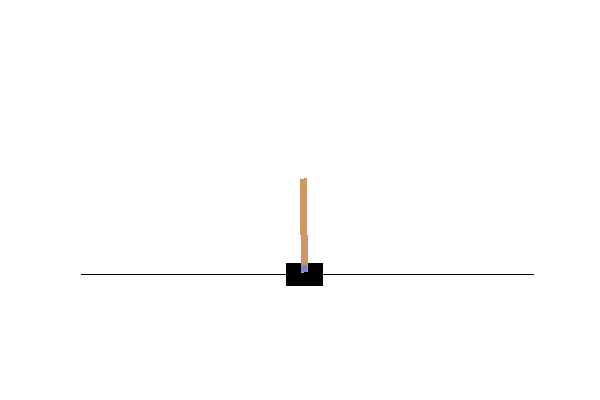
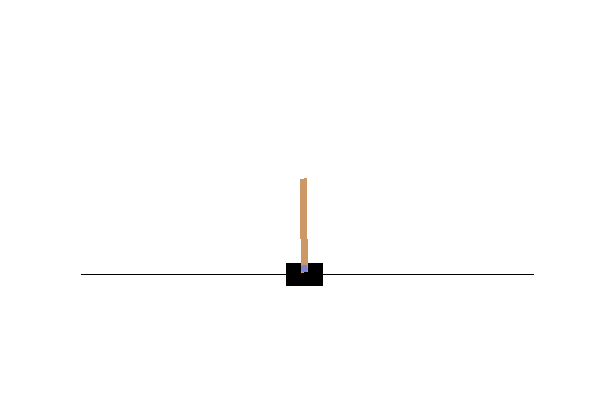
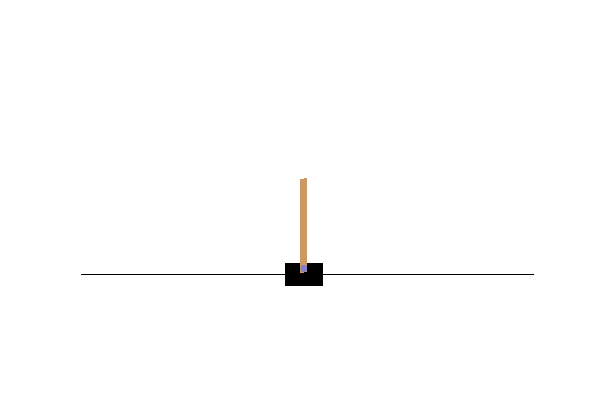
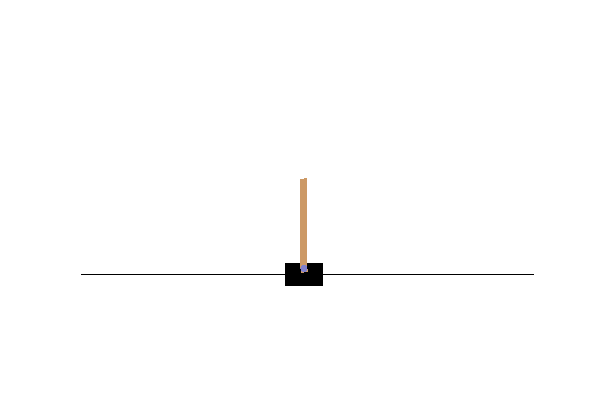
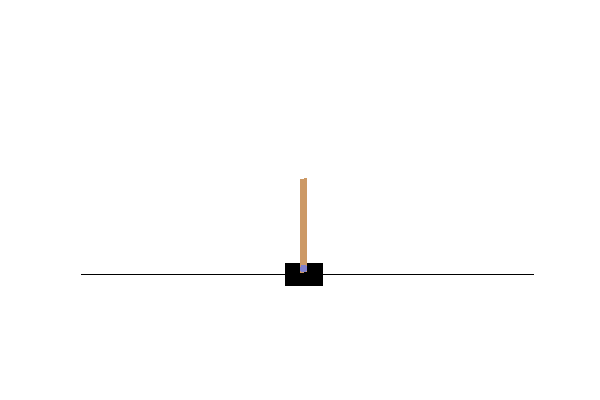
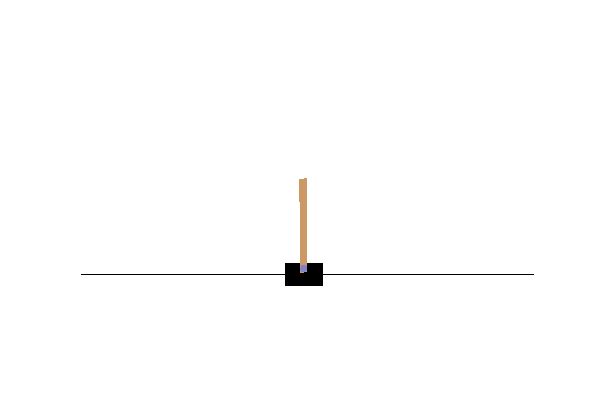
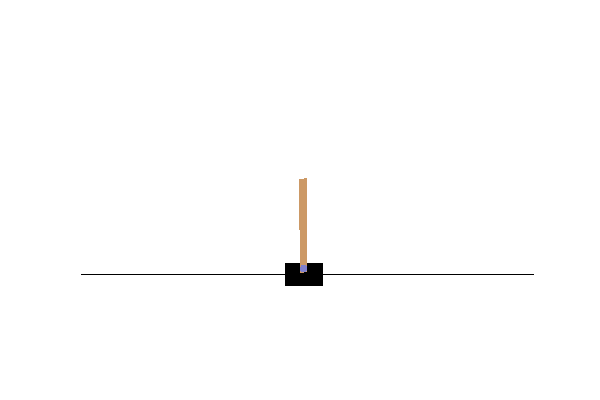
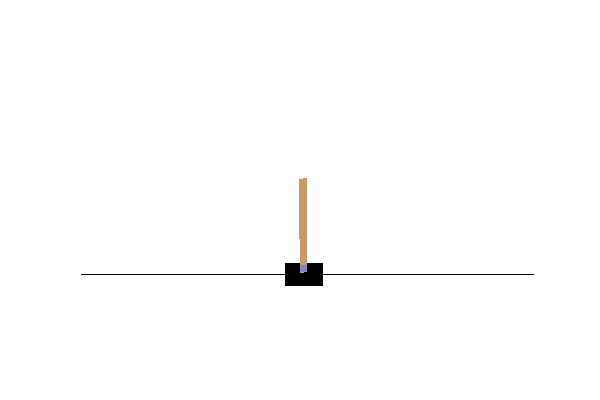
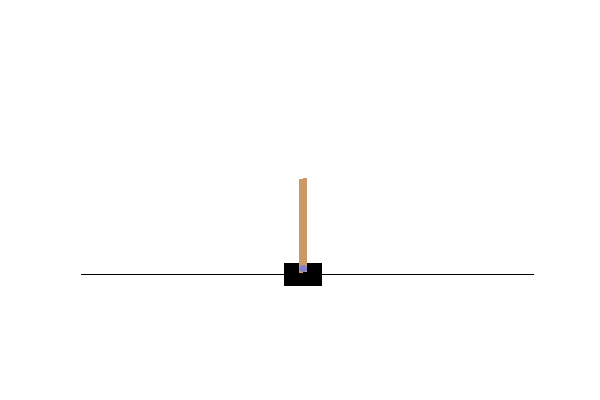
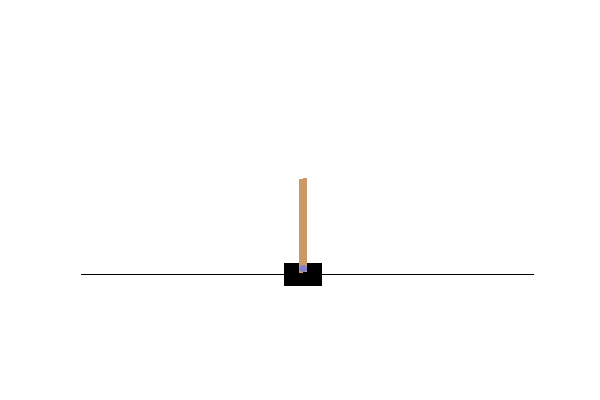
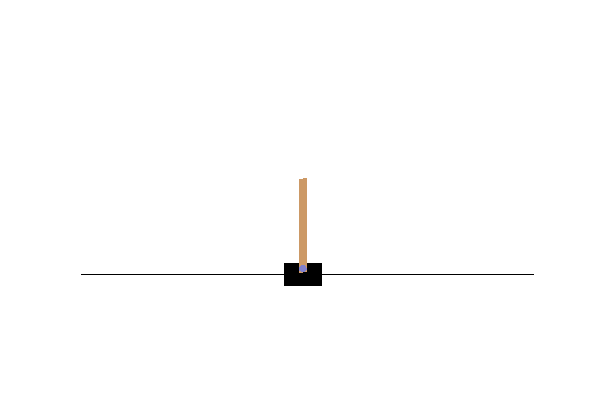
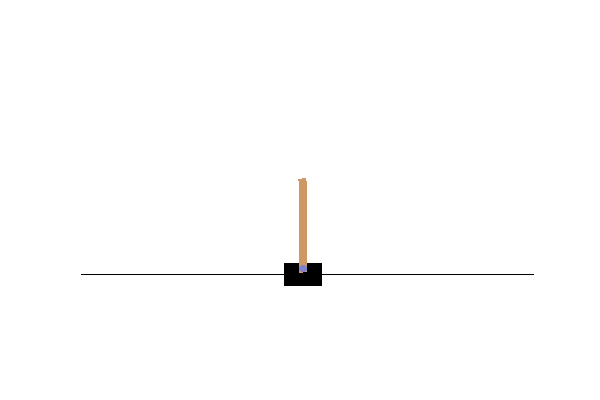
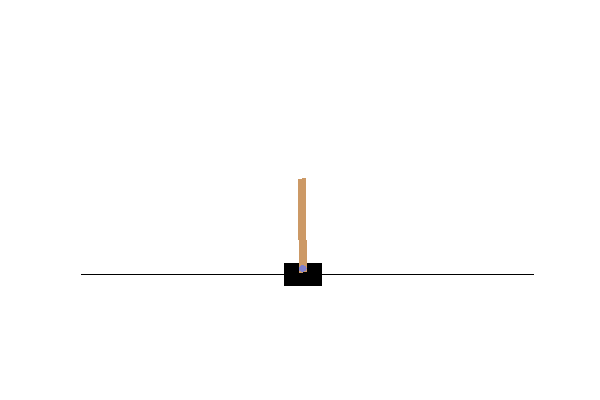
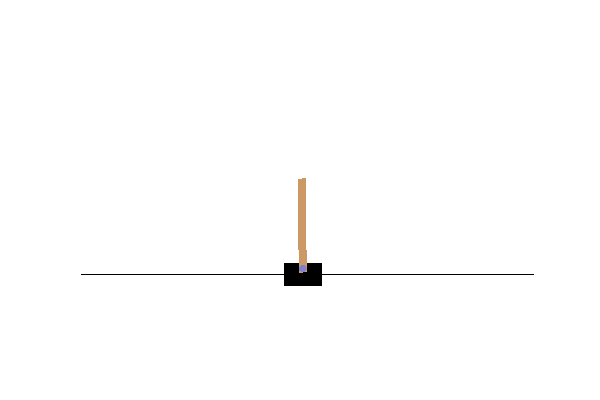
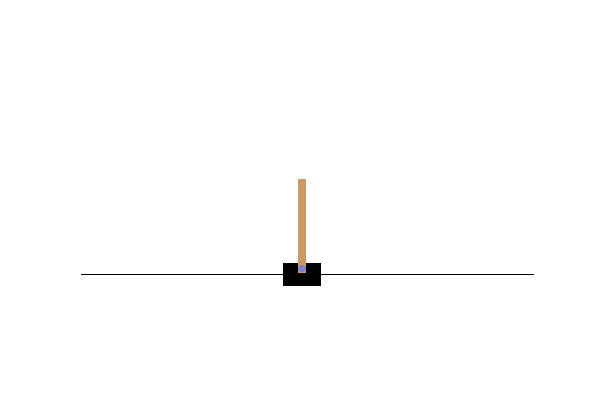
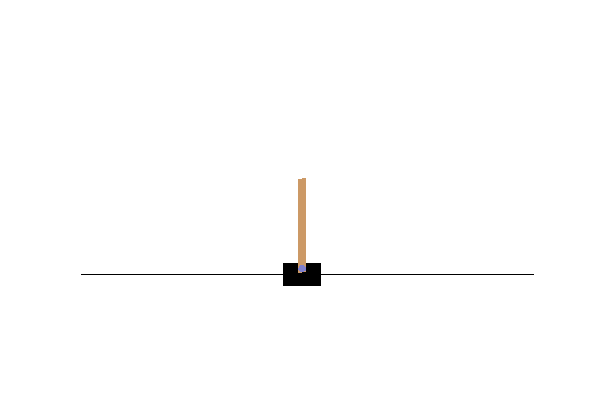
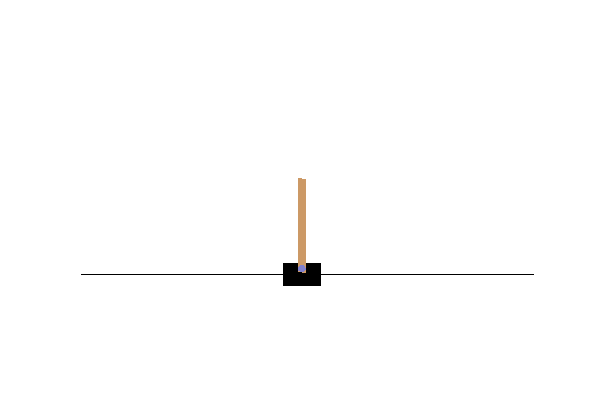
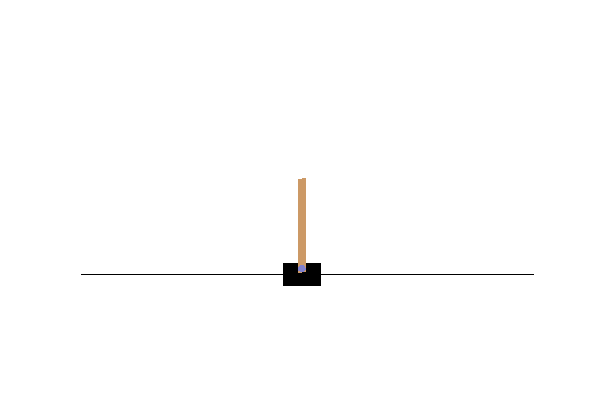
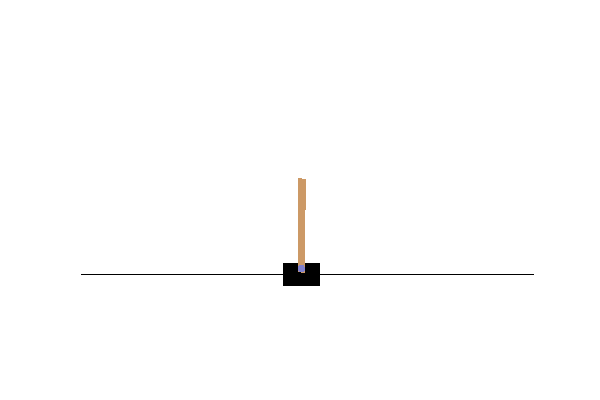
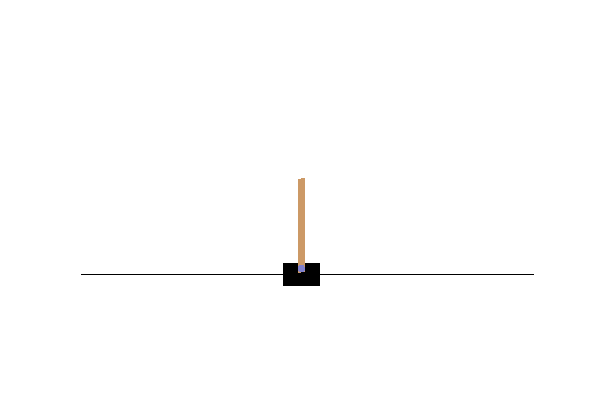
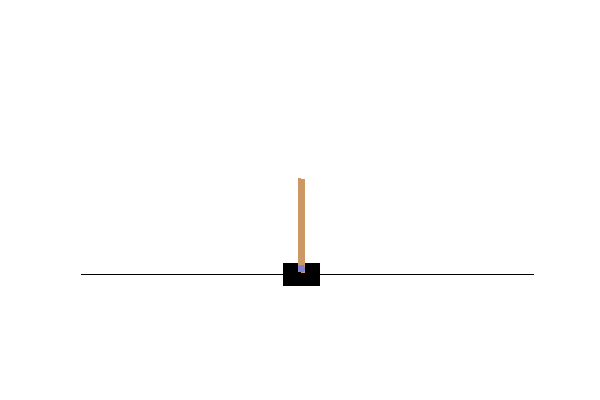
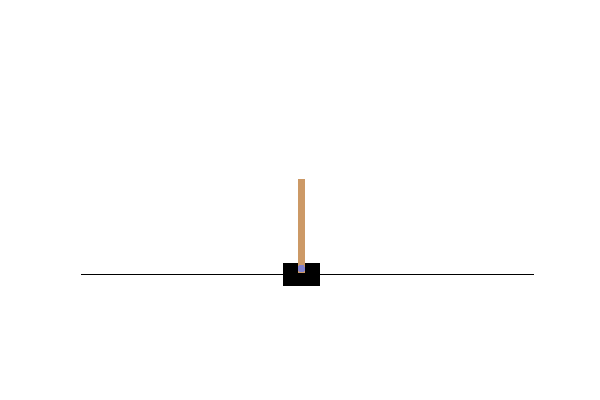
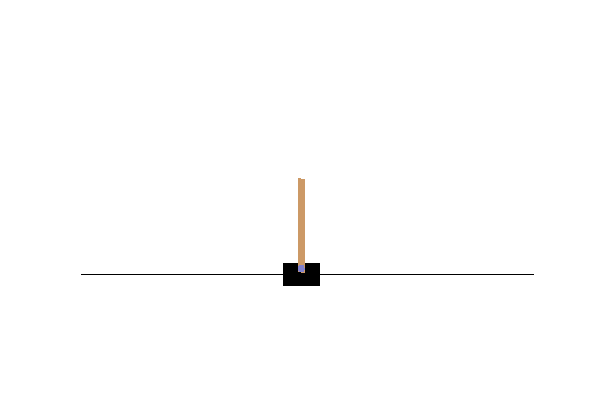
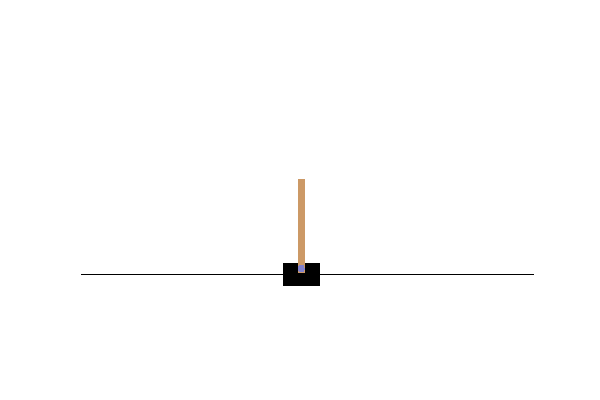
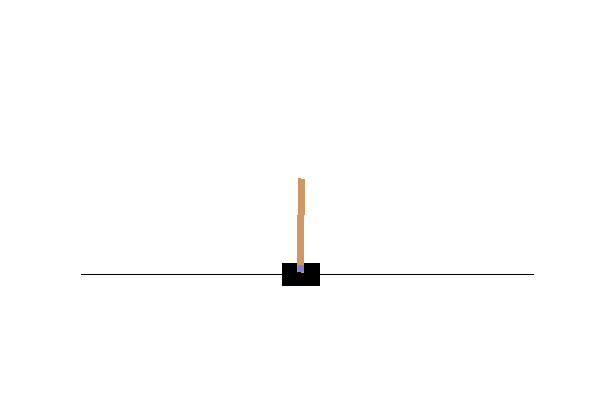
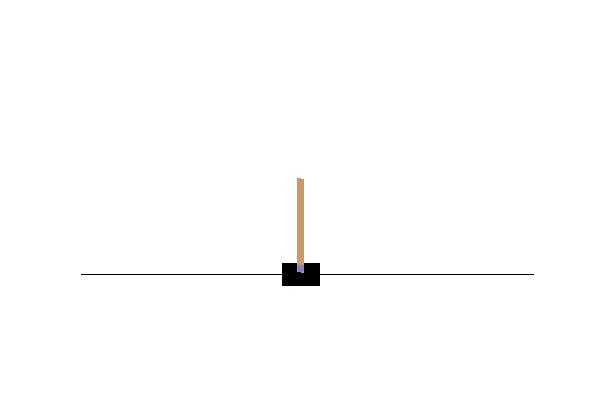
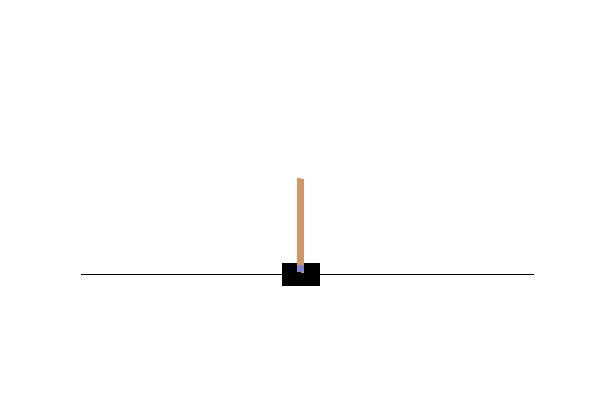
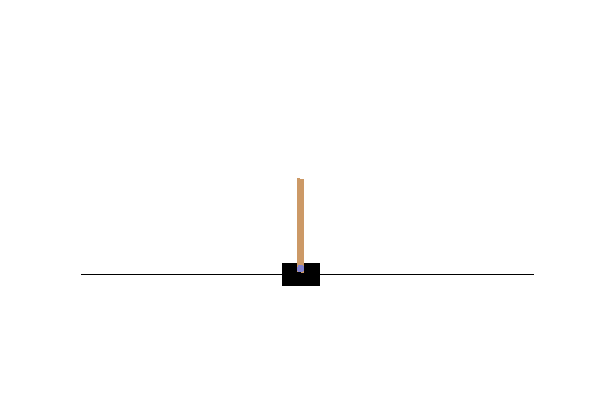
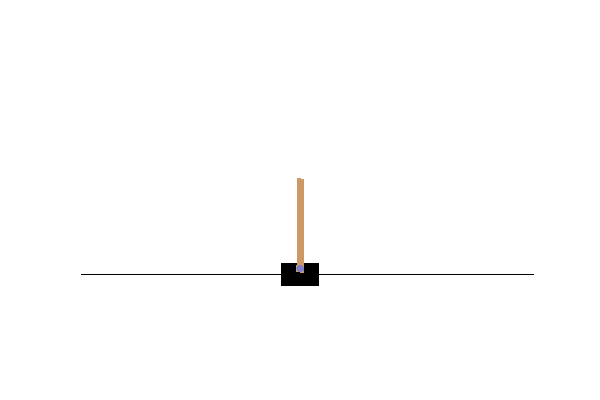
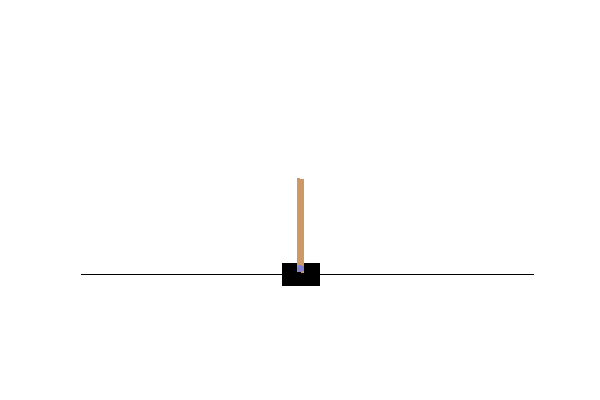
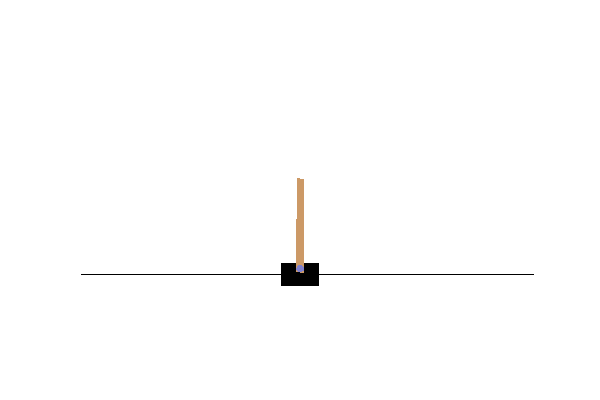
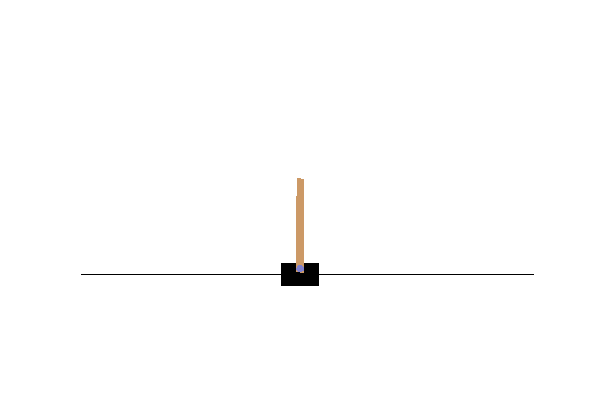
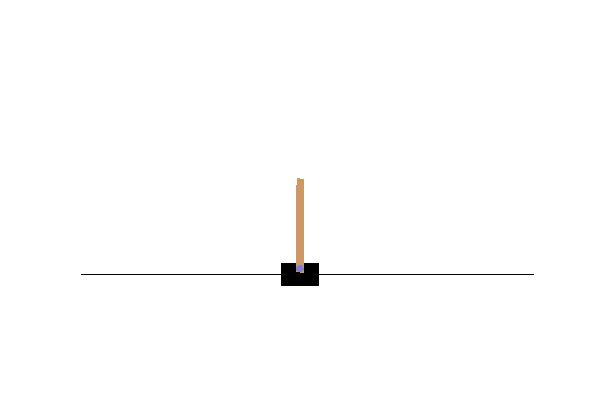
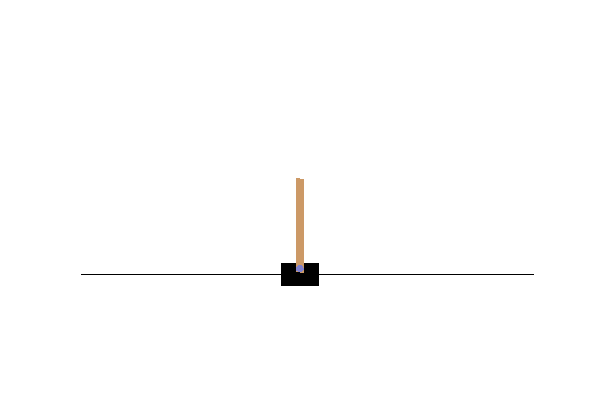
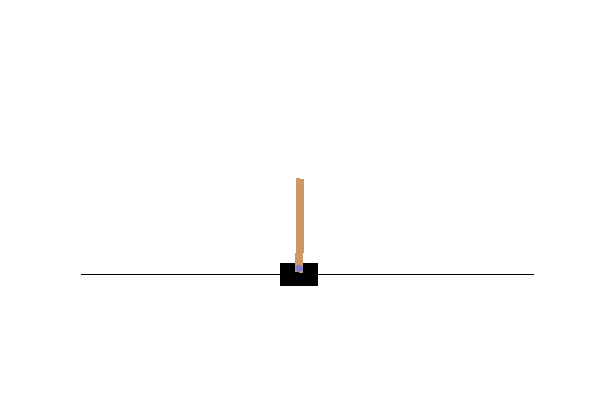
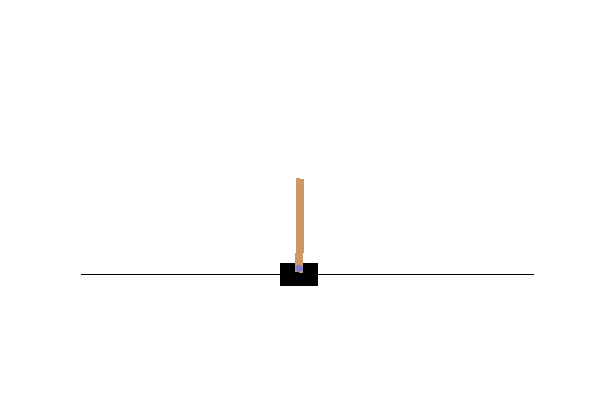
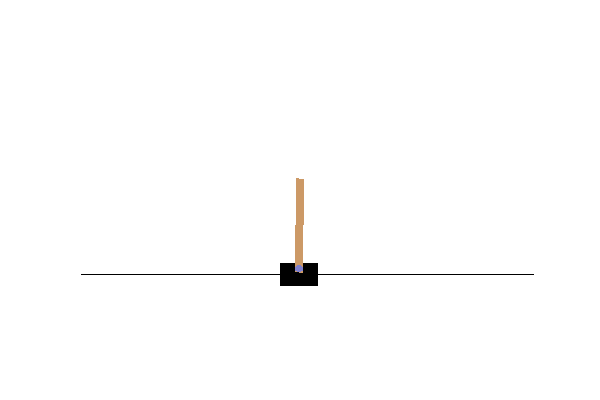
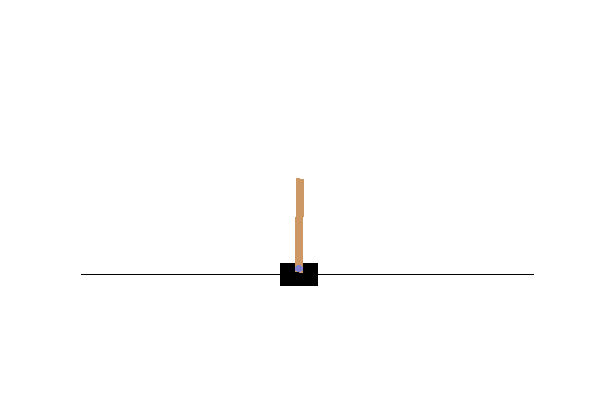
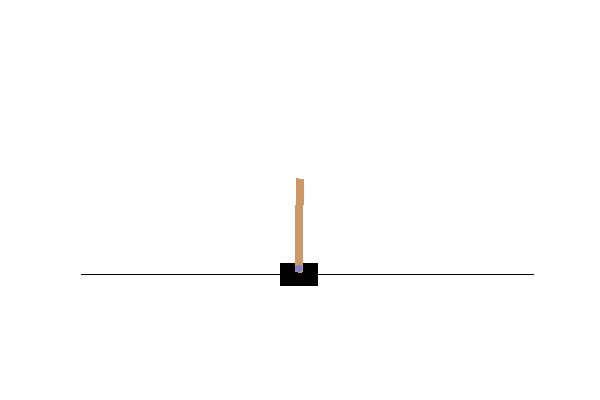
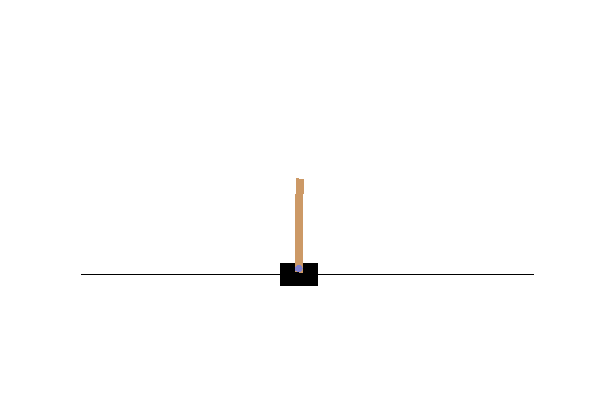
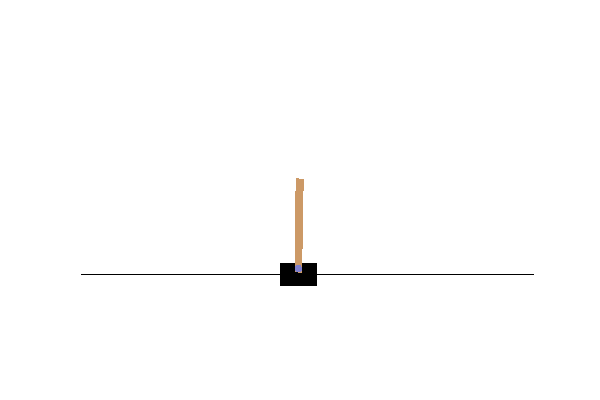
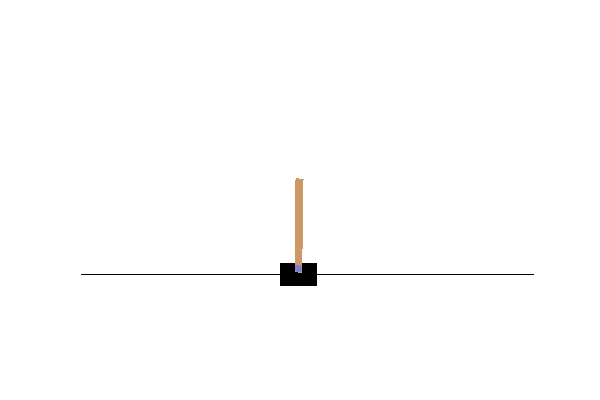
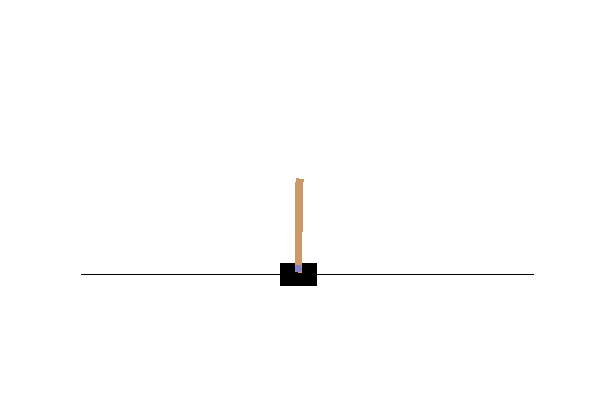
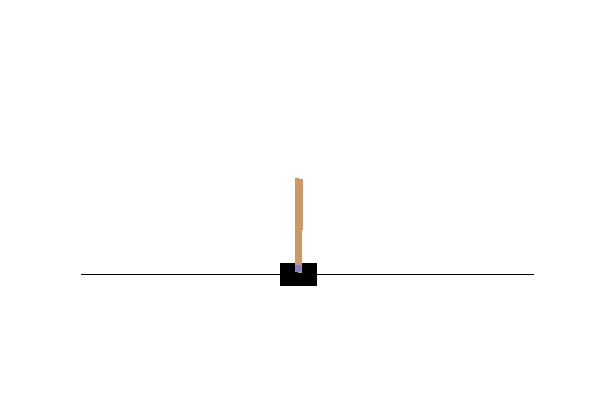
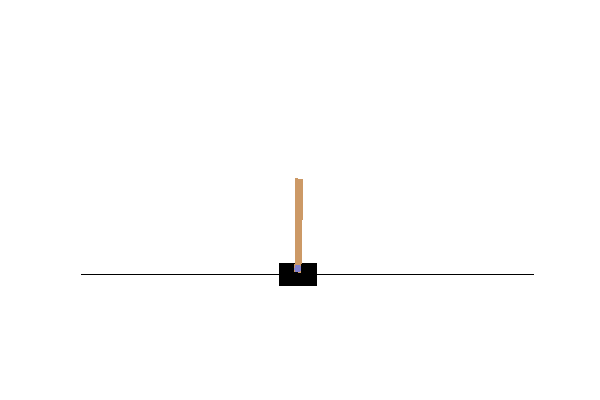
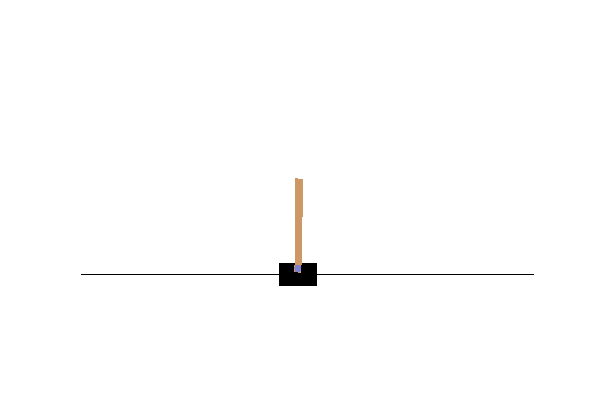
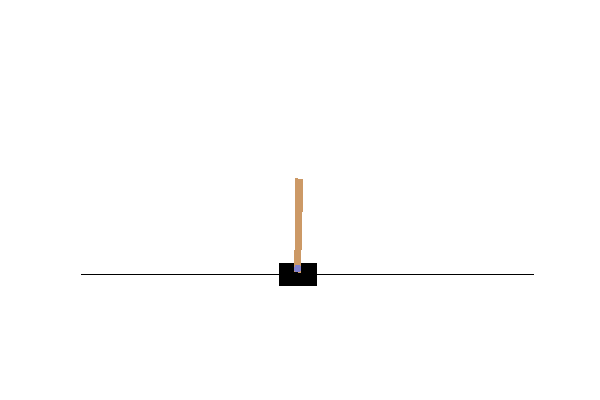
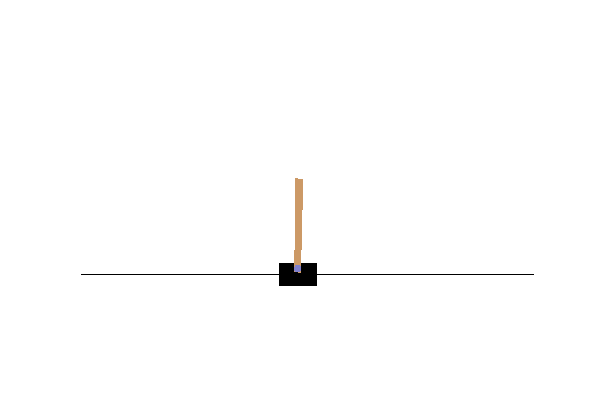
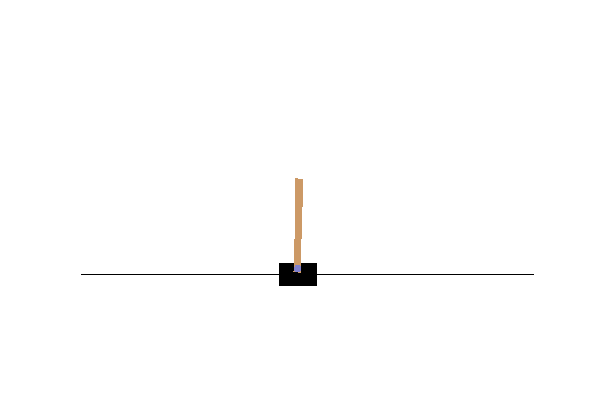
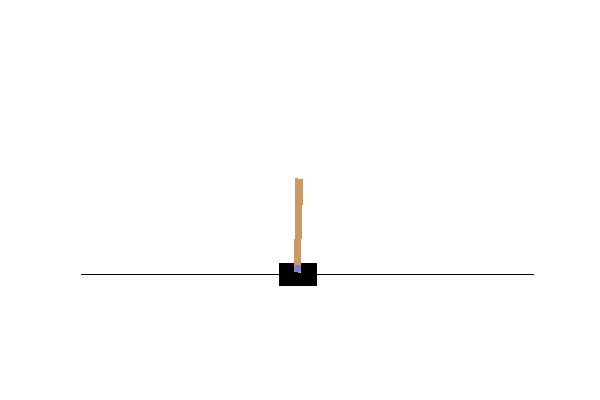
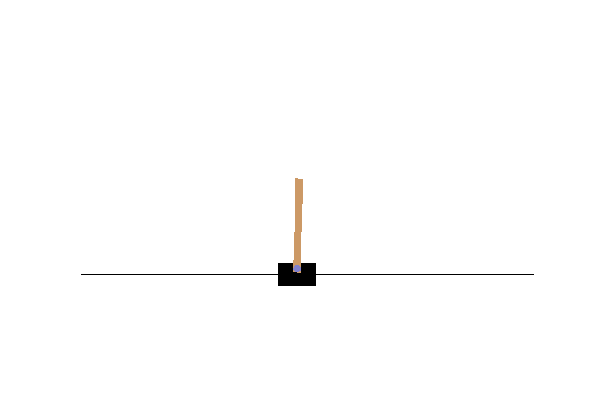
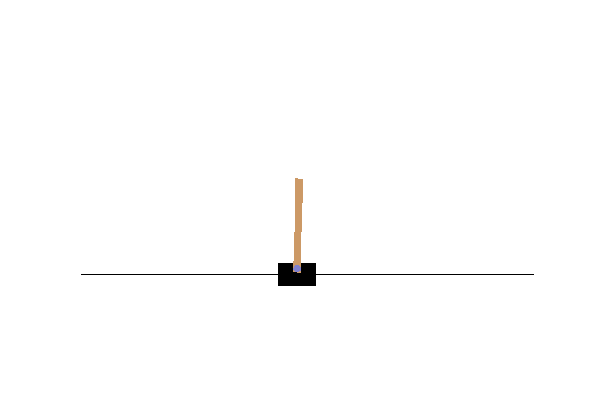
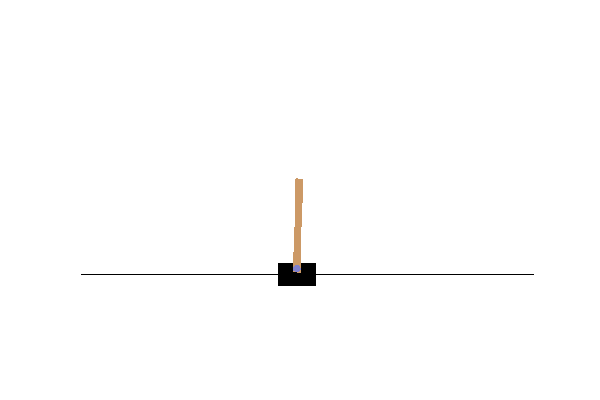
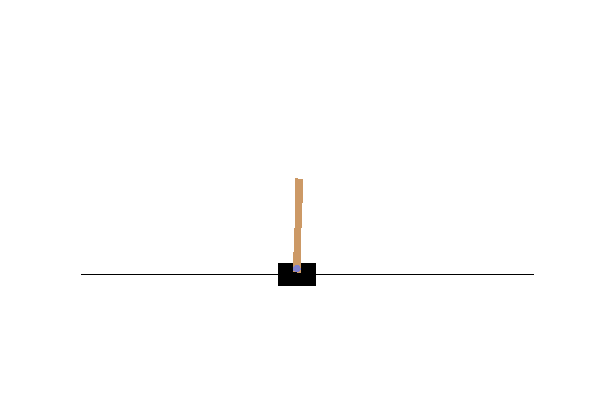
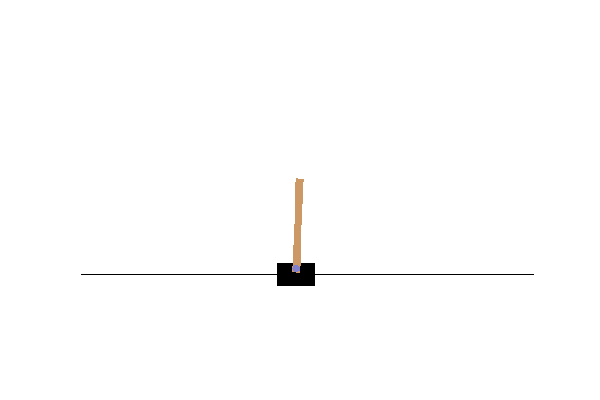
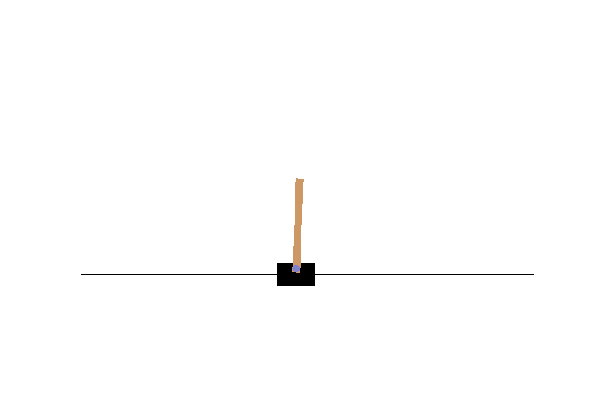
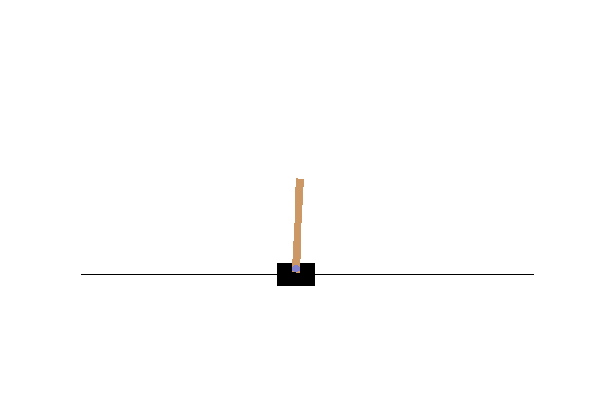
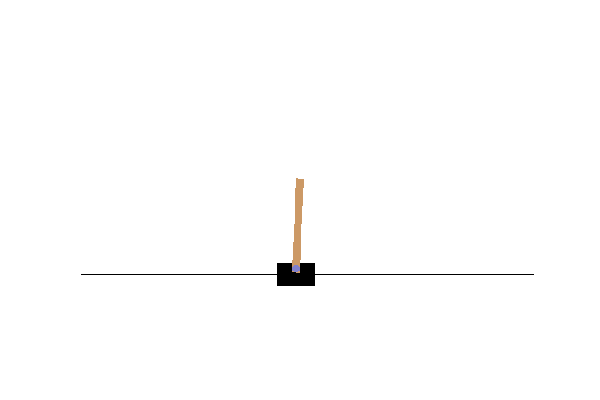
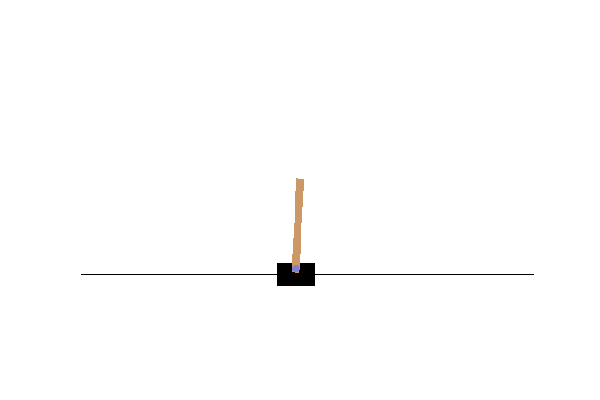
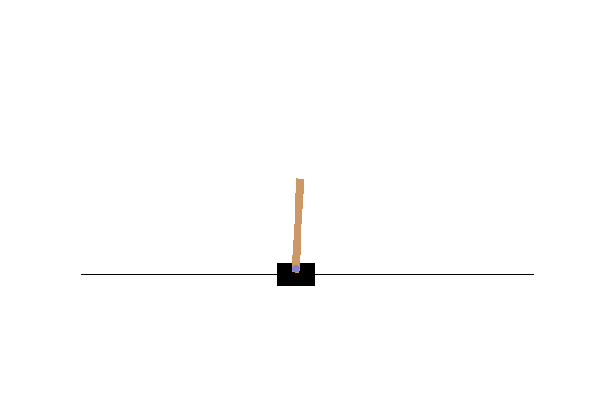
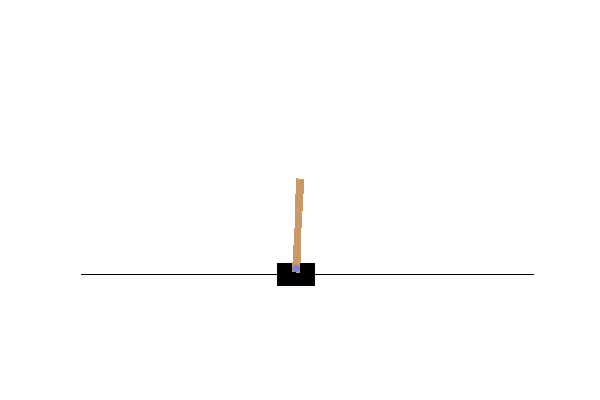
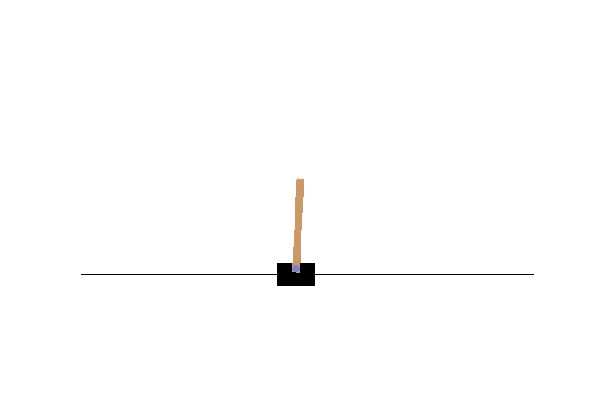
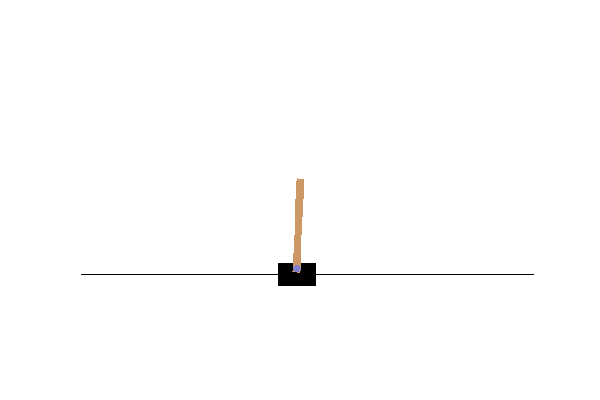
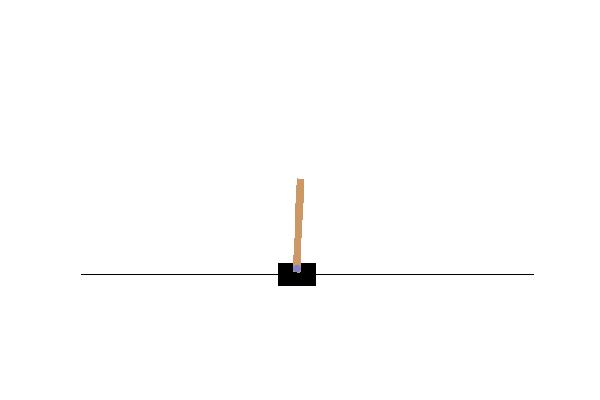
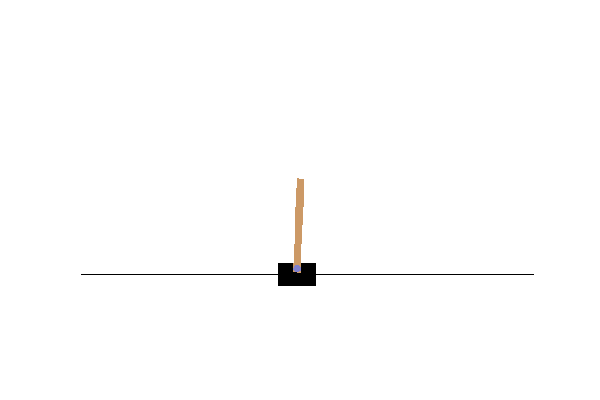
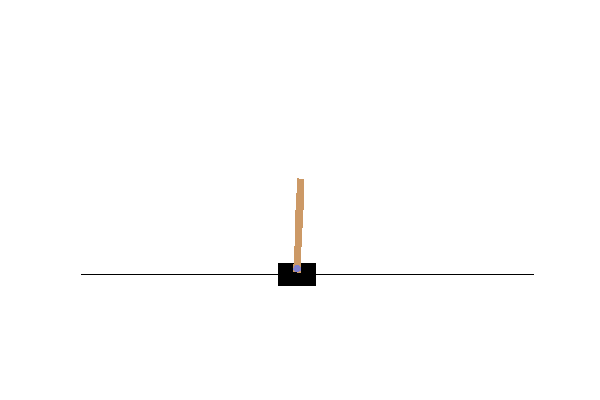
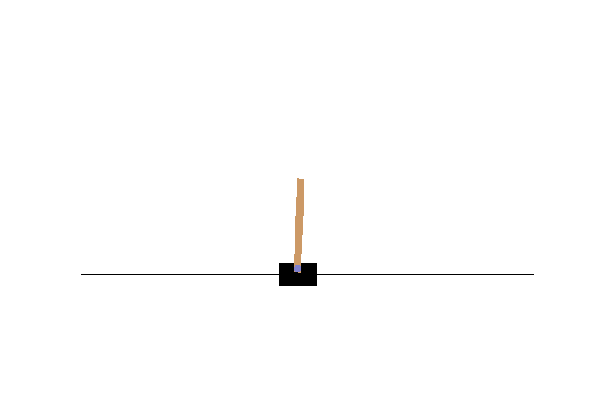
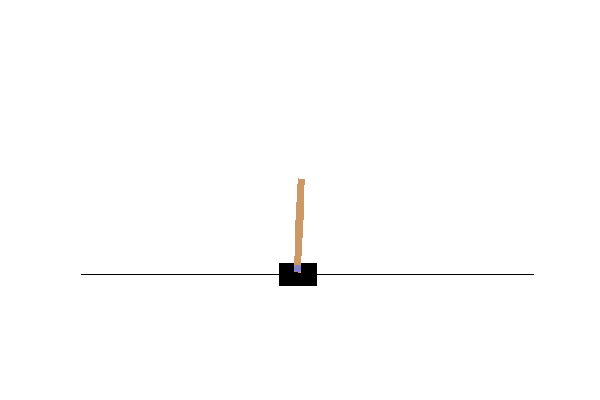
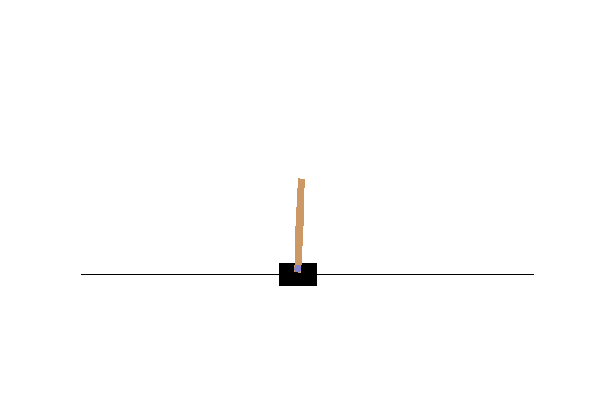
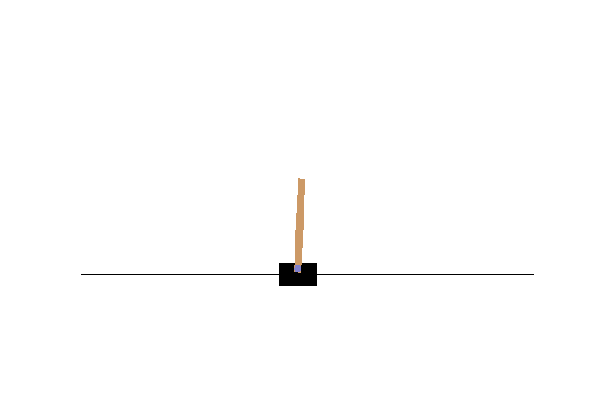
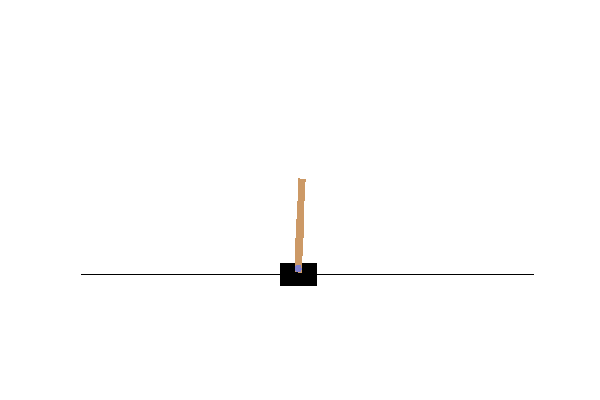
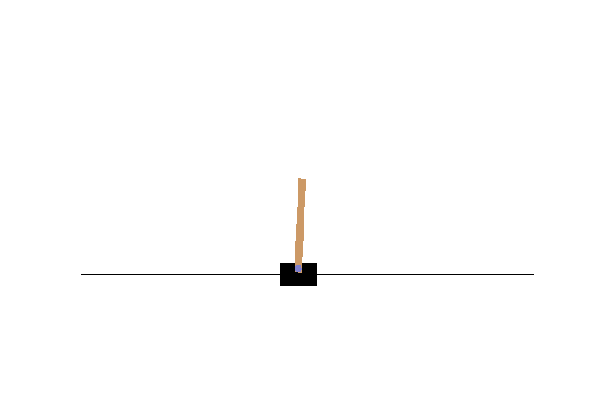
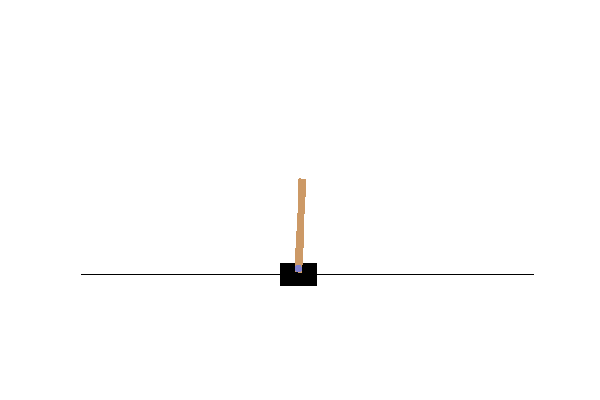
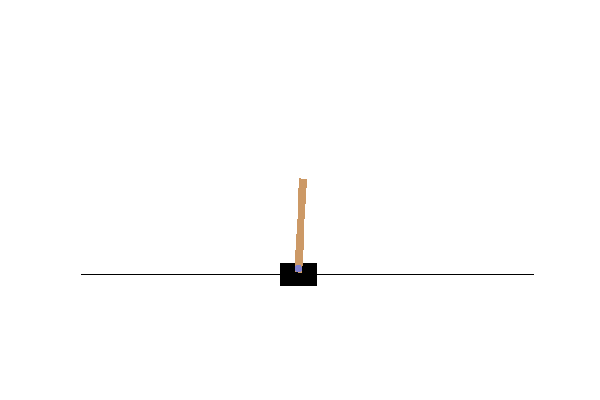
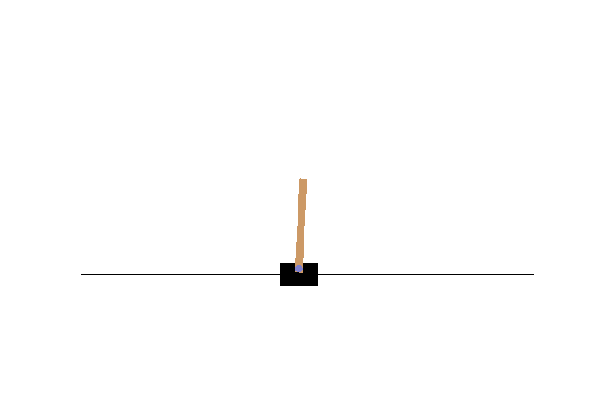
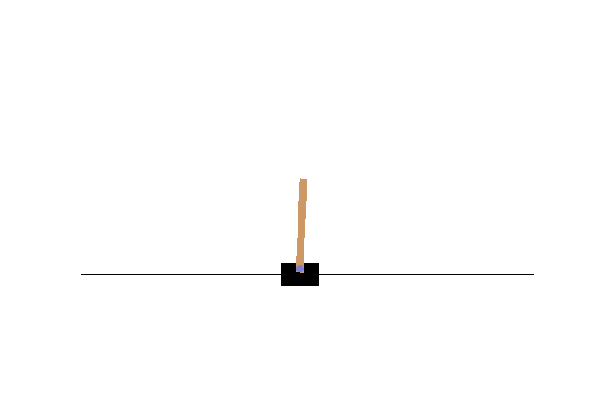
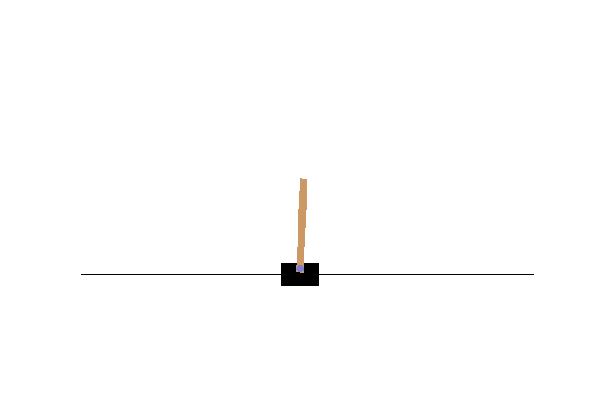
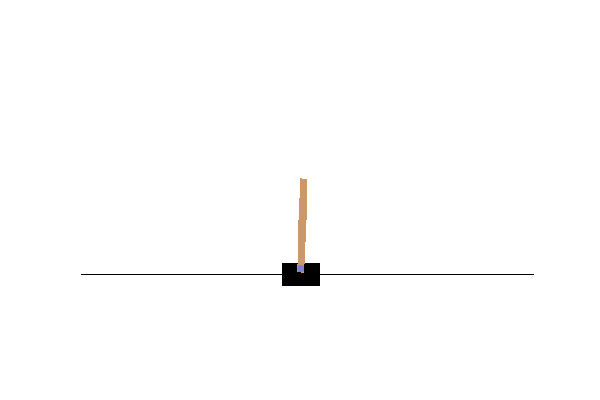
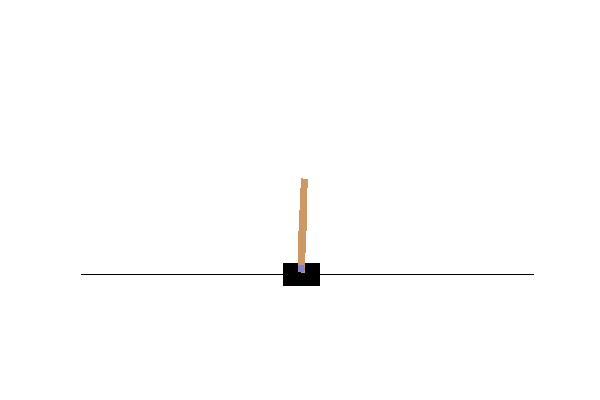
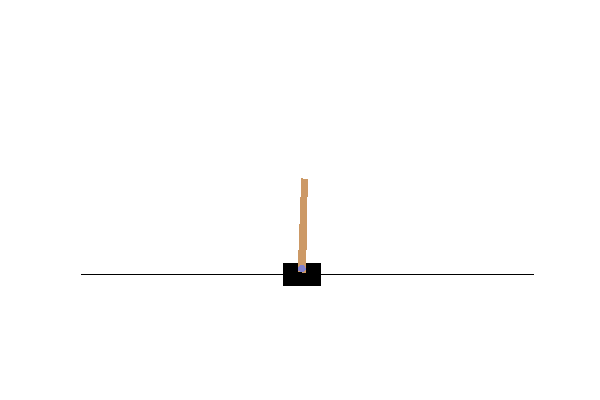
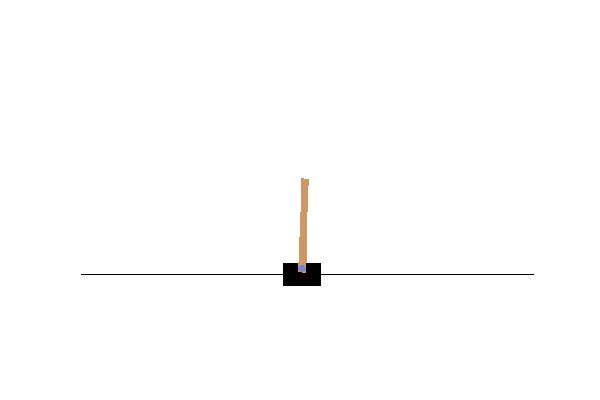
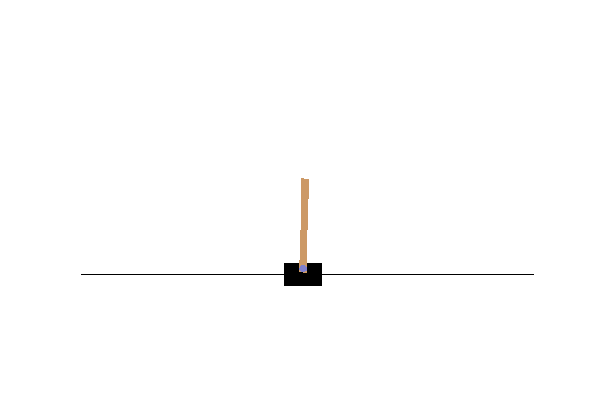
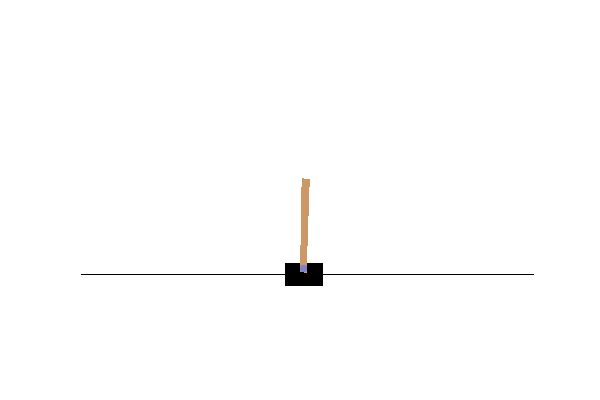
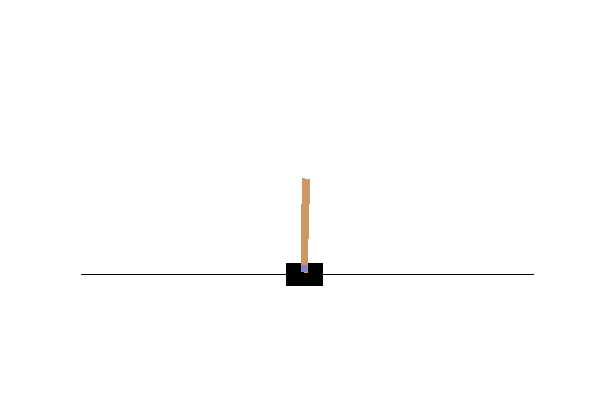
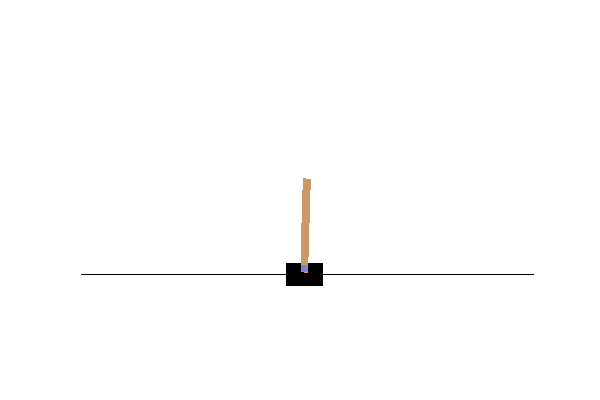
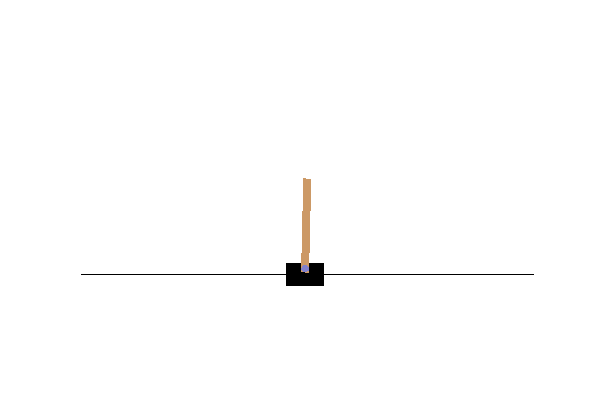
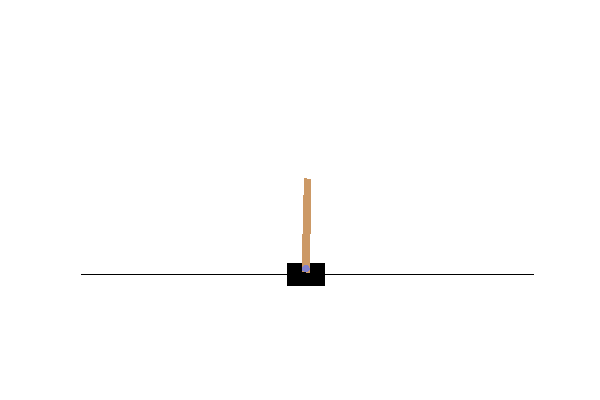
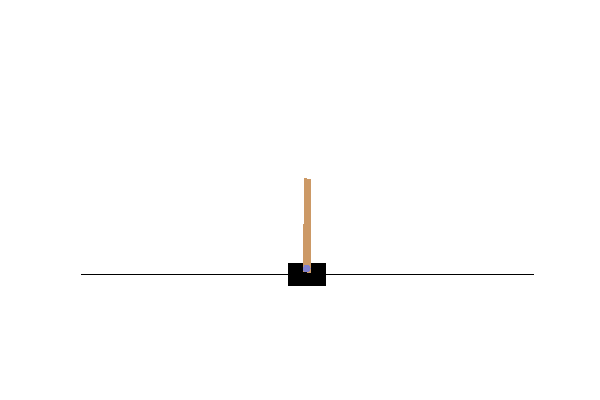
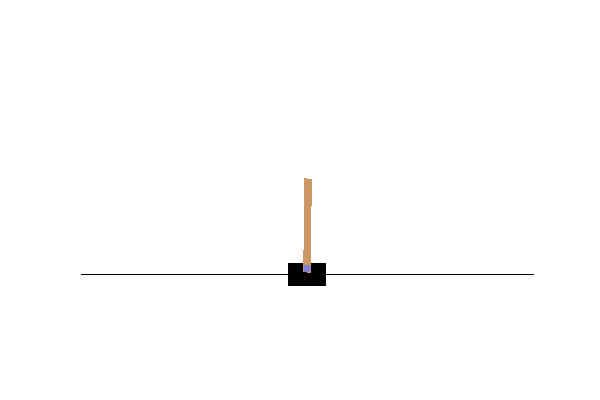
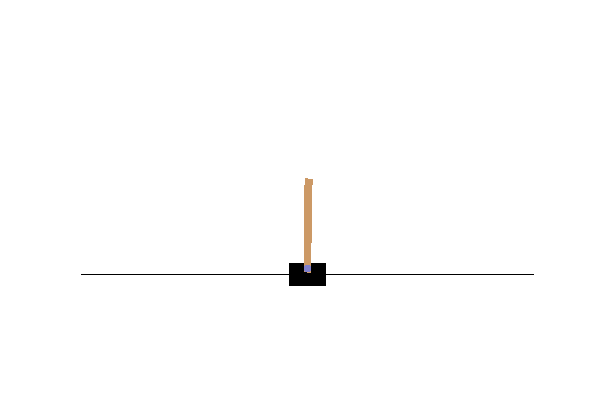
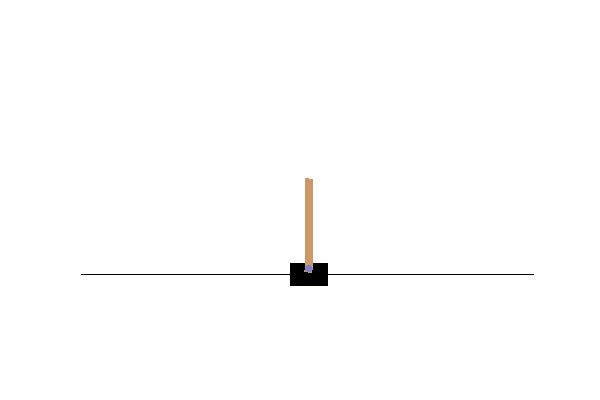
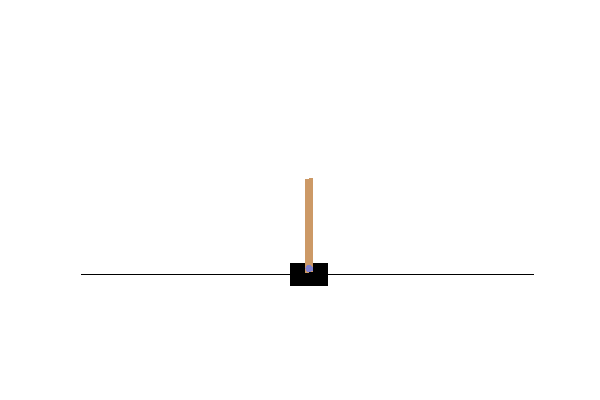
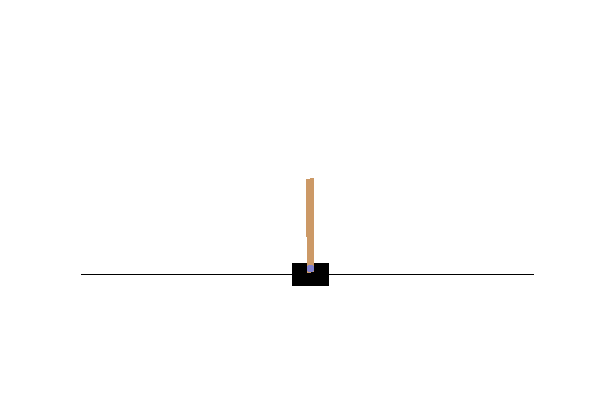
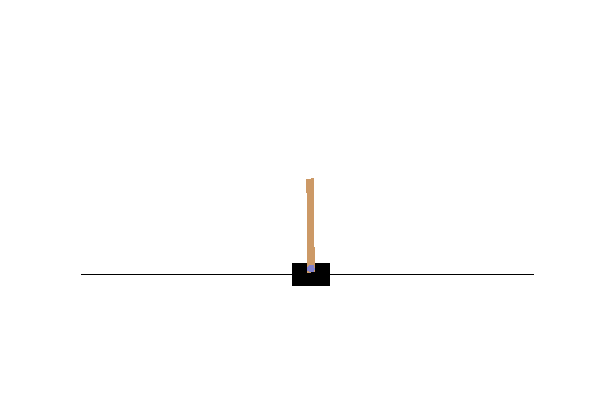
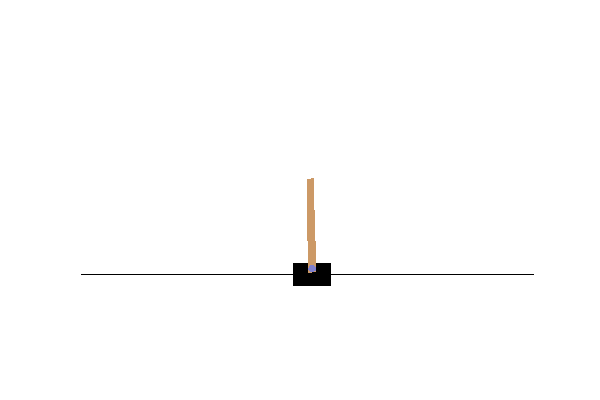
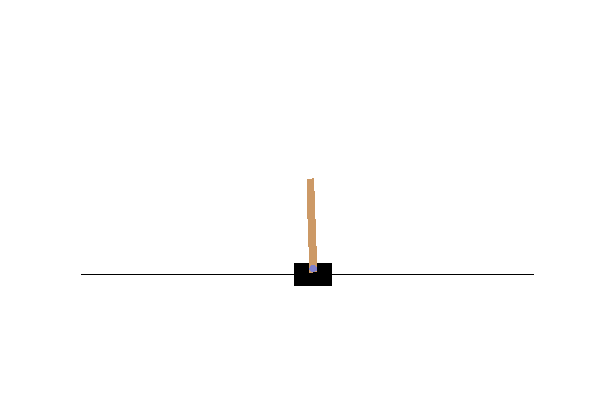
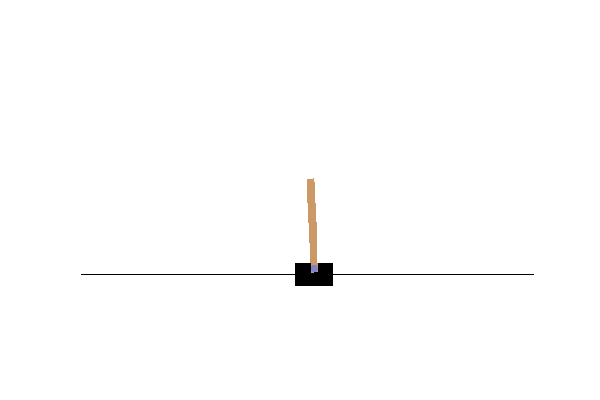
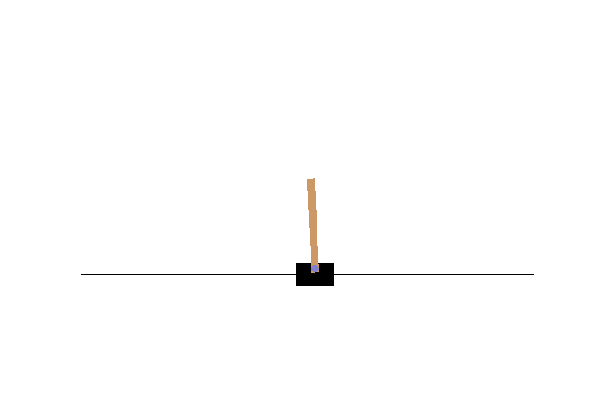
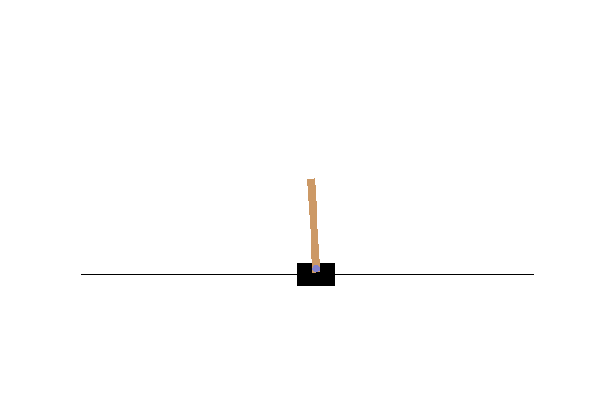
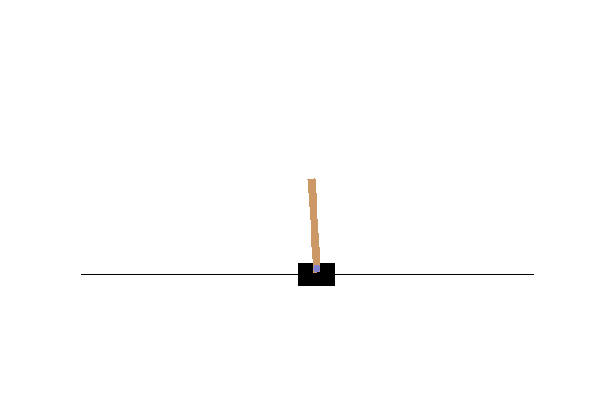
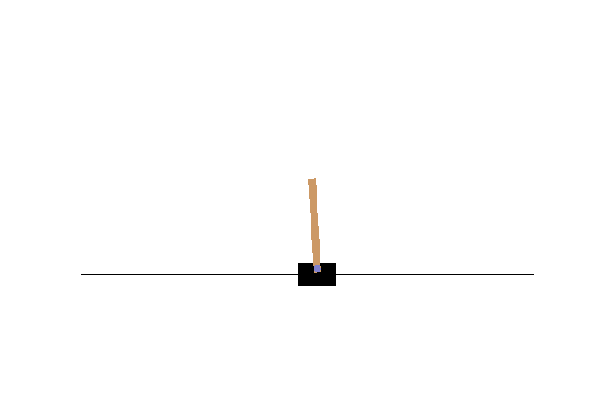
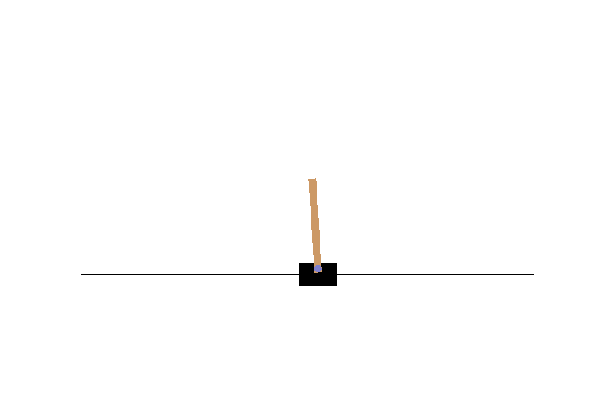
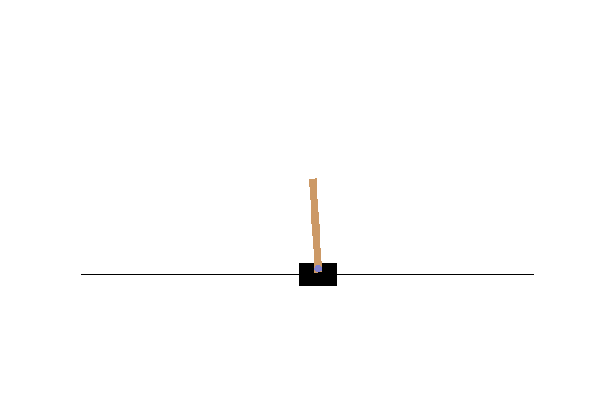
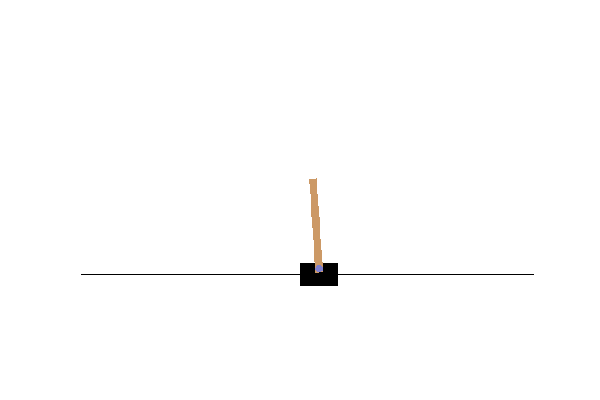
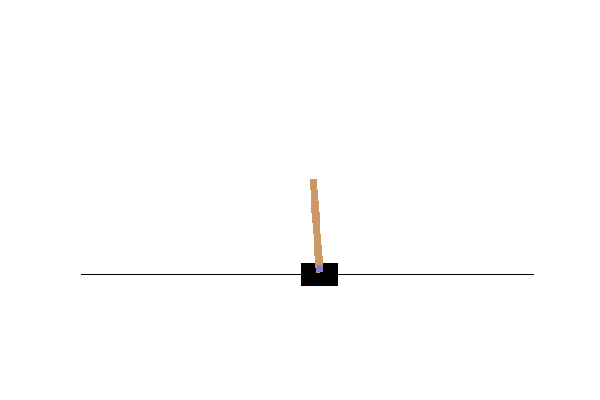
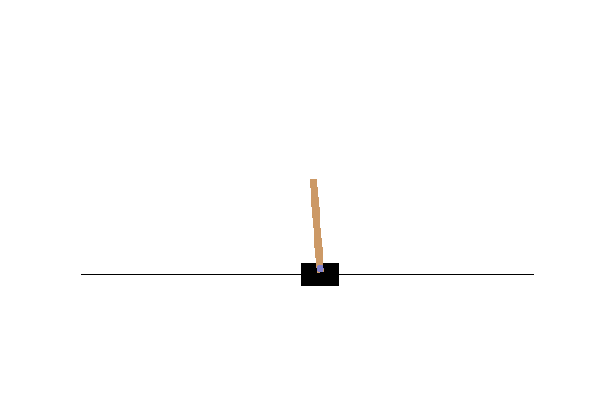
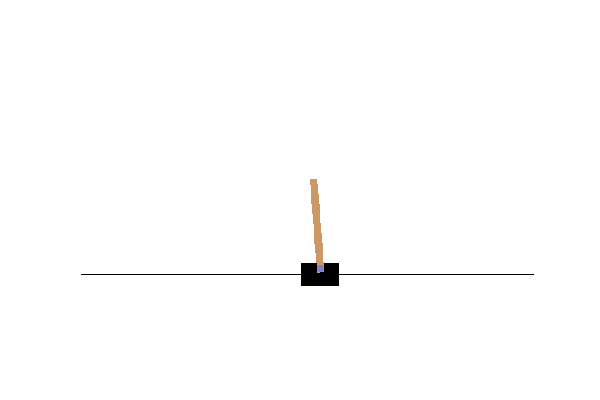
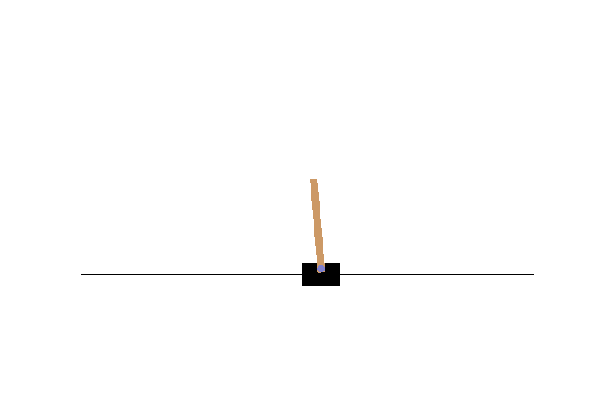
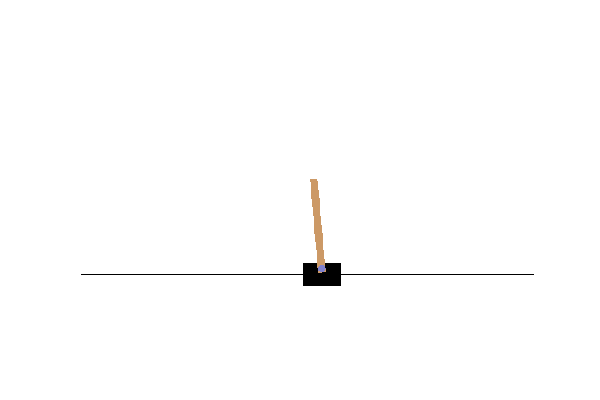
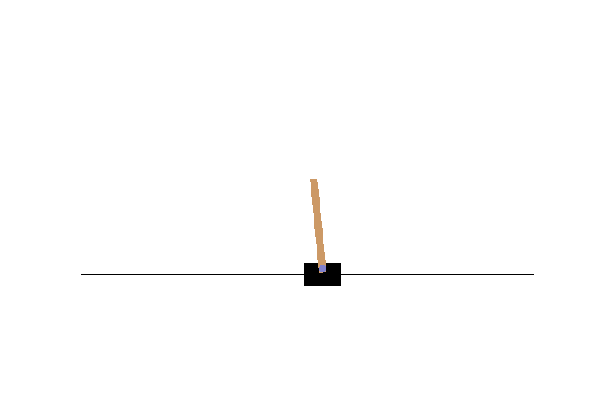
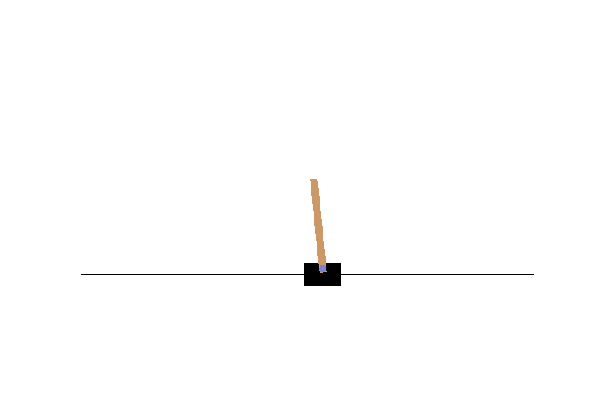
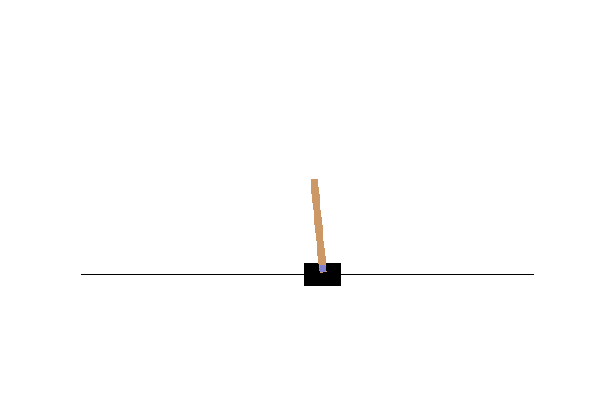
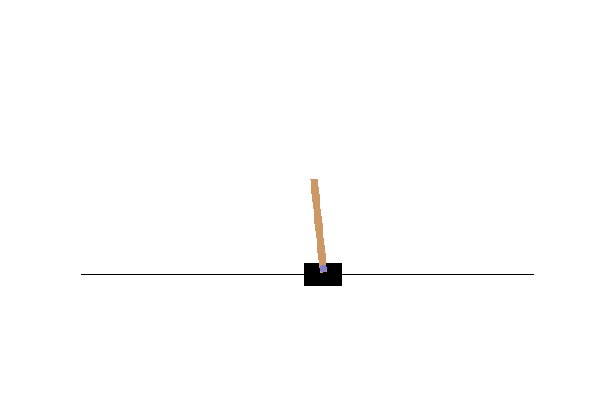
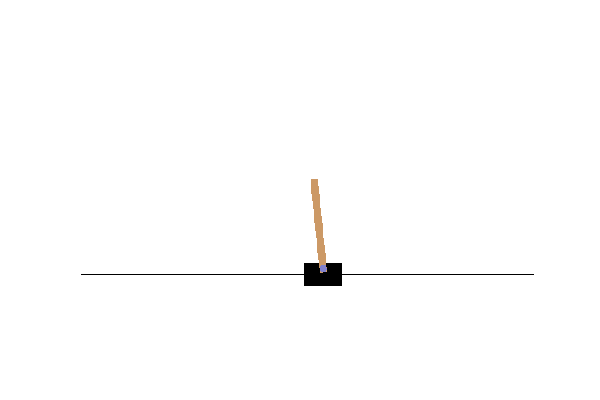
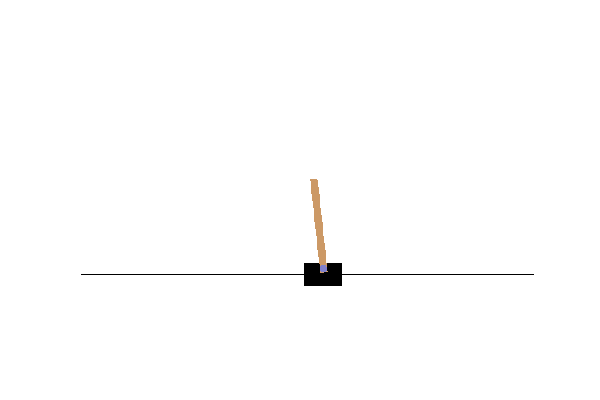
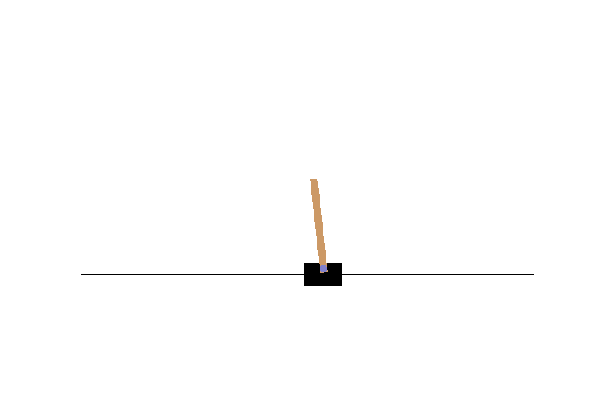
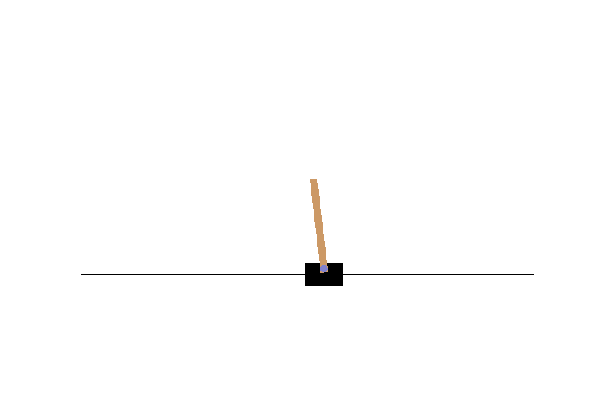
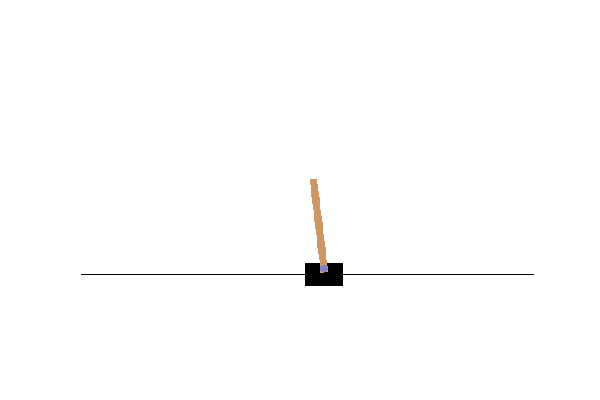
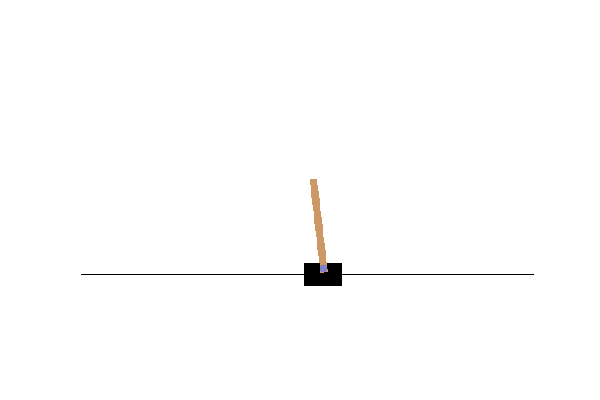
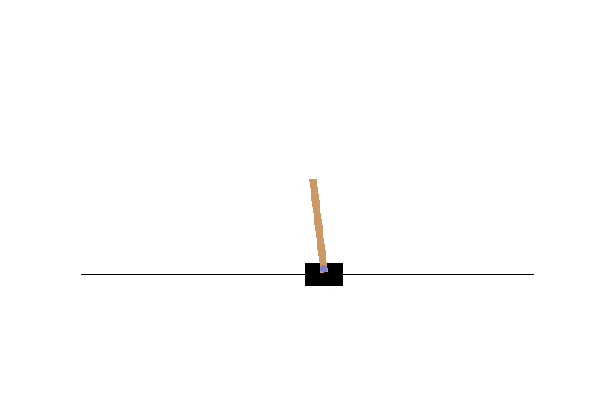
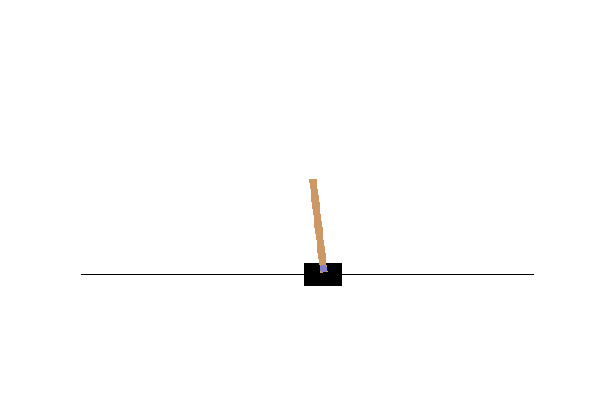
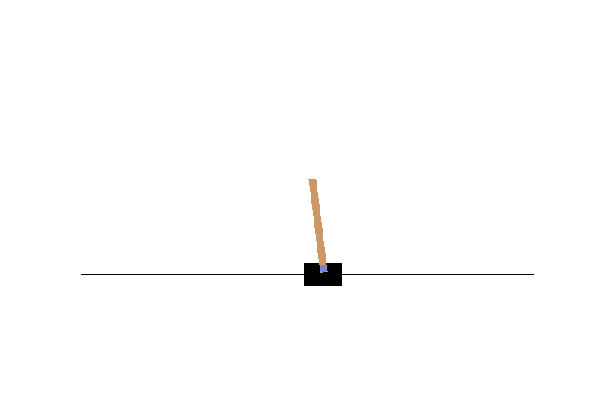
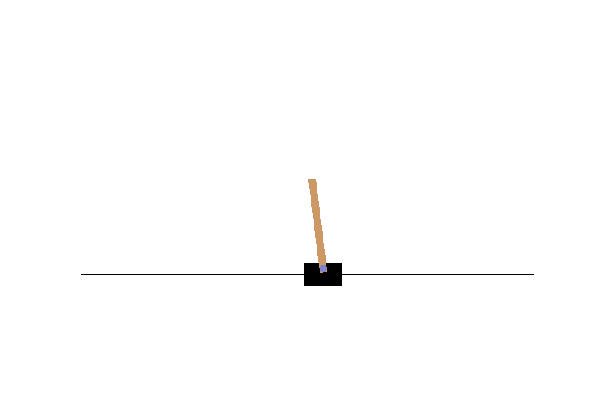
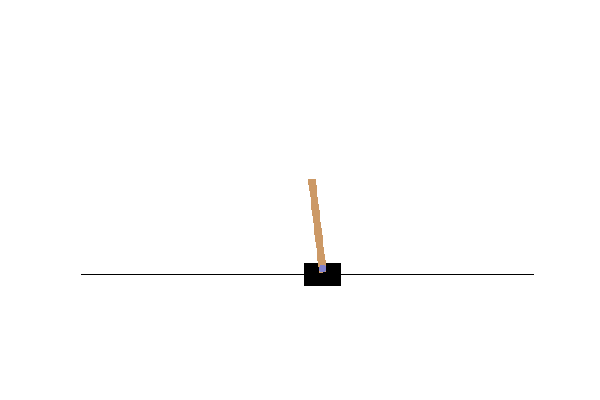
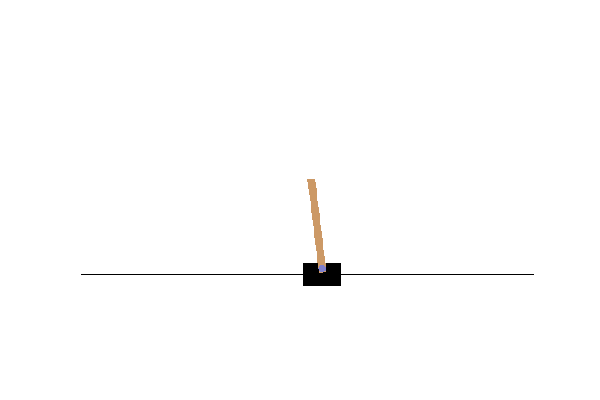
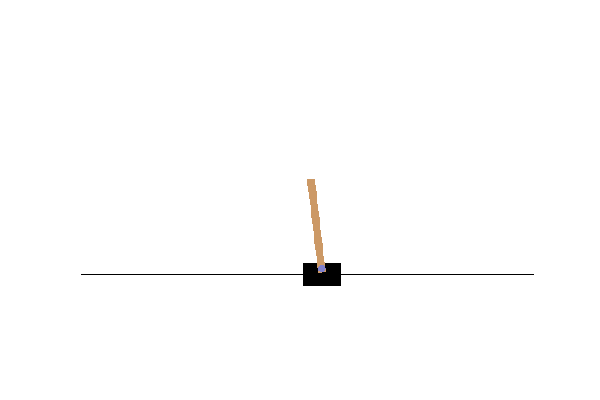
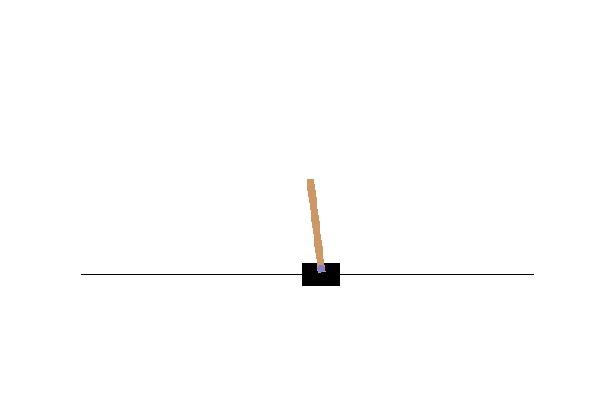
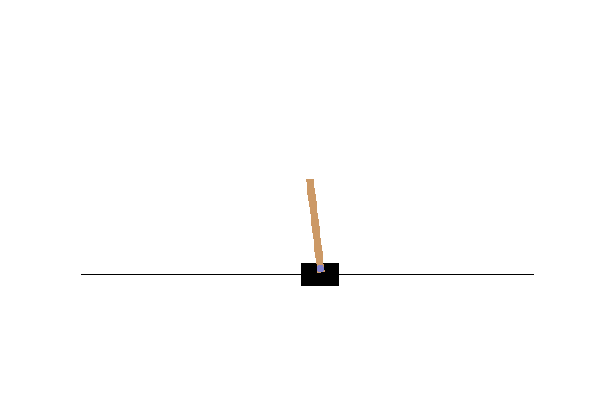
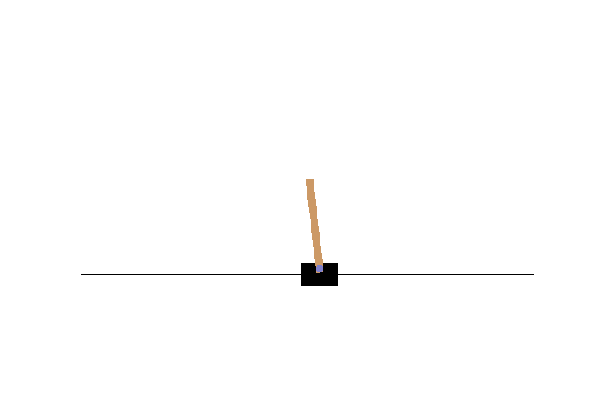
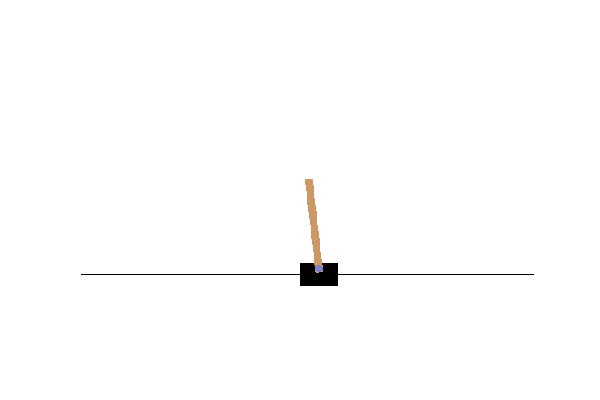
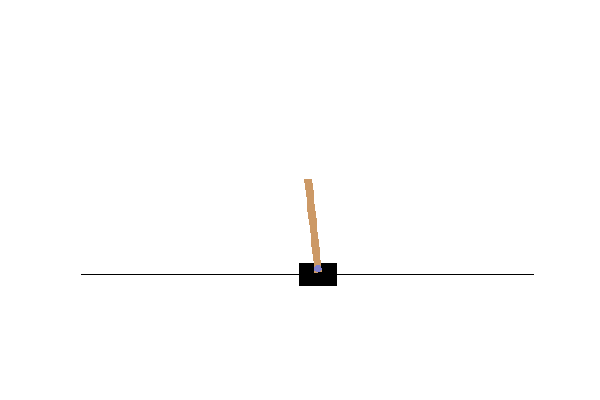
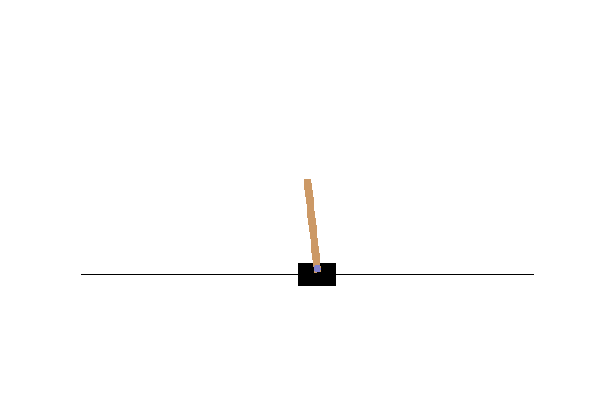
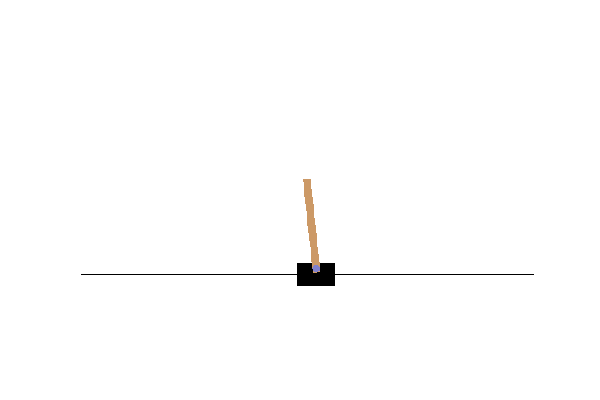
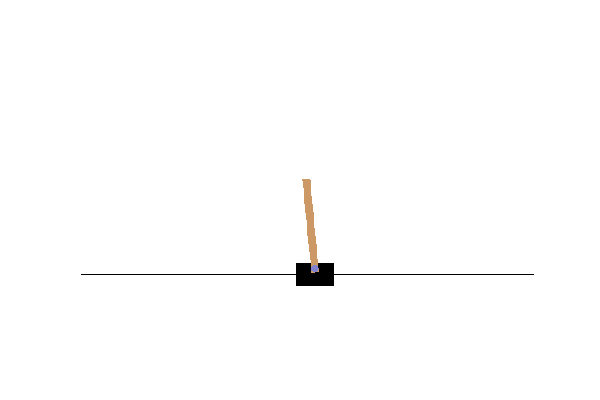
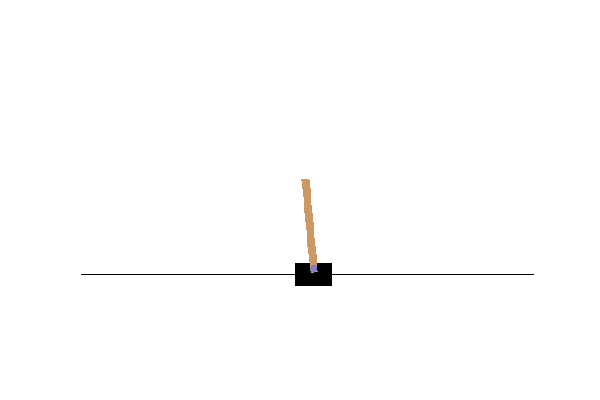
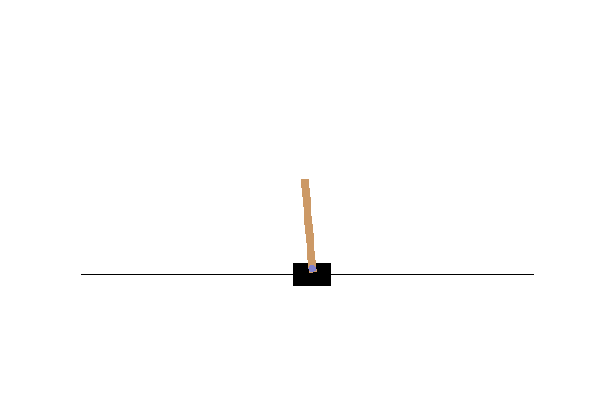
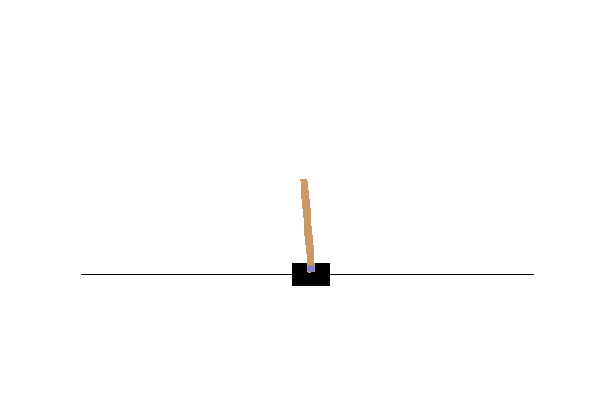
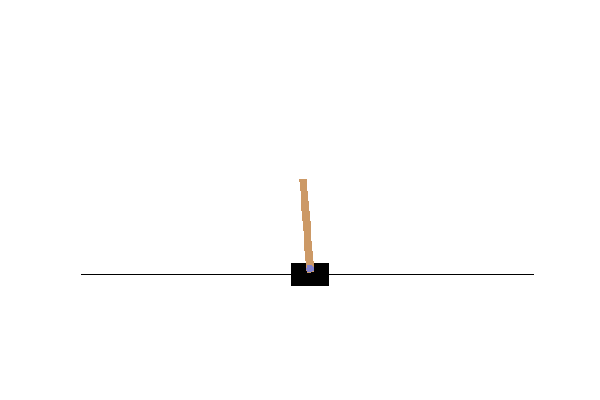
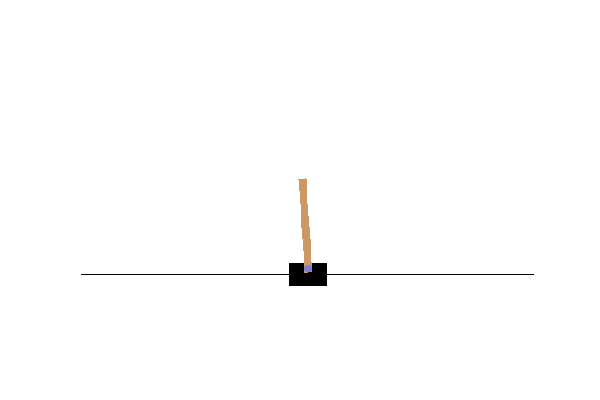
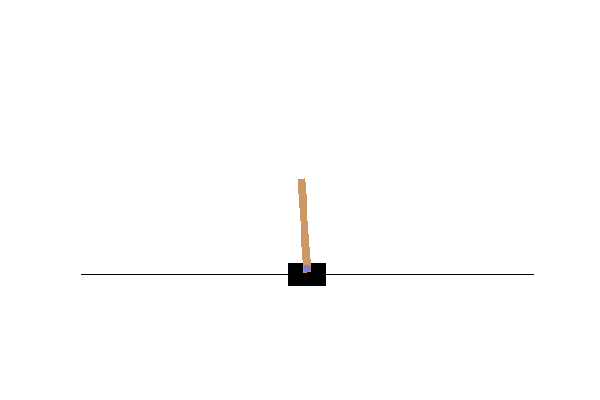
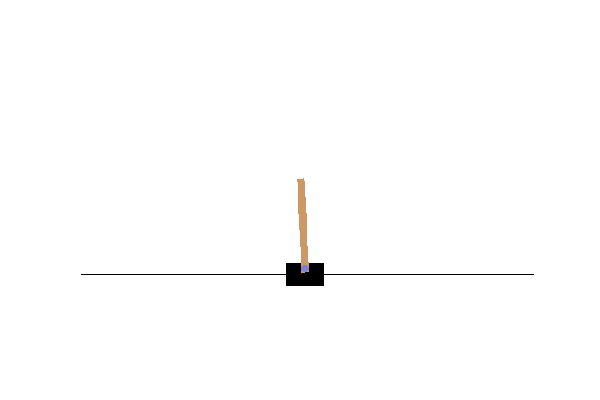
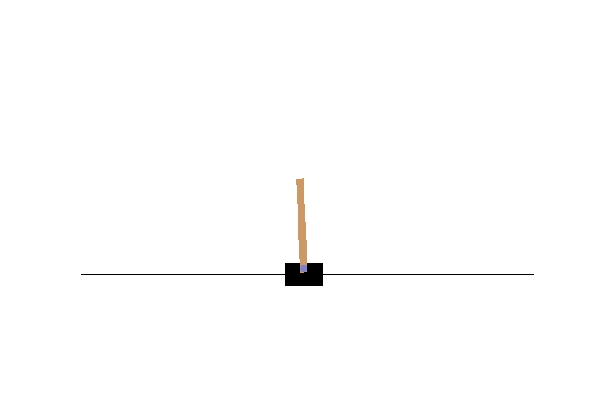
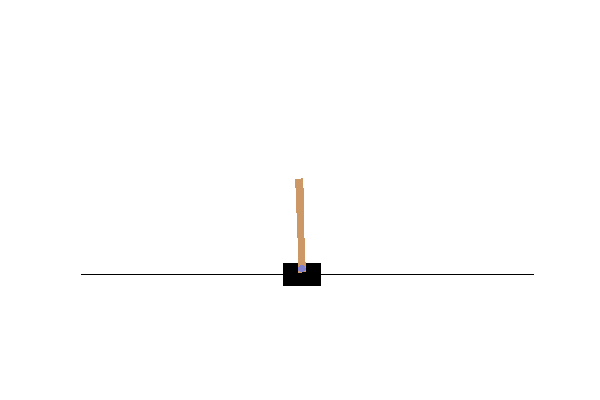
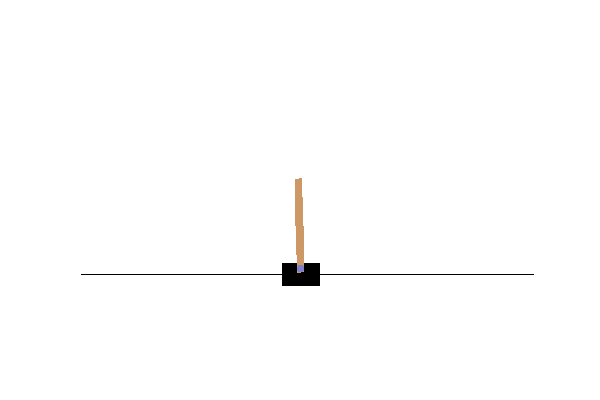
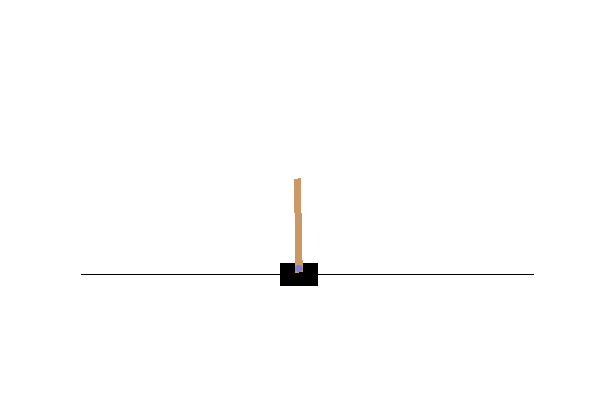
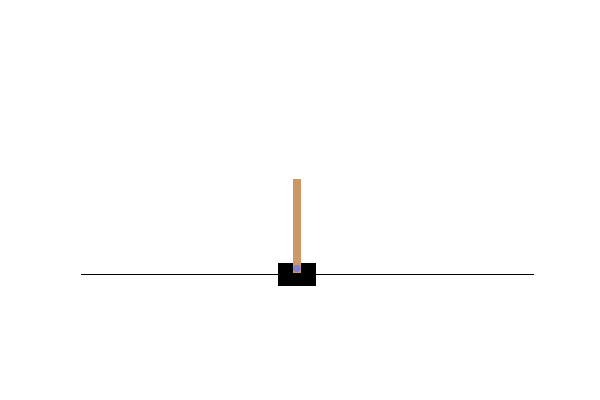
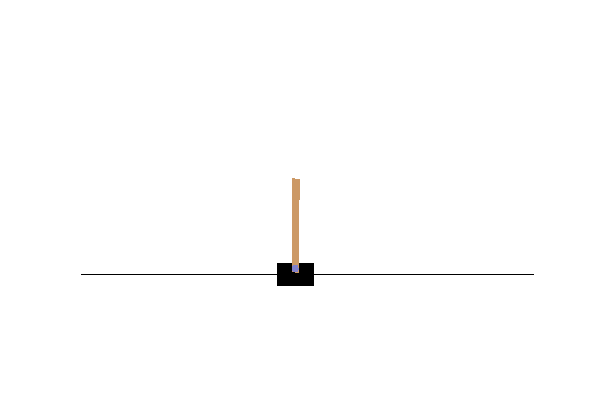
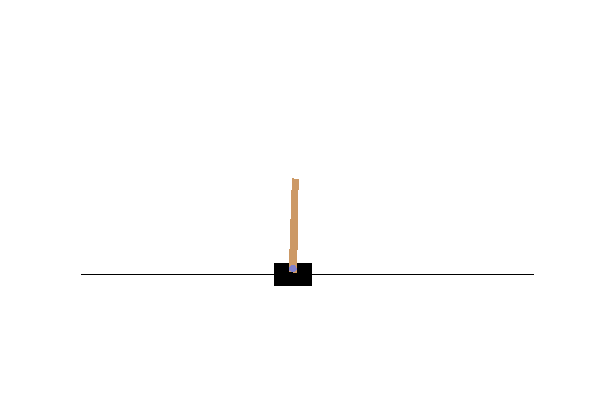
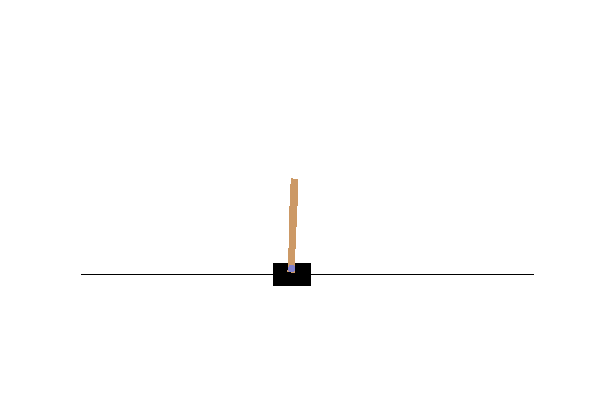
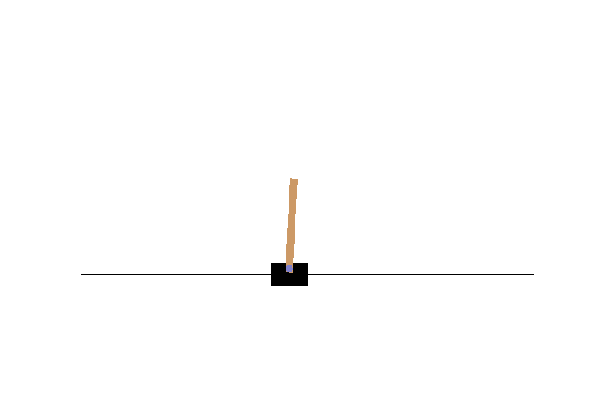
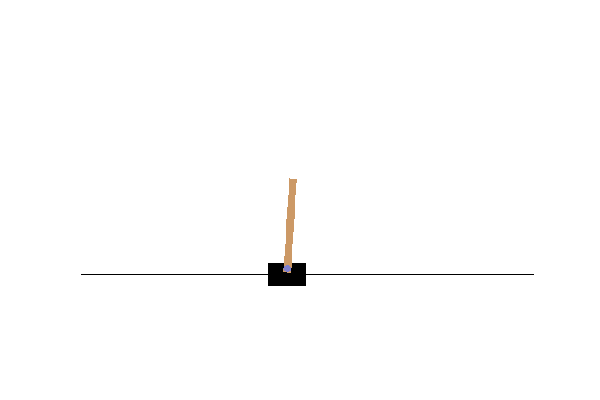
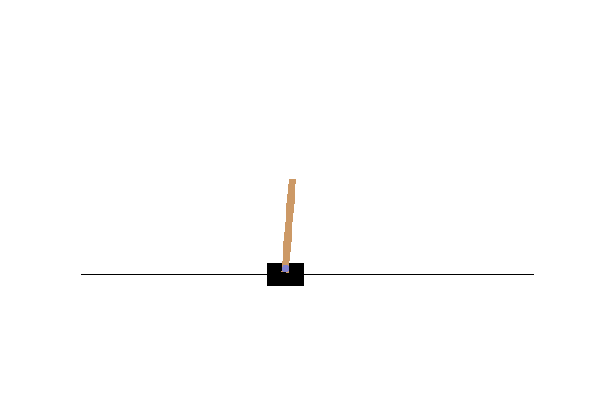
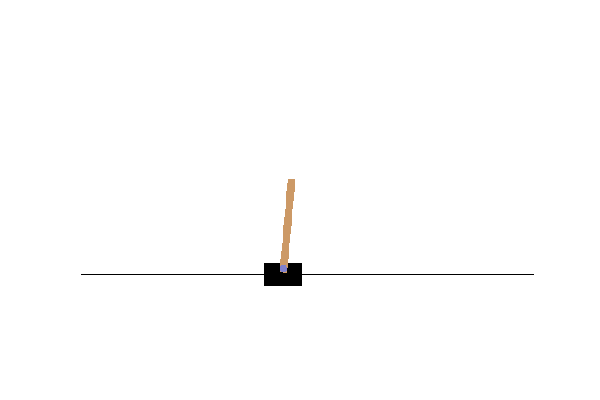
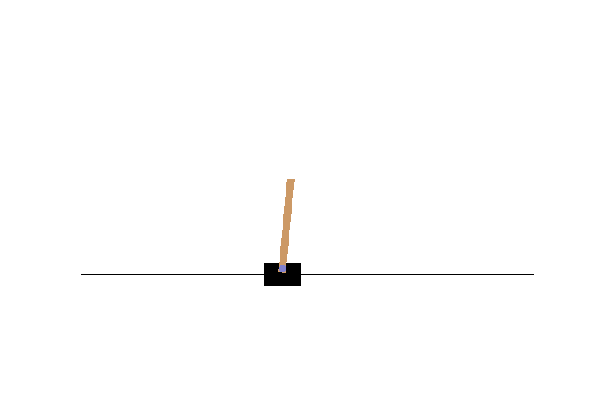
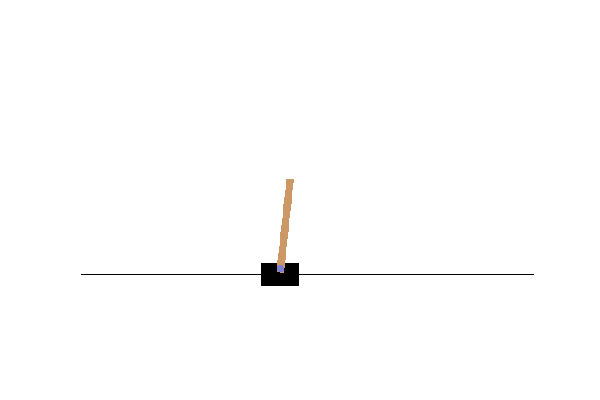
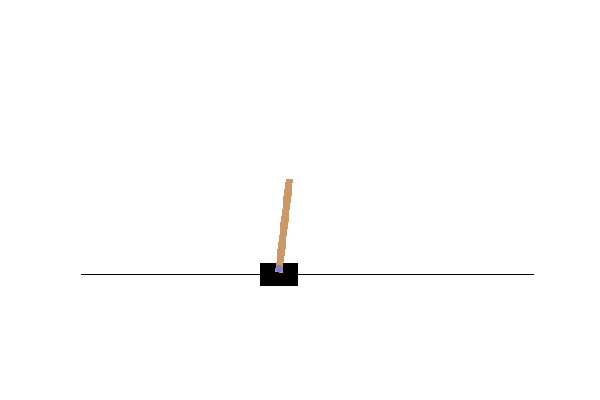
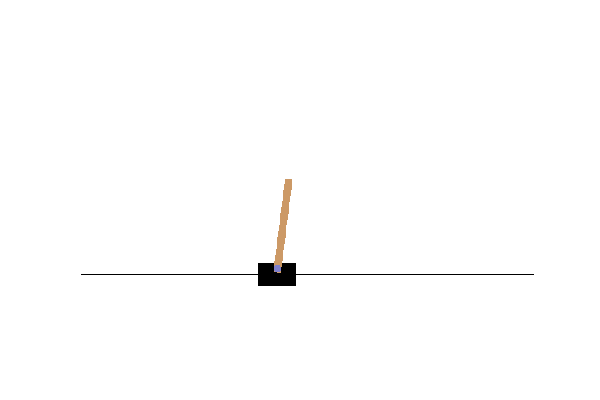
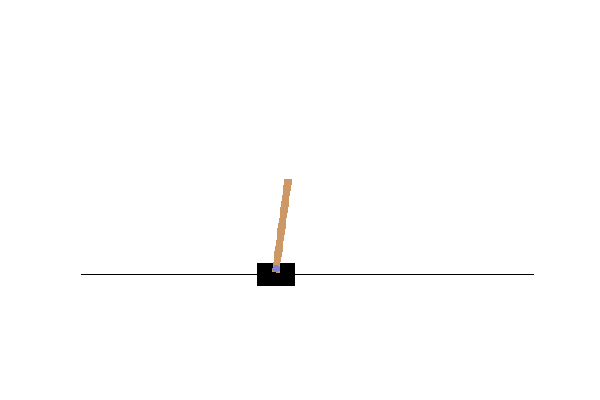
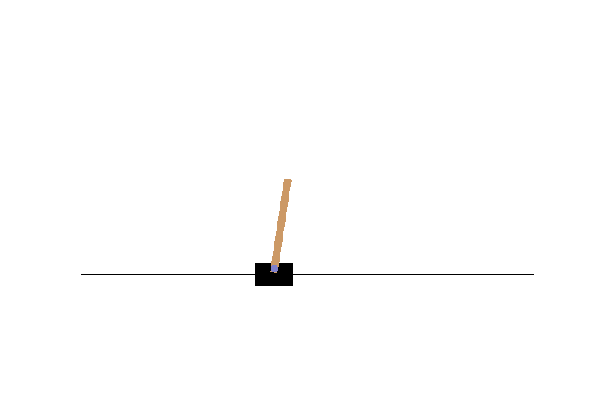
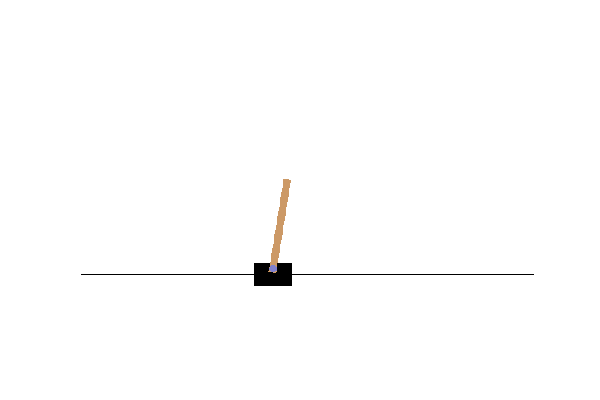
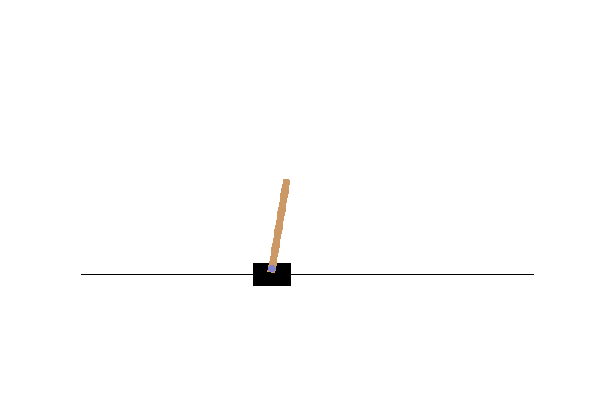
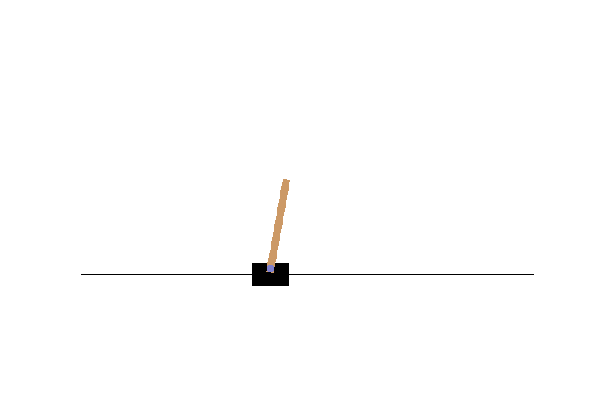
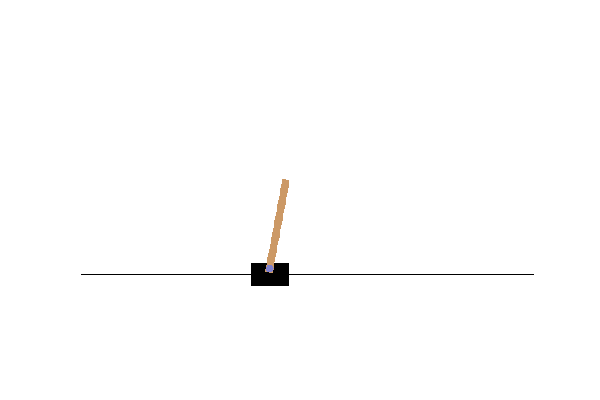
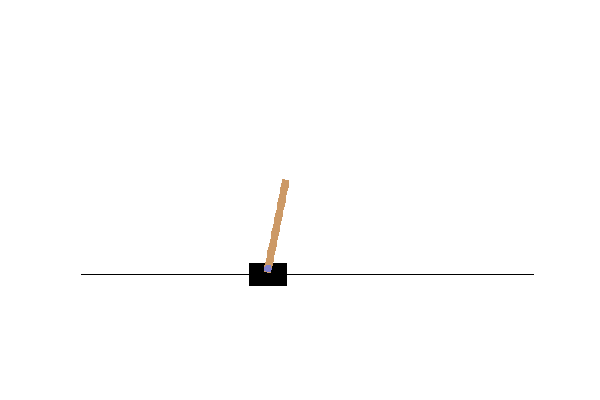
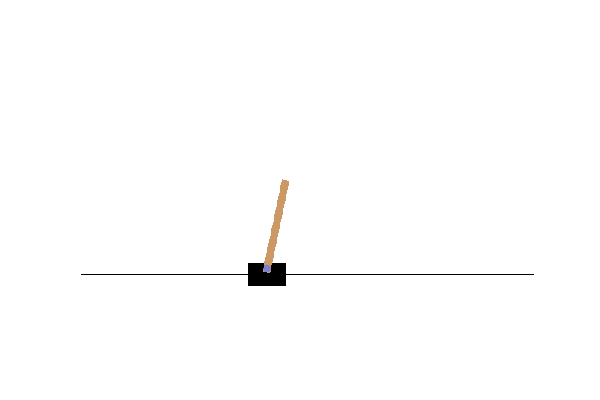
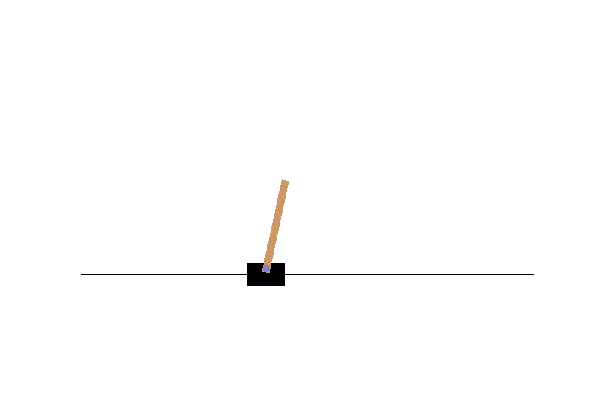
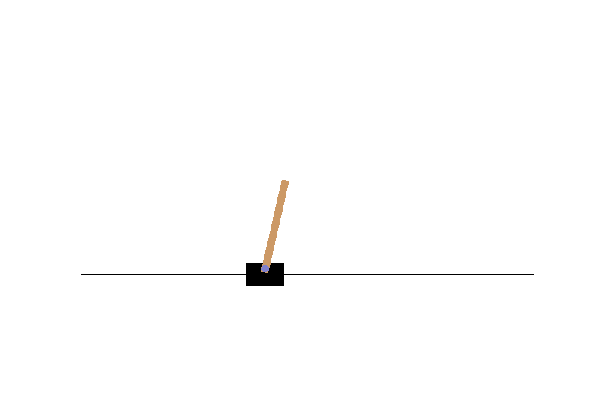
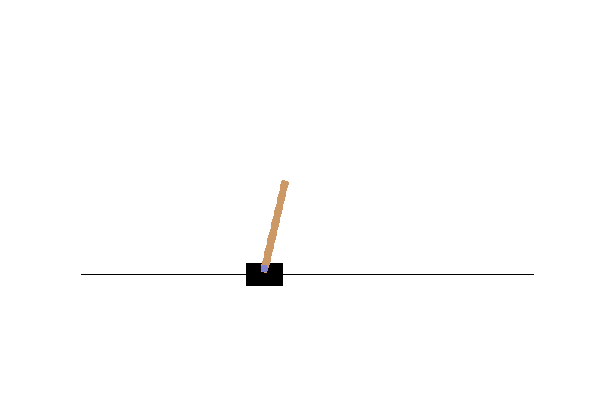
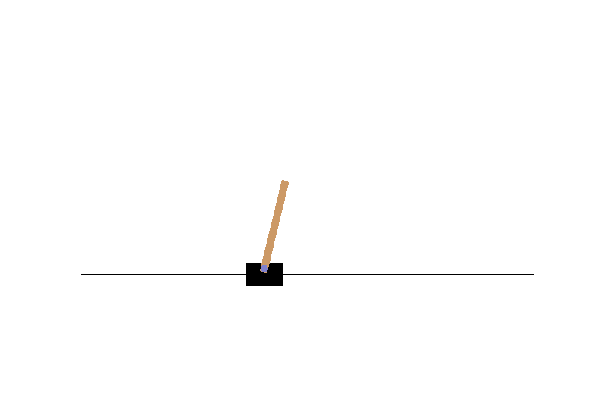
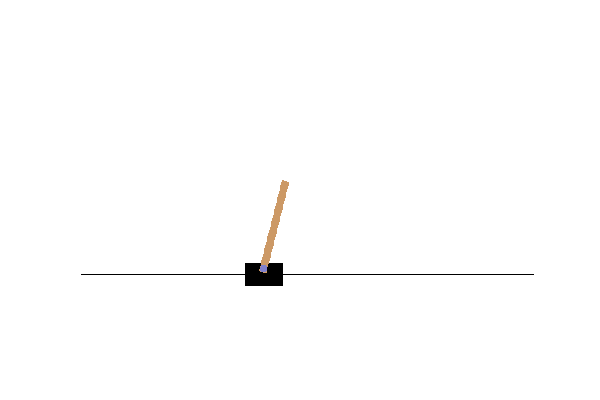
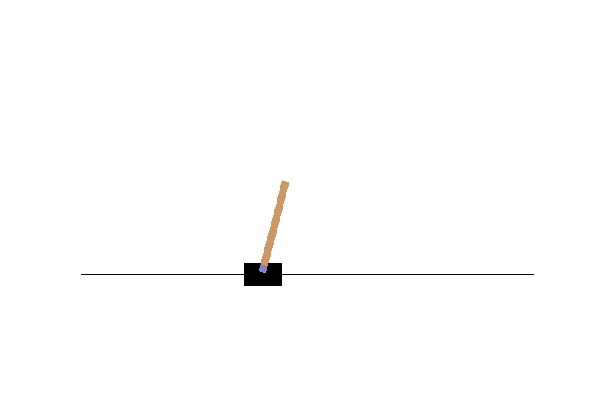
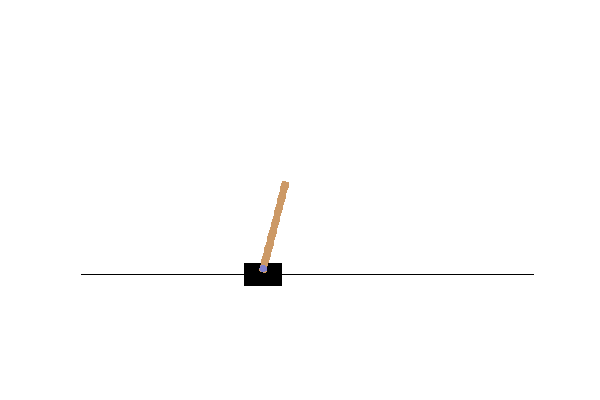
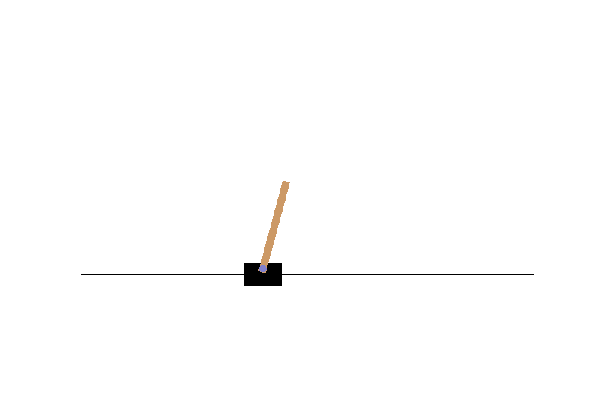
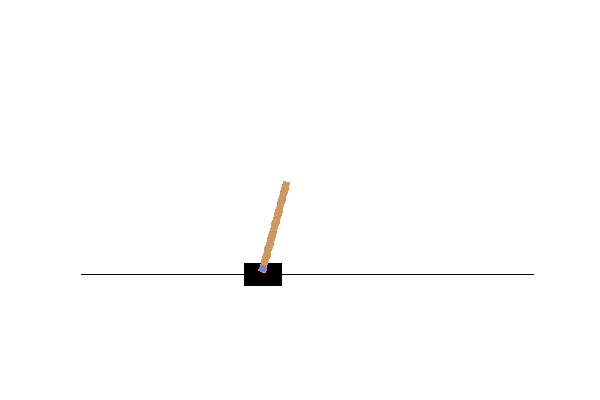
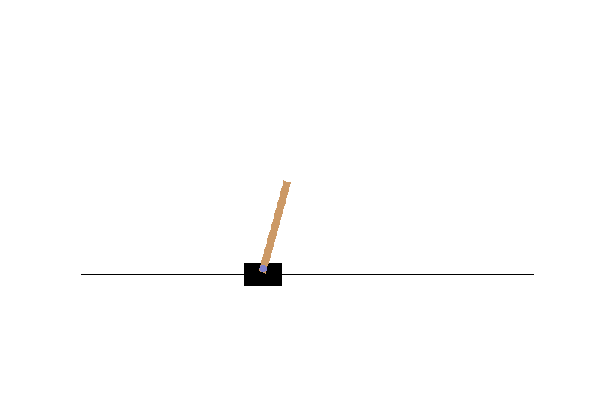
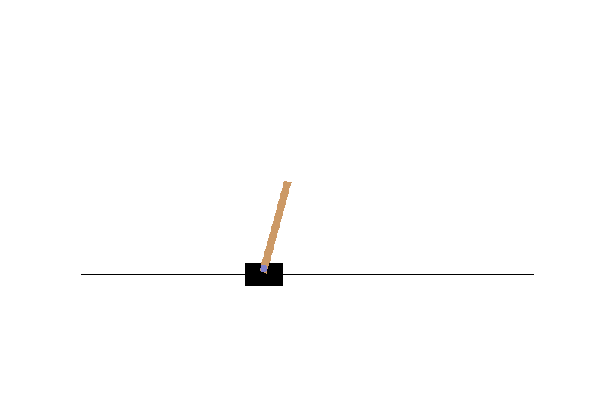
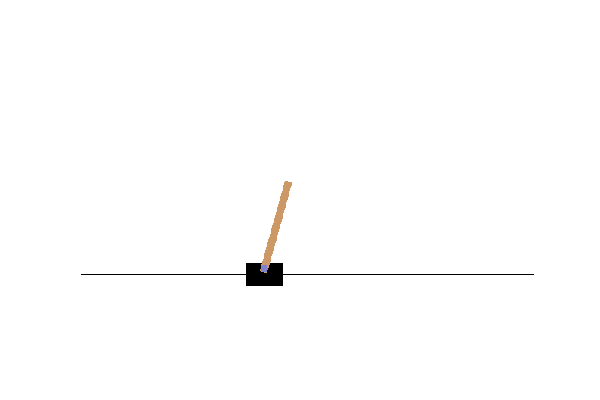
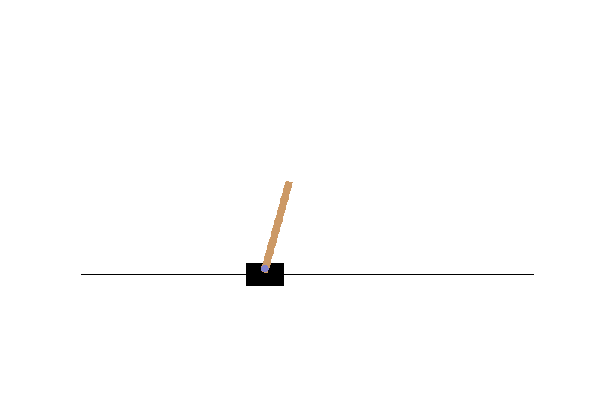
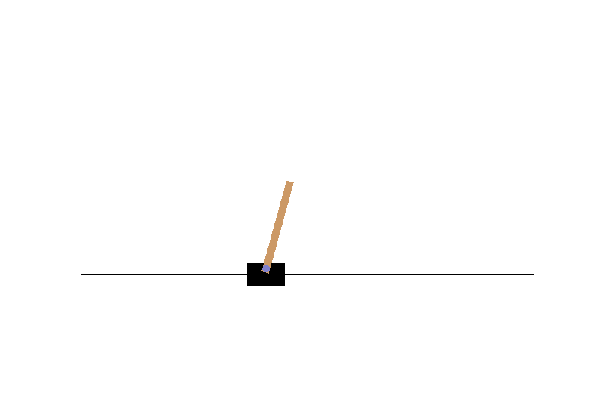
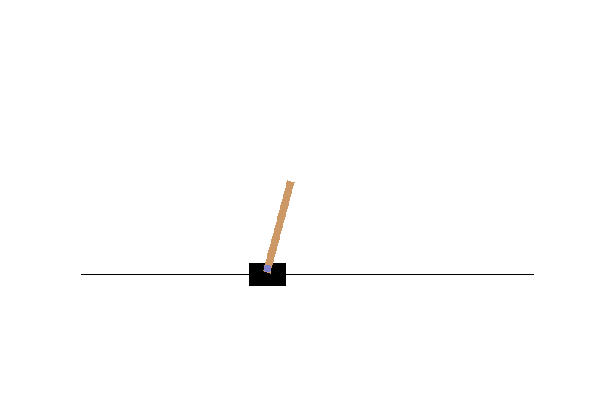
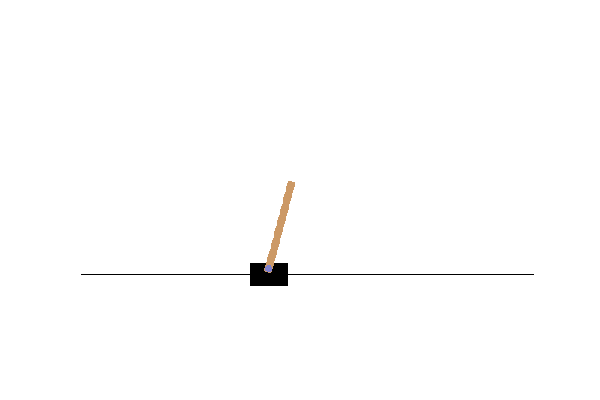
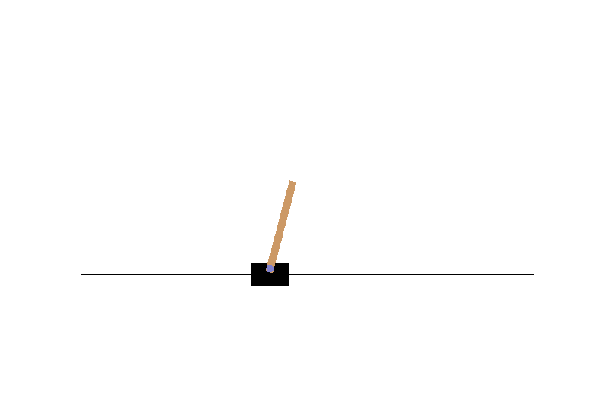
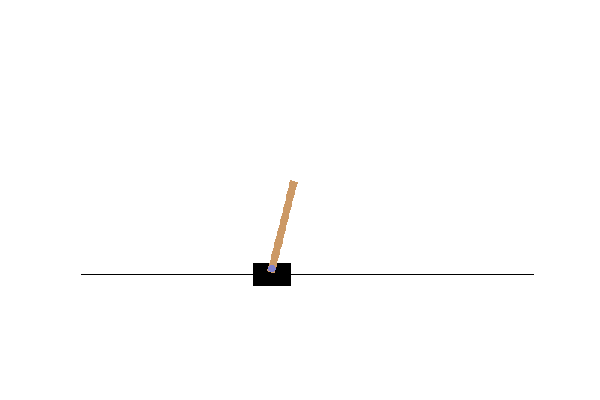

In [21]:
frames = []
obs = env.reset()
rewards = 0
for t in range(200):
  obs,rew,_,_ = env.step(policy(params,obs))
  rewards+=rew
  frames.append(env.render(mode='rgb_array'))
print(params,"Rewards = ",rewards)
  
display_frames_as_gif(frames)